In [1]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [124]:
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

import numpy as np

from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
import csv
import scipy.stats as stats
from tensorboard.plugins.hparams import api as hp
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (20,10)

import seaborn as sns
from Data import Data
from datetime import datetime
import feature_finder_keiko as ff
plt.rcParams["figure.figsize"] = (20,10)

In [111]:
step = 1
train_start = np.arange(1948,1977,step)
validation_end = np.arange(1982,2011,step)
test_start = np.arange(1983,2012,step)
test_end = np.arange(1987,2016,step)

n_components_sst = np.load("sst_number.npy")

In [112]:
tau = 12
f = 12
level = 99
extremes_treshold = -1

tau = 12

In [113]:
ijz = -2
temporal_limits = {"time_min":datetime(train_start[ijz], 1, 1, 0, 0),"time_max":datetime(validation_end[ijz], 12, 1, 0, 0)}
original_count, count = ff.drought_timeseries("ET_gamma_18912015_12.npy",train_start[ijz],validation_end[ijz],extremes_treshold = extremes_treshold)

In [114]:
data_sst = np.load("data_sst.npy")
V = np.load("V.npy")
ts = np.load("ts.npy")
avg = np.load("avg.npy")
std = np.load("std.npy")
data_sst_test = np.load("data_sst_test.npy")
df_sst = pd.read_csv("df_sst.csv")

In [115]:
link  = np.load("../../whole_data_results/ET_orac/best_link_{}/pcmci_{}_{}_{}_{}_{}.npy".format(abs(extremes_treshold),f,train_start[ijz],validation_end[ijz],tau,n_components_sst[ijz]))

In [116]:
temporal_limits_test = {"time_min":datetime(test_start[ijz], 1, 1, 0, 0),"time_max":datetime(test_end[ijz], 12, 1, 0, 0)}
#data_sst_test = ff.data_generator_avg_std('../../../nc/sst.mnmean.nc', "sst",temporal_limits_test, avg, std, 12, -9.96921e+36)
original_count_test, count_test = ff.drought_timeseries("ET_gamma_18912015_12.npy",test_start[ijz],test_end[ijz],extremes_treshold = extremes_treshold)

del df_sst["Unnamed: 0"]

In [117]:
start_lag = tau
end_lag = tau+11

df = pd.DataFrame({"drought": original_count})
lags = np.arange(start_lag,end_lag + 1)
df = df.assign(**{
'{} (t-{})'.format(col, t): df[col].shift(t)
for t in lags
for col in df
})
for k in range(len(link)):
    df[str(k)] = ff.time_series_maker_V(data_sst, V[:,link[k,0]-1])
    df[str(k)] = df[str(k)].shift(abs(link[k,1]))
df = df.dropna()

x_train = df.iloc[:,1:]
y_train = df.iloc[:,0]

In [119]:
start_lag = tau
end_lag = tau + 11

df_test = pd.DataFrame({"drought":original_count_test})
lags = np.arange(start_lag,end_lag + 1)
df_test = df_test.assign(**{
'{} (t-{})'.format(col, t): df_test[col].shift(t)
for t in lags
for col in df_test
})
for k in range(len(link)):
    df_sst["pc"] = V[:,link[k,0]-1]
    df_test[str(k)] = ff.time_series_maker(link[k,0]-1, df_sst, data_sst_test)
    #df_test[str(k)] = ff.time_series_maker_V(data_sst_test, V[:,link[k,0]-1])
    df_test[str(k)] = df_test[str(k)].shift(abs(link[k,1]))
df_test = df_test.dropna()

x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

In [3]:


n_components_sst = 98

link_caus = np.load("./link_rotated_station/best_link_1976_2010_{}.npy".format(tau))
link_corr = np.load("./link_rotated_station/best_link_corr_1976_2010_{}.npy".format(tau))


train_start = 1976
validation_end = 2010

temporal_limits = {"time_min":datetime(train_start, 1, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}
original_count, count = ff.drought_timeseries("ET_gamma_18912015.npy",train_start,validation_end)
#data_sst, ts, V, df_sst, avg, std = ff.PCA_computer_rotated(file_name, "sst",temporal_limits, n_components_sst, -9.96921e+36)

data_sst = np.load("data_sst.npy")
V = np.load("V.npy")
ts = np.load("ts.npy")
avg = np.load("avg.npy")
std = np.load("std.npy")
data_sst_test = np.load("data_sst_test.npy")

df_sst = pd.read_csv("df_sst.csv")

test_start = 2011
test_end = 2015

temporal_limits_test = {"time_min":datetime(test_start, 1, 1, 0, 0),"time_max":datetime(test_end, 12, 1, 0, 0)}
#data_sst_test = ff.data_generator_avg_std('../../../nc/sst.mnmean.nc', "sst",temporal_limits_test, avg, std, 12, -9.96921e+36)
original_count_test, count_test = ff.drought_timeseries("../npy_files/ET_gamma_18912015.npy",test_start,test_end)

del df_sst["Unnamed: 0"]

In [4]:
#Hybrid

for i in range(len(link_corr)):
    if not np.array(link_corr == list(link_corr[i])).all(axis=1).all():
        link_caus = np.concatenate((link_caus, np.reshape(link_corr[i,:],(1,2))))
link_hybrid = link_caus
link_caus = np.load("./link_rotated_station/best_link_1976_2010_{}.npy".format(tau))

l, b, m = ff.forward_feature_V(count, data_sst, link_hybrid, V, tau)

link = l

start_lag = tau
end_lag = tau + 12

df_test = pd.DataFrame({"drought":original_count_test})
lags = np.arange(start_lag,end_lag + 1)
df_test = df_test.assign(**{
'{} (t-{})'.format(col, t): df_test[col].shift(t)
for t in lags
for col in df_test
})
for k in range(len(link)):
    df_sst["pc"] = V[:,link[k,0]-1]
    df_test[str(k)] = ff.time_series_maker(link[k,0]-1, df_sst, data_sst_test)
    df_test[str(k)] = df_test[str(k)].shift(abs(link[k,1]))
df_test = df_test.dropna()

x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

In [5]:
link = l

start_lag = tau
end_lag = tau+12

df = pd.DataFrame({"drought": original_count})
lags = np.arange(start_lag,end_lag + 1)
df = df.assign(**{
'{} (t-{})'.format(col, t): df[col].shift(t)
for t in lags
for col in df
})
for k in range(len(link)):
    df[str(k)] = ff.time_series_maker_V(data_sst, V[:,link[k,0]-1])
    df[str(k)] = df[str(k)].shift(abs(link[k,1]))
df = df.dropna()

x_train = df.iloc[:,1:]
y_train = df.iloc[:,0]

start_lag = tau
end_lag = tau + 12

df_test = pd.DataFrame({"drought":original_count_test})
lags = np.arange(start_lag,end_lag + 1)
df_test = df_test.assign(**{
'{} (t-{})'.format(col, t): df_test[col].shift(t)
for t in lags
for col in df_test
})
for k in range(len(link)):
    df_sst["pc"] = V[:,link[k,0]-1]
    df_test[str(k)] = ff.time_series_maker(link[k,0]-1, df_sst, data_sst_test)
    df_test[str(k)] = df_test[str(k)].shift(abs(link[k,1]))
df_test = df_test.dropna()

x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

In [ ]:
layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation=tf.nn.relu),
layers.Dropout(0.1),
layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation=tf.nn.relu),
layers.Dropout(0.1),

In [126]:
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

#model = tf.keras.Sequential([
#tf.keras.layers.InputLayer(input_shape = x_train.shape[1]),
#layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation=tf.nn.relu),
#layers.Dropout(0.1),
#layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation=tf.nn.relu),
#layers.Dropout(0.1),
#layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation=tf.nn.relu),
#layers.Dense(1)
#])

model = tf.keras.Sequential([
tf.keras.layers.InputLayer(input_shape = x_train.shape[1]),
layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation=tf.nn.relu),
layers.Dropout(0.1),
layers.Dense(8, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation=tf.nn.relu),
layers.Dense(1)
])



#model = keras.models.Sequential([
#    keras.layers.Dense(16, input_dim=1),
#    keras.layers.Dense(1),
#])

model.compile(
    loss='mean_squared_error', # keras.losses.mean_squared_error
    optimizer=keras.optimizers.RMSprop(lr=1e-06),
    metrics=['RootMeanSquaredError']
)

print("Training ... With default parameters, this takes less than 10 seconds.")
training_history = model.fit(
    x_train, # input
    y_train, # output
    verbose=True, # Suppress chatty output; use Tensorboard instead
    epochs=10000,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback],
)

print("Average test loss: ", np.average(training_history.history['loss']))


Training ... With default parameters, this takes less than 10 seconds.
Train on 397 samples, validate on 37 samples
Epoch 1/10000
397/397 [==============================] - 0s 1ms/sample - loss: 3988.3717 - RootMeanSquaredError: 63.1512 - val_loss: 1016.9553 - val_RootMeanSquaredError: 31.8850
Epoch 2/10000
397/397 [==============================] - 0s 61us/sample - loss: 4073.2434 - RootMeanSquaredError: 63.8196 - val_loss: 1017.0828 - val_RootMeanSquaredError: 31.8870
Epoch 3/10000
397/397 [==============================] - 0s 57us/sample - loss: 3874.3774 - RootMeanSquaredError: 62.2421 - val_loss: 1017.2379 - val_RootMeanSquaredError: 31.8895
Epoch 4/10000
397/397 [==============================] - 0s 63us/sample - loss: 3872.5153 - RootMeanSquaredError: 62.2271 - val_loss: 1017.3474 - val_RootMeanSquaredError: 31.8912
Epoch 5/10000
397/397 [==============================] - 0s 66us/sample - loss: 3887.6494 - RootMeanSquaredError: 62.3486 - val_loss: 1017.5770 - val_RootMeanSquared

Epoch 46/10000
397/397 [==============================] - 0s 63us/sample - loss: 3843.8717 - RootMeanSquaredError: 61.9965 - val_loss: 1028.6887 - val_RootMeanSquaredError: 32.0685
Epoch 47/10000
397/397 [==============================] - 0s 65us/sample - loss: 3731.1388 - RootMeanSquaredError: 61.0806 - val_loss: 1028.9118 - val_RootMeanSquaredError: 32.0720
Epoch 48/10000
397/397 [==============================] - 0s 72us/sample - loss: 3766.3250 - RootMeanSquaredError: 61.3679 - val_loss: 1029.2007 - val_RootMeanSquaredError: 32.0765
Epoch 49/10000
397/397 [==============================] - 0s 69us/sample - loss: 3845.2107 - RootMeanSquaredError: 62.0073 - val_loss: 1029.5066 - val_RootMeanSquaredError: 32.0812
Epoch 50/10000
397/397 [==============================] - 0s 75us/sample - loss: 3894.8595 - RootMeanSquaredError: 62.4064 - val_loss: 1029.8323 - val_RootMeanSquaredError: 32.0863
Epoch 51/10000
397/397 [==============================] - 0s 73us/sample - loss: 3845.8915 - Ro

397/397 [==============================] - 0s 59us/sample - loss: 4004.8600 - RootMeanSquaredError: 63.2816 - val_loss: 1040.1779 - val_RootMeanSquaredError: 32.2471
Epoch 92/10000
397/397 [==============================] - 0s 62us/sample - loss: 3976.0230 - RootMeanSquaredError: 63.0533 - val_loss: 1040.1706 - val_RootMeanSquaredError: 32.2470
Epoch 93/10000
397/397 [==============================] - 0s 64us/sample - loss: 4008.2318 - RootMeanSquaredError: 63.3082 - val_loss: 1040.4043 - val_RootMeanSquaredError: 32.2506
Epoch 94/10000
397/397 [==============================] - 0s 72us/sample - loss: 3962.9444 - RootMeanSquaredError: 62.9495 - val_loss: 1040.4615 - val_RootMeanSquaredError: 32.2515
Epoch 95/10000
397/397 [==============================] - 0s 58us/sample - loss: 3852.0450 - RootMeanSquaredError: 62.0624 - val_loss: 1040.7372 - val_RootMeanSquaredError: 32.2558
Epoch 96/10000
397/397 [==============================] - 0s 62us/sample - loss: 3848.4516 - RootMeanSquaredEr

397/397 [==============================] - 0s 58us/sample - loss: 3782.1212 - RootMeanSquaredError: 61.4965 - val_loss: 1048.3582 - val_RootMeanSquaredError: 32.3737
Epoch 137/10000
397/397 [==============================] - 0s 65us/sample - loss: 3959.5440 - RootMeanSquaredError: 62.9225 - val_loss: 1048.4896 - val_RootMeanSquaredError: 32.3757
Epoch 138/10000
397/397 [==============================] - 0s 60us/sample - loss: 3887.4243 - RootMeanSquaredError: 62.3468 - val_loss: 1048.7295 - val_RootMeanSquaredError: 32.3795
Epoch 139/10000
397/397 [==============================] - 0s 62us/sample - loss: 3801.3370 - RootMeanSquaredError: 61.6525 - val_loss: 1048.9075 - val_RootMeanSquaredError: 32.3822
Epoch 140/10000
397/397 [==============================] - 0s 60us/sample - loss: 3727.9384 - RootMeanSquaredError: 61.0544 - val_loss: 1049.4475 - val_RootMeanSquaredError: 32.3905
Epoch 141/10000
397/397 [==============================] - 0s 60us/sample - loss: 3930.0203 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 3738.5887 - RootMeanSquaredError: 61.1415 - val_loss: 1055.9696 - val_RootMeanSquaredError: 32.4911
Epoch 182/10000
397/397 [==============================] - 0s 62us/sample - loss: 3863.6603 - RootMeanSquaredError: 62.1559 - val_loss: 1056.1933 - val_RootMeanSquaredError: 32.4945
Epoch 183/10000
397/397 [==============================] - 0s 64us/sample - loss: 3869.4081 - RootMeanSquaredError: 62.2021 - val_loss: 1056.4470 - val_RootMeanSquaredError: 32.4984
Epoch 184/10000
397/397 [==============================] - 0s 62us/sample - loss: 3905.4341 - RootMeanSquaredError: 62.4911 - val_loss: 1056.7496 - val_RootMeanSquaredError: 32.5031
Epoch 185/10000
397/397 [==============================] - 0s 64us/sample - loss: 3774.3879 - RootMeanSquaredError: 61.4336 - val_loss: 1056.7685 - val_RootMeanSquaredError: 32.5034
Epoch 186/10000
397/397 [==============================] - 0s 59us/sample - loss: 3790.4887 - RootMeanSqua

397/397 [==============================] - 0s 61us/sample - loss: 3890.8712 - RootMeanSquaredError: 62.3744 - val_loss: 1063.6352 - val_RootMeanSquaredError: 32.6088
Epoch 227/10000
397/397 [==============================] - 0s 73us/sample - loss: 3773.9241 - RootMeanSquaredError: 61.4298 - val_loss: 1063.7489 - val_RootMeanSquaredError: 32.6106
Epoch 228/10000
397/397 [==============================] - 0s 60us/sample - loss: 3734.7980 - RootMeanSquaredError: 61.1105 - val_loss: 1063.8000 - val_RootMeanSquaredError: 32.6113
Epoch 229/10000
397/397 [==============================] - 0s 63us/sample - loss: 3820.8558 - RootMeanSquaredError: 61.8106 - val_loss: 1063.9596 - val_RootMeanSquaredError: 32.6138
Epoch 230/10000
397/397 [==============================] - 0s 64us/sample - loss: 3902.1429 - RootMeanSquaredError: 62.4647 - val_loss: 1064.1530 - val_RootMeanSquaredError: 32.6167
Epoch 231/10000
397/397 [==============================] - 0s 63us/sample - loss: 3744.0650 - RootMeanSqua

397/397 [==============================] - 0s 60us/sample - loss: 3742.0962 - RootMeanSquaredError: 61.1702 - val_loss: 1069.7716 - val_RootMeanSquaredError: 32.7028
Epoch 272/10000
397/397 [==============================] - 0s 59us/sample - loss: 3801.3416 - RootMeanSquaredError: 61.6526 - val_loss: 1069.9194 - val_RootMeanSquaredError: 32.7050
Epoch 273/10000
397/397 [==============================] - 0s 62us/sample - loss: 3768.9876 - RootMeanSquaredError: 61.3896 - val_loss: 1069.9450 - val_RootMeanSquaredError: 32.7054
Epoch 274/10000
397/397 [==============================] - 0s 64us/sample - loss: 3753.7346 - RootMeanSquaredError: 61.2653 - val_loss: 1070.0757 - val_RootMeanSquaredError: 32.7074
Epoch 275/10000
397/397 [==============================] - 0s 62us/sample - loss: 3636.6248 - RootMeanSquaredError: 60.3019 - val_loss: 1070.2714 - val_RootMeanSquaredError: 32.7104
Epoch 276/10000
397/397 [==============================] - 0s 61us/sample - loss: 3816.1053 - RootMeanSqua

397/397 [==============================] - 0s 61us/sample - loss: 3749.9217 - RootMeanSquaredError: 61.2342 - val_loss: 1074.8262 - val_RootMeanSquaredError: 32.7800
Epoch 317/10000
397/397 [==============================] - 0s 64us/sample - loss: 3754.1667 - RootMeanSquaredError: 61.2688 - val_loss: 1074.9335 - val_RootMeanSquaredError: 32.7816
Epoch 318/10000
397/397 [==============================] - 0s 62us/sample - loss: 3789.3881 - RootMeanSquaredError: 61.5556 - val_loss: 1075.0028 - val_RootMeanSquaredError: 32.7826
Epoch 319/10000
397/397 [==============================] - 0s 60us/sample - loss: 3954.4525 - RootMeanSquaredError: 62.8820 - val_loss: 1074.8763 - val_RootMeanSquaredError: 32.7807
Epoch 320/10000
397/397 [==============================] - 0s 63us/sample - loss: 3651.8944 - RootMeanSquaredError: 60.4284 - val_loss: 1074.7893 - val_RootMeanSquaredError: 32.7794
Epoch 321/10000
397/397 [==============================] - 0s 61us/sample - loss: 3882.2813 - RootMeanSqua

Epoch 361/10000
397/397 [==============================] - 0s 77us/sample - loss: 3763.0826 - RootMeanSquaredError: 61.3415 - val_loss: 1078.5841 - val_RootMeanSquaredError: 32.8372
Epoch 362/10000
397/397 [==============================] - 0s 59us/sample - loss: 3875.5728 - RootMeanSquaredError: 62.2517 - val_loss: 1078.4229 - val_RootMeanSquaredError: 32.8348
Epoch 363/10000
397/397 [==============================] - 0s 60us/sample - loss: 3858.0116 - RootMeanSquaredError: 62.1105 - val_loss: 1078.5350 - val_RootMeanSquaredError: 32.8365
Epoch 364/10000
397/397 [==============================] - 0s 61us/sample - loss: 3693.9991 - RootMeanSquaredError: 60.7758 - val_loss: 1078.6443 - val_RootMeanSquaredError: 32.8381
Epoch 365/10000
397/397 [==============================] - 0s 66us/sample - loss: 3872.5699 - RootMeanSquaredError: 62.2276 - val_loss: 1078.8457 - val_RootMeanSquaredError: 32.8412
Epoch 366/10000
397/397 [==============================] - 0s 63us/sample - loss: 3898.044

397/397 [==============================] - 0s 60us/sample - loss: 3668.8890 - RootMeanSquaredError: 60.5689 - val_loss: 1080.4530 - val_RootMeanSquaredError: 32.8657
Epoch 407/10000
397/397 [==============================] - 0s 61us/sample - loss: 3769.3154 - RootMeanSquaredError: 61.3923 - val_loss: 1080.5459 - val_RootMeanSquaredError: 32.8671
Epoch 408/10000
397/397 [==============================] - 0s 60us/sample - loss: 3725.2199 - RootMeanSquaredError: 61.0321 - val_loss: 1080.5904 - val_RootMeanSquaredError: 32.8678
Epoch 409/10000
397/397 [==============================] - 0s 59us/sample - loss: 3812.9566 - RootMeanSquaredError: 61.7467 - val_loss: 1080.4956 - val_RootMeanSquaredError: 32.8663
Epoch 410/10000
397/397 [==============================] - 0s 61us/sample - loss: 3676.3924 - RootMeanSquaredError: 60.6308 - val_loss: 1080.5265 - val_RootMeanSquaredError: 32.8668
Epoch 411/10000
397/397 [==============================] - 0s 61us/sample - loss: 3693.2004 - RootMeanSqua

397/397 [==============================] - 0s 78us/sample - loss: 3618.2555 - RootMeanSquaredError: 60.1494 - val_loss: 1081.8675 - val_RootMeanSquaredError: 32.8872
Epoch 452/10000
397/397 [==============================] - 0s 75us/sample - loss: 3689.1368 - RootMeanSquaredError: 60.7358 - val_loss: 1081.8883 - val_RootMeanSquaredError: 32.8875
Epoch 453/10000
397/397 [==============================] - 0s 59us/sample - loss: 3757.6964 - RootMeanSquaredError: 61.2976 - val_loss: 1081.7672 - val_RootMeanSquaredError: 32.8857
Epoch 454/10000
397/397 [==============================] - 0s 62us/sample - loss: 3695.5240 - RootMeanSquaredError: 60.7883 - val_loss: 1081.7428 - val_RootMeanSquaredError: 32.8853
Epoch 455/10000
397/397 [==============================] - 0s 60us/sample - loss: 3685.1992 - RootMeanSquaredError: 60.7034 - val_loss: 1081.7626 - val_RootMeanSquaredError: 32.8856
Epoch 456/10000
397/397 [==============================] - 0s 64us/sample - loss: 3627.3108 - RootMeanSqua

397/397 [==============================] - 0s 72us/sample - loss: 3866.3842 - RootMeanSquaredError: 62.1778 - val_loss: 1081.5377 - val_RootMeanSquaredError: 32.8822
Epoch 497/10000
397/397 [==============================] - 0s 62us/sample - loss: 3682.8332 - RootMeanSquaredError: 60.6839 - val_loss: 1081.6147 - val_RootMeanSquaredError: 32.8833
Epoch 498/10000
397/397 [==============================] - 0s 63us/sample - loss: 3726.0345 - RootMeanSquaredError: 61.0388 - val_loss: 1081.4243 - val_RootMeanSquaredError: 32.8804
Epoch 499/10000
397/397 [==============================] - 0s 63us/sample - loss: 3830.1402 - RootMeanSquaredError: 61.8857 - val_loss: 1081.3905 - val_RootMeanSquaredError: 32.8799
Epoch 500/10000
397/397 [==============================] - 0s 59us/sample - loss: 3746.2179 - RootMeanSquaredError: 61.2039 - val_loss: 1081.4969 - val_RootMeanSquaredError: 32.8815
Epoch 501/10000
397/397 [==============================] - 0s 71us/sample - loss: 3651.6858 - RootMeanSqua

397/397 [==============================] - 0s 59us/sample - loss: 3794.7043 - RootMeanSquaredError: 61.5987 - val_loss: 1081.6254 - val_RootMeanSquaredError: 32.8835
Epoch 542/10000
397/397 [==============================] - 0s 67us/sample - loss: 3717.5485 - RootMeanSquaredError: 60.9692 - val_loss: 1081.6440 - val_RootMeanSquaredError: 32.8838
Epoch 543/10000
397/397 [==============================] - 0s 65us/sample - loss: 3624.4916 - RootMeanSquaredError: 60.2012 - val_loss: 1081.6288 - val_RootMeanSquaredError: 32.8836
Epoch 544/10000
397/397 [==============================] - 0s 72us/sample - loss: 3784.7932 - RootMeanSquaredError: 61.5182 - val_loss: 1081.5465 - val_RootMeanSquaredError: 32.8823
Epoch 545/10000
397/397 [==============================] - 0s 61us/sample - loss: 3815.2094 - RootMeanSquaredError: 61.7649 - val_loss: 1081.5946 - val_RootMeanSquaredError: 32.8830
Epoch 546/10000
397/397 [==============================] - 0s 62us/sample - loss: 3730.5123 - RootMeanSqua

Epoch 586/10000
397/397 [==============================] - 0s 63us/sample - loss: 3683.0981 - RootMeanSquaredError: 60.6861 - val_loss: 1081.2597 - val_RootMeanSquaredError: 32.8779
Epoch 587/10000
397/397 [==============================] - 0s 60us/sample - loss: 3718.5234 - RootMeanSquaredError: 60.9772 - val_loss: 1081.1283 - val_RootMeanSquaredError: 32.8759
Epoch 588/10000
397/397 [==============================] - 0s 61us/sample - loss: 3722.4304 - RootMeanSquaredError: 61.0093 - val_loss: 1080.9399 - val_RootMeanSquaredError: 32.8731
Epoch 589/10000
397/397 [==============================] - 0s 60us/sample - loss: 3485.9050 - RootMeanSquaredError: 59.0390 - val_loss: 1081.2562 - val_RootMeanSquaredError: 32.8779
Epoch 590/10000
397/397 [==============================] - 0s 59us/sample - loss: 3594.2587 - RootMeanSquaredError: 59.9496 - val_loss: 1081.2167 - val_RootMeanSquaredError: 32.8773
Epoch 591/10000
397/397 [==============================] - 0s 64us/sample - loss: 3749.831

397/397 [==============================] - 0s 58us/sample - loss: 3547.1919 - RootMeanSquaredError: 59.5558 - val_loss: 1080.2081 - val_RootMeanSquaredError: 32.8619
Epoch 632/10000
397/397 [==============================] - 0s 61us/sample - loss: 3594.9329 - RootMeanSquaredError: 59.9553 - val_loss: 1080.2751 - val_RootMeanSquaredError: 32.8630
Epoch 633/10000
397/397 [==============================] - 0s 65us/sample - loss: 3629.1848 - RootMeanSquaredError: 60.2402 - val_loss: 1080.3334 - val_RootMeanSquaredError: 32.8639
Epoch 634/10000
397/397 [==============================] - 0s 62us/sample - loss: 3756.0126 - RootMeanSquaredError: 61.2839 - val_loss: 1080.0434 - val_RootMeanSquaredError: 32.8594
Epoch 635/10000
397/397 [==============================] - 0s 62us/sample - loss: 3746.8428 - RootMeanSquaredError: 61.2090 - val_loss: 1079.9842 - val_RootMeanSquaredError: 32.8585
Epoch 636/10000
397/397 [==============================] - 0s 64us/sample - loss: 3740.9246 - RootMeanSqua

397/397 [==============================] - 0s 61us/sample - loss: 3788.2978 - RootMeanSquaredError: 61.5467 - val_loss: 1078.0311 - val_RootMeanSquaredError: 32.8288
Epoch 677/10000
397/397 [==============================] - 0s 59us/sample - loss: 3506.7707 - RootMeanSquaredError: 59.2155 - val_loss: 1078.2596 - val_RootMeanSquaredError: 32.8323
Epoch 678/10000
397/397 [==============================] - 0s 63us/sample - loss: 3660.3758 - RootMeanSquaredError: 60.4986 - val_loss: 1078.4054 - val_RootMeanSquaredError: 32.8345
Epoch 679/10000
397/397 [==============================] - 0s 59us/sample - loss: 3490.6137 - RootMeanSquaredError: 59.0789 - val_loss: 1078.5751 - val_RootMeanSquaredError: 32.8371
Epoch 680/10000
397/397 [==============================] - 0s 62us/sample - loss: 3659.9481 - RootMeanSquaredError: 60.4950 - val_loss: 1078.6069 - val_RootMeanSquaredError: 32.8376
Epoch 681/10000
397/397 [==============================] - 0s 63us/sample - loss: 3535.2736 - RootMeanSqua

Epoch 721/10000
397/397 [==============================] - 0s 62us/sample - loss: 3621.5921 - RootMeanSquaredError: 60.1772 - val_loss: 1078.0917 - val_RootMeanSquaredError: 32.8297
Epoch 722/10000
397/397 [==============================] - 0s 61us/sample - loss: 3682.8528 - RootMeanSquaredError: 60.6840 - val_loss: 1078.1416 - val_RootMeanSquaredError: 32.8305
Epoch 723/10000
397/397 [==============================] - 0s 64us/sample - loss: 3623.5785 - RootMeanSquaredError: 60.1937 - val_loss: 1077.8764 - val_RootMeanSquaredError: 32.8265
Epoch 724/10000
397/397 [==============================] - 0s 62us/sample - loss: 3699.0612 - RootMeanSquaredError: 60.8174 - val_loss: 1077.6559 - val_RootMeanSquaredError: 32.8231
Epoch 725/10000
397/397 [==============================] - 0s 59us/sample - loss: 3649.1536 - RootMeanSquaredError: 60.4057 - val_loss: 1077.7210 - val_RootMeanSquaredError: 32.8241
Epoch 726/10000
397/397 [==============================] - 0s 61us/sample - loss: 3670.793

Epoch 766/10000
397/397 [==============================] - 0s 62us/sample - loss: 3694.8177 - RootMeanSquaredError: 60.7825 - val_loss: 1075.6695 - val_RootMeanSquaredError: 32.7928
Epoch 767/10000
397/397 [==============================] - 0s 66us/sample - loss: 3768.3895 - RootMeanSquaredError: 61.3848 - val_loss: 1075.3840 - val_RootMeanSquaredError: 32.7885
Epoch 768/10000
397/397 [==============================] - 0s 65us/sample - loss: 3722.4136 - RootMeanSquaredError: 61.0091 - val_loss: 1075.3938 - val_RootMeanSquaredError: 32.7886
Epoch 769/10000
397/397 [==============================] - 0s 63us/sample - loss: 3760.0301 - RootMeanSquaredError: 61.3166 - val_loss: 1075.2110 - val_RootMeanSquaredError: 32.7858
Epoch 770/10000
397/397 [==============================] - 0s 61us/sample - loss: 3570.6132 - RootMeanSquaredError: 59.7521 - val_loss: 1075.1376 - val_RootMeanSquaredError: 32.7847
Epoch 771/10000
397/397 [==============================] - 0s 61us/sample - loss: 3717.177

397/397 [==============================] - 0s 61us/sample - loss: 3684.3335 - RootMeanSquaredError: 60.6962 - val_loss: 1072.6294 - val_RootMeanSquaredError: 32.7464
Epoch 812/10000
397/397 [==============================] - 0s 59us/sample - loss: 3678.6827 - RootMeanSquaredError: 60.6497 - val_loss: 1072.3211 - val_RootMeanSquaredError: 32.7417
Epoch 813/10000
397/397 [==============================] - 0s 62us/sample - loss: 3617.7595 - RootMeanSquaredError: 60.1453 - val_loss: 1072.4294 - val_RootMeanSquaredError: 32.7434
Epoch 814/10000
397/397 [==============================] - 0s 59us/sample - loss: 3549.2459 - RootMeanSquaredError: 59.5730 - val_loss: 1072.3476 - val_RootMeanSquaredError: 32.7421
Epoch 815/10000
397/397 [==============================] - 0s 61us/sample - loss: 3393.6439 - RootMeanSquaredError: 58.2524 - val_loss: 1072.5835 - val_RootMeanSquaredError: 32.7457
Epoch 816/10000
397/397 [==============================] - 0s 61us/sample - loss: 3491.8477 - RootMeanSqua

Epoch 856/10000
397/397 [==============================] - 0s 71us/sample - loss: 3614.8808 - RootMeanSquaredError: 60.1214 - val_loss: 1069.5594 - val_RootMeanSquaredError: 32.6995
Epoch 857/10000
397/397 [==============================] - 0s 60us/sample - loss: 3612.5868 - RootMeanSquaredError: 60.1023 - val_loss: 1069.4713 - val_RootMeanSquaredError: 32.6982
Epoch 858/10000
397/397 [==============================] - 0s 62us/sample - loss: 3631.6699 - RootMeanSquaredError: 60.2608 - val_loss: 1069.2726 - val_RootMeanSquaredError: 32.6951
Epoch 859/10000
397/397 [==============================] - 0s 63us/sample - loss: 3613.4158 - RootMeanSquaredError: 60.1092 - val_loss: 1069.1327 - val_RootMeanSquaredError: 32.6930
Epoch 860/10000
397/397 [==============================] - 0s 61us/sample - loss: 3543.7762 - RootMeanSquaredError: 59.5271 - val_loss: 1069.1126 - val_RootMeanSquaredError: 32.6927
Epoch 861/10000
397/397 [==============================] - 0s 67us/sample - loss: 3694.515

397/397 [==============================] - 0s 61us/sample - loss: 3590.3999 - RootMeanSquaredError: 59.9174 - val_loss: 1066.6863 - val_RootMeanSquaredError: 32.6556
Epoch 902/10000
397/397 [==============================] - 0s 64us/sample - loss: 3513.9319 - RootMeanSquaredError: 59.2759 - val_loss: 1066.7571 - val_RootMeanSquaredError: 32.6566
Epoch 903/10000
397/397 [==============================] - 0s 62us/sample - loss: 3604.7567 - RootMeanSquaredError: 60.0371 - val_loss: 1066.7560 - val_RootMeanSquaredError: 32.6566
Epoch 904/10000
397/397 [==============================] - 0s 64us/sample - loss: 3672.5372 - RootMeanSquaredError: 60.5990 - val_loss: 1066.5538 - val_RootMeanSquaredError: 32.6535
Epoch 905/10000
397/397 [==============================] - 0s 60us/sample - loss: 3681.5881 - RootMeanSquaredError: 60.6736 - val_loss: 1066.4055 - val_RootMeanSquaredError: 32.6513
Epoch 906/10000
397/397 [==============================] - 0s 59us/sample - loss: 3499.3008 - RootMeanSqua

397/397 [==============================] - 0s 60us/sample - loss: 3648.0285 - RootMeanSquaredError: 60.3964 - val_loss: 1063.6650 - val_RootMeanSquaredError: 32.6093
Epoch 947/10000
397/397 [==============================] - 0s 64us/sample - loss: 3619.8066 - RootMeanSquaredError: 60.1623 - val_loss: 1063.4998 - val_RootMeanSquaredError: 32.6067
Epoch 948/10000
397/397 [==============================] - 0s 60us/sample - loss: 3606.9331 - RootMeanSquaredError: 60.0552 - val_loss: 1063.4122 - val_RootMeanSquaredError: 32.6054
Epoch 949/10000
397/397 [==============================] - 0s 61us/sample - loss: 3566.3490 - RootMeanSquaredError: 59.7164 - val_loss: 1063.3091 - val_RootMeanSquaredError: 32.6038
Epoch 950/10000
397/397 [==============================] - 0s 63us/sample - loss: 3571.1264 - RootMeanSquaredError: 59.7564 - val_loss: 1063.0358 - val_RootMeanSquaredError: 32.5996
Epoch 951/10000
397/397 [==============================] - 0s 69us/sample - loss: 3461.7525 - RootMeanSqua

Epoch 991/10000
397/397 [==============================] - 0s 62us/sample - loss: 3482.9733 - RootMeanSquaredError: 59.0142 - val_loss: 1060.2175 - val_RootMeanSquaredError: 32.5564
Epoch 992/10000
397/397 [==============================] - 0s 65us/sample - loss: 3638.9322 - RootMeanSquaredError: 60.3211 - val_loss: 1060.0731 - val_RootMeanSquaredError: 32.5541
Epoch 993/10000
397/397 [==============================] - 0s 65us/sample - loss: 3506.9108 - RootMeanSquaredError: 59.2166 - val_loss: 1059.8681 - val_RootMeanSquaredError: 32.5510
Epoch 994/10000
397/397 [==============================] - 0s 59us/sample - loss: 3551.5023 - RootMeanSquaredError: 59.5920 - val_loss: 1059.7342 - val_RootMeanSquaredError: 32.5489
Epoch 995/10000
397/397 [==============================] - 0s 64us/sample - loss: 3555.4594 - RootMeanSquaredError: 59.6252 - val_loss: 1059.7755 - val_RootMeanSquaredError: 32.5496
Epoch 996/10000
397/397 [==============================] - 0s 66us/sample - loss: 3538.288

Epoch 1036/10000
397/397 [==============================] - 0s 56us/sample - loss: 3653.5154 - RootMeanSquaredError: 60.4418 - val_loss: 1057.6323 - val_RootMeanSquaredError: 32.5166
Epoch 1037/10000
397/397 [==============================] - 0s 56us/sample - loss: 3748.6229 - RootMeanSquaredError: 61.2235 - val_loss: 1057.5232 - val_RootMeanSquaredError: 32.5150
Epoch 1038/10000
397/397 [==============================] - 0s 57us/sample - loss: 3588.7534 - RootMeanSquaredError: 59.9037 - val_loss: 1057.5602 - val_RootMeanSquaredError: 32.5155
Epoch 1039/10000
397/397 [==============================] - 0s 55us/sample - loss: 3548.4884 - RootMeanSquaredError: 59.5667 - val_loss: 1057.5220 - val_RootMeanSquaredError: 32.5149
Epoch 1040/10000
397/397 [==============================] - 0s 56us/sample - loss: 3579.0727 - RootMeanSquaredError: 59.8228 - val_loss: 1057.2069 - val_RootMeanSquaredError: 32.5101
Epoch 1041/10000
397/397 [==============================] - 0s 56us/sample - loss: 36

Epoch 1081/10000
397/397 [==============================] - 0s 58us/sample - loss: 3478.2512 - RootMeanSquaredError: 58.9741 - val_loss: 1054.1609 - val_RootMeanSquaredError: 32.4632
Epoch 1082/10000
397/397 [==============================] - 0s 64us/sample - loss: 3467.2968 - RootMeanSquaredError: 58.8812 - val_loss: 1054.2847 - val_RootMeanSquaredError: 32.4651
Epoch 1083/10000
397/397 [==============================] - 0s 59us/sample - loss: 3499.3073 - RootMeanSquaredError: 59.1524 - val_loss: 1054.2626 - val_RootMeanSquaredError: 32.4648
Epoch 1084/10000
397/397 [==============================] - 0s 63us/sample - loss: 3524.2488 - RootMeanSquaredError: 59.3629 - val_loss: 1054.2218 - val_RootMeanSquaredError: 32.4642
Epoch 1085/10000
397/397 [==============================] - 0s 62us/sample - loss: 3472.8015 - RootMeanSquaredError: 58.9279 - val_loss: 1054.1666 - val_RootMeanSquaredError: 32.4633
Epoch 1086/10000
397/397 [==============================] - 0s 64us/sample - loss: 35

Epoch 1126/10000
397/397 [==============================] - 0s 61us/sample - loss: 3541.6302 - RootMeanSquaredError: 59.5091 - val_loss: 1051.1642 - val_RootMeanSquaredError: 32.4170
Epoch 1127/10000
397/397 [==============================] - 0s 64us/sample - loss: 3604.6866 - RootMeanSquaredError: 60.0365 - val_loss: 1050.8590 - val_RootMeanSquaredError: 32.4123
Epoch 1128/10000
397/397 [==============================] - 0s 62us/sample - loss: 3391.5099 - RootMeanSquaredError: 58.2341 - val_loss: 1050.9499 - val_RootMeanSquaredError: 32.4137
Epoch 1129/10000
397/397 [==============================] - 0s 59us/sample - loss: 3545.8721 - RootMeanSquaredError: 59.5447 - val_loss: 1050.9356 - val_RootMeanSquaredError: 32.4135
Epoch 1130/10000
397/397 [==============================] - 0s 63us/sample - loss: 3535.2285 - RootMeanSquaredError: 59.4553 - val_loss: 1050.9801 - val_RootMeanSquaredError: 32.4142
Epoch 1131/10000
397/397 [==============================] - 0s 61us/sample - loss: 35

Epoch 1171/10000
397/397 [==============================] - 0s 66us/sample - loss: 3492.8787 - RootMeanSquaredError: 59.0980 - val_loss: 1047.4687 - val_RootMeanSquaredError: 32.3600
Epoch 1172/10000
397/397 [==============================] - 0s 66us/sample - loss: 3689.1796 - RootMeanSquaredError: 60.7361 - val_loss: 1047.1417 - val_RootMeanSquaredError: 32.3549
Epoch 1173/10000
397/397 [==============================] - 0s 68us/sample - loss: 3477.0701 - RootMeanSquaredError: 58.9641 - val_loss: 1047.1931 - val_RootMeanSquaredError: 32.3557
Epoch 1174/10000
397/397 [==============================] - 0s 69us/sample - loss: 3611.8124 - RootMeanSquaredError: 60.0959 - val_loss: 1047.1148 - val_RootMeanSquaredError: 32.3545
Epoch 1175/10000
397/397 [==============================] - 0s 62us/sample - loss: 3383.0745 - RootMeanSquaredError: 58.1616 - val_loss: 1047.0318 - val_RootMeanSquaredError: 32.3532
Epoch 1176/10000
397/397 [==============================] - 0s 60us/sample - loss: 35

Epoch 1216/10000
397/397 [==============================] - 0s 64us/sample - loss: 3438.1783 - RootMeanSquaredError: 58.6334 - val_loss: 1044.1267 - val_RootMeanSquaredError: 32.3083
Epoch 1217/10000
397/397 [==============================] - 0s 61us/sample - loss: 3597.2483 - RootMeanSquaredError: 59.9746 - val_loss: 1044.0723 - val_RootMeanSquaredError: 32.3075
Epoch 1218/10000
397/397 [==============================] - 0s 63us/sample - loss: 3458.1929 - RootMeanSquaredError: 58.8038 - val_loss: 1044.0055 - val_RootMeanSquaredError: 32.3064
Epoch 1219/10000
397/397 [==============================] - 0s 62us/sample - loss: 3682.6831 - RootMeanSquaredError: 60.6826 - val_loss: 1044.0830 - val_RootMeanSquaredError: 32.3076
Epoch 1220/10000
397/397 [==============================] - ETA: 0s - loss: 2528.4009 - RootMeanSquaredError: 50.28 - 0s 62us/sample - loss: 3381.0942 - RootMeanSquaredError: 58.1446 - val_loss: 1044.3401 - val_RootMeanSquaredError: 32.3116
Epoch 1221/10000
397/397 [=

397/397 [==============================] - 0s 61us/sample - loss: 3571.0341 - RootMeanSquaredError: 59.7556 - val_loss: 1042.3013 - val_RootMeanSquaredError: 32.2800
Epoch 1261/10000
397/397 [==============================] - 0s 61us/sample - loss: 3510.0530 - RootMeanSquaredError: 59.2432 - val_loss: 1042.4699 - val_RootMeanSquaredError: 32.2826
Epoch 1262/10000
397/397 [==============================] - 0s 71us/sample - loss: 3396.0622 - RootMeanSquaredError: 58.2732 - val_loss: 1042.5054 - val_RootMeanSquaredError: 32.2832
Epoch 1263/10000
397/397 [==============================] - 0s 58us/sample - loss: 3504.7606 - RootMeanSquaredError: 59.1985 - val_loss: 1042.3508 - val_RootMeanSquaredError: 32.2808
Epoch 1264/10000
397/397 [==============================] - 0s 63us/sample - loss: 3530.3938 - RootMeanSquaredError: 59.4146 - val_loss: 1042.3602 - val_RootMeanSquaredError: 32.2809
Epoch 1265/10000
397/397 [==============================] - 0s 69us/sample - loss: 3502.2205 - RootMea

Epoch 1305/10000
397/397 [==============================] - 0s 62us/sample - loss: 3431.2009 - RootMeanSquaredError: 58.5739 - val_loss: 1038.7672 - val_RootMeanSquaredError: 32.2253
Epoch 1306/10000
397/397 [==============================] - 0s 60us/sample - loss: 3551.9144 - RootMeanSquaredError: 59.5954 - val_loss: 1038.5503 - val_RootMeanSquaredError: 32.2219
Epoch 1307/10000
397/397 [==============================] - 0s 61us/sample - loss: 3697.3483 - RootMeanSquaredError: 60.8033 - val_loss: 1038.4215 - val_RootMeanSquaredError: 32.2199
Epoch 1308/10000
397/397 [==============================] - 0s 63us/sample - loss: 3535.8514 - RootMeanSquaredError: 59.4605 - val_loss: 1038.4864 - val_RootMeanSquaredError: 32.2209
Epoch 1309/10000
397/397 [==============================] - 0s 60us/sample - loss: 3494.2672 - RootMeanSquaredError: 59.1098 - val_loss: 1038.5472 - val_RootMeanSquaredError: 32.2218
Epoch 1310/10000
397/397 [==============================] - 0s 61us/sample - loss: 34

Epoch 1350/10000
397/397 [==============================] - 0s 64us/sample - loss: 3339.8738 - RootMeanSquaredError: 57.7890 - val_loss: 1036.9293 - val_RootMeanSquaredError: 32.1967
Epoch 1351/10000
397/397 [==============================] - 0s 59us/sample - loss: 3490.0155 - RootMeanSquaredError: 59.0738 - val_loss: 1036.8004 - val_RootMeanSquaredError: 32.1947
Epoch 1352/10000
397/397 [==============================] - 0s 61us/sample - loss: 3441.3048 - RootMeanSquaredError: 58.6601 - val_loss: 1036.8470 - val_RootMeanSquaredError: 32.1954
Epoch 1353/10000
397/397 [==============================] - 0s 62us/sample - loss: 3591.8344 - RootMeanSquaredError: 59.9294 - val_loss: 1036.6064 - val_RootMeanSquaredError: 32.1917
Epoch 1354/10000
397/397 [==============================] - 0s 62us/sample - loss: 3439.6031 - RootMeanSquaredError: 58.6456 - val_loss: 1036.4909 - val_RootMeanSquaredError: 32.1899
Epoch 1355/10000
397/397 [==============================] - 0s 60us/sample - loss: 34

Epoch 1395/10000
397/397 [==============================] - 0s 63us/sample - loss: 3419.2935 - RootMeanSquaredError: 58.4722 - val_loss: 1035.7462 - val_RootMeanSquaredError: 32.1783
Epoch 1396/10000
397/397 [==============================] - 0s 60us/sample - loss: 3509.6571 - RootMeanSquaredError: 59.2398 - val_loss: 1035.9152 - val_RootMeanSquaredError: 32.1810
Epoch 1397/10000
397/397 [==============================] - 0s 59us/sample - loss: 3484.5950 - RootMeanSquaredError: 59.0279 - val_loss: 1035.7651 - val_RootMeanSquaredError: 32.1786
Epoch 1398/10000
397/397 [==============================] - 0s 61us/sample - loss: 3512.1626 - RootMeanSquaredError: 59.2610 - val_loss: 1035.8527 - val_RootMeanSquaredError: 32.1800
Epoch 1399/10000
397/397 [==============================] - 0s 65us/sample - loss: 3464.3570 - RootMeanSquaredError: 58.8562 - val_loss: 1035.7813 - val_RootMeanSquaredError: 32.1789
Epoch 1400/10000
397/397 [==============================] - 0s 62us/sample - loss: 34

Epoch 1440/10000
397/397 [==============================] - 0s 60us/sample - loss: 3465.7787 - RootMeanSquaredError: 58.8683 - val_loss: 1033.1918 - val_RootMeanSquaredError: 32.1386
Epoch 1441/10000
397/397 [==============================] - 0s 62us/sample - loss: 3438.7819 - RootMeanSquaredError: 58.6386 - val_loss: 1033.0524 - val_RootMeanSquaredError: 32.1365
Epoch 1442/10000
397/397 [==============================] - 0s 63us/sample - loss: 3602.9517 - RootMeanSquaredError: 60.0221 - val_loss: 1032.9784 - val_RootMeanSquaredError: 32.1353
Epoch 1443/10000
397/397 [==============================] - 0s 61us/sample - loss: 3433.8594 - RootMeanSquaredError: 58.5966 - val_loss: 1033.0201 - val_RootMeanSquaredError: 32.1360
Epoch 1444/10000
397/397 [==============================] - 0s 77us/sample - loss: 3382.8900 - RootMeanSquaredError: 58.1600 - val_loss: 1032.7092 - val_RootMeanSquaredError: 32.1311
Epoch 1445/10000
397/397 [==============================] - 0s 66us/sample - loss: 35

397/397 [==============================] - 0s 59us/sample - loss: 3488.8178 - RootMeanSquaredError: 59.0637 - val_loss: 1030.2878 - val_RootMeanSquaredError: 32.0934
Epoch 1485/10000
397/397 [==============================] - 0s 63us/sample - loss: 3419.8898 - RootMeanSquaredError: 58.4773 - val_loss: 1030.1867 - val_RootMeanSquaredError: 32.0918
Epoch 1486/10000
397/397 [==============================] - 0s 60us/sample - loss: 3386.5950 - RootMeanSquaredError: 58.1919 - val_loss: 1030.0485 - val_RootMeanSquaredError: 32.0897
Epoch 1487/10000
397/397 [==============================] - 0s 61us/sample - loss: 3518.5138 - RootMeanSquaredError: 59.3145 - val_loss: 1029.9361 - val_RootMeanSquaredError: 32.0879
Epoch 1488/10000
397/397 [==============================] - 0s 59us/sample - loss: 3311.6813 - RootMeanSquaredError: 57.5446 - val_loss: 1029.9734 - val_RootMeanSquaredError: 32.0885
Epoch 1489/10000
397/397 [==============================] - ETA: 0s - loss: 3581.8003 - RootMeanSquare

397/397 [==============================] - 0s 63us/sample - loss: 3399.5186 - RootMeanSquaredError: 58.3028 - val_loss: 1028.6653 - val_RootMeanSquaredError: 32.0681
Epoch 1529/10000
397/397 [==============================] - 0s 64us/sample - loss: 3438.2866 - RootMeanSquaredError: 58.6343 - val_loss: 1028.5562 - val_RootMeanSquaredError: 32.0664
Epoch 1530/10000
397/397 [==============================] - 0s 61us/sample - loss: 3456.5061 - RootMeanSquaredError: 58.7895 - val_loss: 1028.5636 - val_RootMeanSquaredError: 32.0665
Epoch 1531/10000
397/397 [==============================] - 0s 60us/sample - loss: 3431.9903 - RootMeanSquaredError: 58.5806 - val_loss: 1028.6527 - val_RootMeanSquaredError: 32.0679
Epoch 1532/10000
397/397 [==============================] - 0s 71us/sample - loss: 3358.4102 - RootMeanSquaredError: 57.9492 - val_loss: 1028.9006 - val_RootMeanSquaredError: 32.0718
Epoch 1533/10000
397/397 [==============================] - 0s 58us/sample - loss: 3466.1443 - RootMea

Epoch 1573/10000
397/397 [==============================] - 0s 59us/sample - loss: 3356.2754 - RootMeanSquaredError: 57.9308 - val_loss: 1025.1280 - val_RootMeanSquaredError: 32.0129
Epoch 1574/10000
397/397 [==============================] - 0s 70us/sample - loss: 3400.3173 - RootMeanSquaredError: 58.3097 - val_loss: 1025.2043 - val_RootMeanSquaredError: 32.0141
Epoch 1575/10000
397/397 [==============================] - ETA: 0s - loss: 4483.3096 - RootMeanSquaredError: 66.95 - 0s 60us/sample - loss: 3332.5442 - RootMeanSquaredError: 57.7256 - val_loss: 1025.1617 - val_RootMeanSquaredError: 32.0135
Epoch 1576/10000
397/397 [==============================] - 0s 61us/sample - loss: 3380.0970 - RootMeanSquaredError: 58.1360 - val_loss: 1025.3400 - val_RootMeanSquaredError: 32.0162
Epoch 1577/10000
397/397 [==============================] - 0s 62us/sample - loss: 3349.3922 - RootMeanSquaredError: 57.8713 - val_loss: 1025.2906 - val_RootMeanSquaredError: 32.0155
Epoch 1578/10000
397/397 [=

397/397 [==============================] - 0s 59us/sample - loss: 3273.3254 - RootMeanSquaredError: 57.2104 - val_loss: 1023.1328 - val_RootMeanSquaredError: 31.9817
Epoch 1618/10000
397/397 [==============================] - 0s 61us/sample - loss: 3468.1821 - RootMeanSquaredError: 58.8887 - val_loss: 1023.2250 - val_RootMeanSquaredError: 31.9832
Epoch 1619/10000
397/397 [==============================] - 0s 63us/sample - loss: 3496.5341 - RootMeanSquaredError: 59.1290 - val_loss: 1023.1620 - val_RootMeanSquaredError: 31.9822
Epoch 1620/10000
397/397 [==============================] - 0s 64us/sample - loss: 3398.9214 - RootMeanSquaredError: 58.2977 - val_loss: 1023.2347 - val_RootMeanSquaredError: 31.9833
Epoch 1621/10000
397/397 [==============================] - 0s 60us/sample - loss: 3398.1614 - RootMeanSquaredError: 58.2912 - val_loss: 1023.3698 - val_RootMeanSquaredError: 31.9855
Epoch 1622/10000
397/397 [==============================] - 0s 62us/sample - loss: 3485.4307 - RootMea

Epoch 1662/10000
397/397 [==============================] - 0s 65us/sample - loss: 3401.9158 - RootMeanSquaredError: 58.3234 - val_loss: 1019.3474 - val_RootMeanSquaredError: 31.9225
Epoch 1663/10000
397/397 [==============================] - 0s 61us/sample - loss: 3472.6821 - RootMeanSquaredError: 58.9269 - val_loss: 1019.5058 - val_RootMeanSquaredError: 31.9250
Epoch 1664/10000
397/397 [==============================] - 0s 62us/sample - loss: 3319.5140 - RootMeanSquaredError: 57.6126 - val_loss: 1019.5042 - val_RootMeanSquaredError: 31.9250
Epoch 1665/10000
397/397 [==============================] - 0s 62us/sample - loss: 3570.4042 - RootMeanSquaredError: 59.7503 - val_loss: 1019.4976 - val_RootMeanSquaredError: 31.9249
Epoch 1666/10000
397/397 [==============================] - 0s 62us/sample - loss: 3515.9206 - RootMeanSquaredError: 59.2927 - val_loss: 1019.3498 - val_RootMeanSquaredError: 31.9226
Epoch 1667/10000
397/397 [==============================] - 0s 61us/sample - loss: 33

Epoch 1707/10000
397/397 [==============================] - 0s 63us/sample - loss: 3411.8982 - RootMeanSquaredError: 58.4089 - val_loss: 1016.6117 - val_RootMeanSquaredError: 31.8796
Epoch 1708/10000
397/397 [==============================] - 0s 60us/sample - loss: 3454.1040 - RootMeanSquaredError: 58.7691 - val_loss: 1016.2607 - val_RootMeanSquaredError: 31.8741
Epoch 1709/10000
397/397 [==============================] - 0s 61us/sample - loss: 3412.2505 - RootMeanSquaredError: 58.4119 - val_loss: 1016.0395 - val_RootMeanSquaredError: 31.8707
Epoch 1710/10000
397/397 [==============================] - 0s 62us/sample - loss: 3503.1247 - RootMeanSquaredError: 59.1847 - val_loss: 1015.9006 - val_RootMeanSquaredError: 31.8685
Epoch 1711/10000
397/397 [==============================] - 0s 65us/sample - loss: 3368.6015 - RootMeanSquaredError: 58.0371 - val_loss: 1015.7834 - val_RootMeanSquaredError: 31.8666
Epoch 1712/10000
397/397 [==============================] - 0s 60us/sample - loss: 34

Epoch 1752/10000
397/397 [==============================] - 0s 65us/sample - loss: 3474.5756 - RootMeanSquaredError: 58.9430 - val_loss: 1013.4069 - val_RootMeanSquaredError: 31.8293
Epoch 1753/10000
397/397 [==============================] - 0s 62us/sample - loss: 3359.0881 - RootMeanSquaredError: 57.9550 - val_loss: 1013.1858 - val_RootMeanSquaredError: 31.8259
Epoch 1754/10000
397/397 [==============================] - 0s 60us/sample - loss: 3390.9492 - RootMeanSquaredError: 58.2293 - val_loss: 1013.3714 - val_RootMeanSquaredError: 31.8288
Epoch 1755/10000
397/397 [==============================] - 0s 61us/sample - loss: 3463.4301 - RootMeanSquaredError: 58.8484 - val_loss: 1013.4044 - val_RootMeanSquaredError: 31.8293
Epoch 1756/10000
397/397 [==============================] - 0s 59us/sample - loss: 3327.3959 - RootMeanSquaredError: 57.6810 - val_loss: 1013.3436 - val_RootMeanSquaredError: 31.8283
Epoch 1757/10000
397/397 [==============================] - 0s 61us/sample - loss: 35

Epoch 1797/10000
397/397 [==============================] - 0s 62us/sample - loss: 3467.9797 - RootMeanSquaredError: 58.8870 - val_loss: 1010.9349 - val_RootMeanSquaredError: 31.7905
Epoch 1798/10000
397/397 [==============================] - 0s 62us/sample - loss: 3476.3259 - RootMeanSquaredError: 58.9578 - val_loss: 1010.7351 - val_RootMeanSquaredError: 31.7873
Epoch 1799/10000
397/397 [==============================] - 0s 60us/sample - loss: 3433.8632 - RootMeanSquaredError: 58.5966 - val_loss: 1010.6735 - val_RootMeanSquaredError: 31.7864
Epoch 1800/10000
397/397 [==============================] - 0s 61us/sample - loss: 3423.8464 - RootMeanSquaredError: 58.5111 - val_loss: 1010.4695 - val_RootMeanSquaredError: 31.7832
Epoch 1801/10000
397/397 [==============================] - 0s 62us/sample - loss: 3395.2078 - RootMeanSquaredError: 58.2658 - val_loss: 1010.6551 - val_RootMeanSquaredError: 31.7861
Epoch 1802/10000
397/397 [==============================] - 0s 64us/sample - loss: 34

Epoch 1842/10000
397/397 [==============================] - 0s 75us/sample - loss: 3557.5774 - RootMeanSquaredError: 59.6429 - val_loss: 1009.3189 - val_RootMeanSquaredError: 31.7650
Epoch 1843/10000
397/397 [==============================] - 0s 67us/sample - loss: 3352.4035 - RootMeanSquaredError: 57.8973 - val_loss: 1009.0759 - val_RootMeanSquaredError: 31.7612
Epoch 1844/10000
397/397 [==============================] - 0s 66us/sample - loss: 3382.3024 - RootMeanSquaredError: 58.1550 - val_loss: 1008.9389 - val_RootMeanSquaredError: 31.7591
Epoch 1845/10000
397/397 [==============================] - 0s 74us/sample - loss: 3457.6706 - RootMeanSquaredError: 58.7994 - val_loss: 1008.5599 - val_RootMeanSquaredError: 31.7531
Epoch 1846/10000
397/397 [==============================] - 0s 65us/sample - loss: 3373.4532 - RootMeanSquaredError: 58.0788 - val_loss: 1008.6319 - val_RootMeanSquaredError: 31.7542
Epoch 1847/10000
397/397 [==============================] - 0s 61us/sample - loss: 34

397/397 [==============================] - 0s 62us/sample - loss: 3453.1222 - RootMeanSquaredError: 58.7607 - val_loss: 1006.8092 - val_RootMeanSquaredError: 31.7255
Epoch 1887/10000
397/397 [==============================] - 0s 60us/sample - loss: 3438.8683 - RootMeanSquaredError: 58.6393 - val_loss: 1006.5704 - val_RootMeanSquaredError: 31.7218
Epoch 1888/10000
397/397 [==============================] - 0s 60us/sample - loss: 3302.3025 - RootMeanSquaredError: 57.4630 - val_loss: 1006.6560 - val_RootMeanSquaredError: 31.7231
Epoch 1889/10000
397/397 [==============================] - 0s 66us/sample - loss: 3457.9834 - RootMeanSquaredError: 58.8021 - val_loss: 1006.5064 - val_RootMeanSquaredError: 31.7207
Epoch 1890/10000
397/397 [==============================] - 0s 60us/sample - loss: 3466.0358 - RootMeanSquaredError: 58.8705 - val_loss: 1006.3877 - val_RootMeanSquaredError: 31.7189
Epoch 1891/10000
397/397 [==============================] - 0s 59us/sample - loss: 3315.8359 - RootMea

397/397 [==============================] - 0s 66us/sample - loss: 3334.2015 - RootMeanSquaredError: 57.7399 - val_loss: 1003.8927 - val_RootMeanSquaredError: 31.6795
Epoch 1931/10000
397/397 [==============================] - 0s 74us/sample - loss: 3432.4002 - RootMeanSquaredError: 58.5841 - val_loss: 1003.6919 - val_RootMeanSquaredError: 31.6764
Epoch 1932/10000
397/397 [==============================] - 0s 61us/sample - loss: 3319.0254 - RootMeanSquaredError: 57.6084 - val_loss: 1003.5452 - val_RootMeanSquaredError: 31.6740
Epoch 1933/10000
397/397 [==============================] - 0s 61us/sample - loss: 3346.9436 - RootMeanSquaredError: 57.8502 - val_loss: 1003.5692 - val_RootMeanSquaredError: 31.6744
Epoch 1934/10000
397/397 [==============================] - 0s 65us/sample - loss: 3424.9703 - RootMeanSquaredError: 58.5207 - val_loss: 1003.6075 - val_RootMeanSquaredError: 31.6750
Epoch 1935/10000
397/397 [==============================] - 0s 61us/sample - loss: 3327.8660 - RootMea

Epoch 1975/10000
397/397 [==============================] - 0s 62us/sample - loss: 3376.0225 - RootMeanSquaredError: 58.1010 - val_loss: 1001.6486 - val_RootMeanSquaredError: 31.6441
Epoch 1976/10000
397/397 [==============================] - 0s 59us/sample - loss: 3448.4112 - RootMeanSquaredError: 58.7206 - val_loss: 1001.4506 - val_RootMeanSquaredError: 31.6410
Epoch 1977/10000
397/397 [==============================] - 0s 61us/sample - loss: 3363.0683 - RootMeanSquaredError: 57.9894 - val_loss: 1001.3580 - val_RootMeanSquaredError: 31.6395
Epoch 1978/10000
397/397 [==============================] - 0s 65us/sample - loss: 3445.2081 - RootMeanSquaredError: 58.6933 - val_loss: 1000.9820 - val_RootMeanSquaredError: 31.6335
Epoch 1979/10000
397/397 [==============================] - 0s 64us/sample - loss: 3386.6350 - RootMeanSquaredError: 58.1922 - val_loss: 1000.9237 - val_RootMeanSquaredError: 31.6326
Epoch 1980/10000
397/397 [==============================] - 0s 60us/sample - loss: 33

397/397 [==============================] - 0s 62us/sample - loss: 3462.8425 - RootMeanSquaredError: 58.8434 - val_loss: 999.6781 - val_RootMeanSquaredError: 31.6129
Epoch 2020/10000
397/397 [==============================] - 0s 63us/sample - loss: 3283.0402 - RootMeanSquaredError: 57.2952 - val_loss: 999.8199 - val_RootMeanSquaredError: 31.6152
Epoch 2021/10000
397/397 [==============================] - 0s 67us/sample - loss: 3400.9088 - RootMeanSquaredError: 58.3147 - val_loss: 999.7840 - val_RootMeanSquaredError: 31.6146
Epoch 2022/10000
397/397 [==============================] - 0s 63us/sample - loss: 3305.4723 - RootMeanSquaredError: 57.4906 - val_loss: 1000.0006 - val_RootMeanSquaredError: 31.6180
Epoch 2023/10000
397/397 [==============================] - 0s 61us/sample - loss: 3410.2129 - RootMeanSquaredError: 58.3945 - val_loss: 1000.1144 - val_RootMeanSquaredError: 31.6198
Epoch 2024/10000
397/397 [==============================] - 0s 70us/sample - loss: 3313.2832 - RootMeanSq

397/397 [==============================] - 0s 60us/sample - loss: 3392.5411 - RootMeanSquaredError: 58.2429 - val_loss: 998.1380 - val_RootMeanSquaredError: 31.5886
Epoch 2065/10000
397/397 [==============================] - 0s 61us/sample - loss: 3428.4613 - RootMeanSquaredError: 58.5505 - val_loss: 998.0471 - val_RootMeanSquaredError: 31.5871
Epoch 2066/10000
397/397 [==============================] - 0s 75us/sample - loss: 3450.7032 - RootMeanSquaredError: 58.7401 - val_loss: 998.0563 - val_RootMeanSquaredError: 31.5873
Epoch 2067/10000
397/397 [==============================] - 0s 62us/sample - loss: 3367.5677 - RootMeanSquaredError: 58.0282 - val_loss: 997.6931 - val_RootMeanSquaredError: 31.5815
Epoch 2068/10000
397/397 [==============================] - 0s 60us/sample - loss: 3436.0149 - RootMeanSquaredError: 58.6150 - val_loss: 997.6513 - val_RootMeanSquaredError: 31.5809
Epoch 2069/10000
397/397 [==============================] - 0s 60us/sample - loss: 3415.2816 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 3291.6846 - RootMeanSquaredError: 57.3706 - val_loss: 996.5704 - val_RootMeanSquaredError: 31.5637
Epoch 2110/10000
397/397 [==============================] - 0s 61us/sample - loss: 3263.8249 - RootMeanSquaredError: 57.1273 - val_loss: 996.5443 - val_RootMeanSquaredError: 31.5633
Epoch 2111/10000
397/397 [==============================] - 0s 64us/sample - loss: 3415.5038 - RootMeanSquaredError: 58.4397 - val_loss: 996.4268 - val_RootMeanSquaredError: 31.5615
Epoch 2112/10000
397/397 [==============================] - 0s 61us/sample - loss: 3355.7225 - RootMeanSquaredError: 57.9260 - val_loss: 996.2666 - val_RootMeanSquaredError: 31.5589
Epoch 2113/10000
397/397 [==============================] - 0s 59us/sample - loss: 3350.1049 - RootMeanSquaredError: 57.8775 - val_loss: 996.2240 - val_RootMeanSquaredError: 31.5583
Epoch 2114/10000
397/397 [==============================] - ETA: 0s - loss: 3428.4277 - RootMeanSquaredErro

Epoch 2154/10000
397/397 [==============================] - 0s 64us/sample - loss: 3399.9652 - RootMeanSquaredError: 58.3066 - val_loss: 994.0434 - val_RootMeanSquaredError: 31.5237
Epoch 2155/10000
397/397 [==============================] - 0s 62us/sample - loss: 3278.2152 - RootMeanSquaredError: 57.2531 - val_loss: 993.9976 - val_RootMeanSquaredError: 31.5230
Epoch 2156/10000
397/397 [==============================] - 0s 60us/sample - loss: 3305.6593 - RootMeanSquaredError: 57.4922 - val_loss: 993.9614 - val_RootMeanSquaredError: 31.5224
Epoch 2157/10000
397/397 [==============================] - 0s 60us/sample - loss: 3413.8697 - RootMeanSquaredError: 58.4258 - val_loss: 993.8016 - val_RootMeanSquaredError: 31.5198
Epoch 2158/10000
397/397 [==============================] - 0s 64us/sample - loss: 3285.7134 - RootMeanSquaredError: 57.3185 - val_loss: 993.7472 - val_RootMeanSquaredError: 31.5190
Epoch 2159/10000
397/397 [==============================] - 0s 59us/sample - loss: 3338.03

397/397 [==============================] - 0s 67us/sample - loss: 3337.1679 - RootMeanSquaredError: 57.7656 - val_loss: 993.2275 - val_RootMeanSquaredError: 31.5107
Epoch 2200/10000
397/397 [==============================] - 0s 62us/sample - loss: 3188.7414 - RootMeanSquaredError: 56.4663 - val_loss: 993.2720 - val_RootMeanSquaredError: 31.5114
Epoch 2201/10000
397/397 [==============================] - 0s 59us/sample - loss: 3298.9763 - RootMeanSquaredError: 57.4341 - val_loss: 993.1729 - val_RootMeanSquaredError: 31.5099
Epoch 2202/10000
397/397 [==============================] - 0s 63us/sample - loss: 3269.5663 - RootMeanSquaredError: 57.1775 - val_loss: 993.2541 - val_RootMeanSquaredError: 31.5112
Epoch 2203/10000
397/397 [==============================] - 0s 60us/sample - loss: 3302.9486 - RootMeanSquaredError: 57.4687 - val_loss: 993.2035 - val_RootMeanSquaredError: 31.5104
Epoch 2204/10000
397/397 [==============================] - 0s 59us/sample - loss: 3365.3023 - RootMeanSqua

397/397 [==============================] - 0s 69us/sample - loss: 3307.6946 - RootMeanSquaredError: 57.5099 - val_loss: 990.4292 - val_RootMeanSquaredError: 31.4663
Epoch 2245/10000
397/397 [==============================] - 0s 62us/sample - loss: 3156.7190 - RootMeanSquaredError: 56.1820 - val_loss: 990.3472 - val_RootMeanSquaredError: 31.4650
Epoch 2246/10000
397/397 [==============================] - 0s 64us/sample - loss: 3265.3485 - RootMeanSquaredError: 57.1406 - val_loss: 990.3650 - val_RootMeanSquaredError: 31.4653
Epoch 2247/10000
397/397 [==============================] - 0s 64us/sample - loss: 3329.4898 - RootMeanSquaredError: 57.6991 - val_loss: 990.1579 - val_RootMeanSquaredError: 31.4620
Epoch 2248/10000
397/397 [==============================] - 0s 62us/sample - loss: 3431.9407 - RootMeanSquaredError: 58.5802 - val_loss: 990.1994 - val_RootMeanSquaredError: 31.4627
Epoch 2249/10000
397/397 [==============================] - 0s 60us/sample - loss: 3350.4434 - RootMeanSqua

Epoch 2289/10000
397/397 [==============================] - 0s 61us/sample - loss: 3261.0995 - RootMeanSquaredError: 57.1034 - val_loss: 988.0289 - val_RootMeanSquaredError: 31.4281
Epoch 2290/10000
397/397 [==============================] - 0s 62us/sample - loss: 3323.2146 - RootMeanSquaredError: 57.6447 - val_loss: 988.0761 - val_RootMeanSquaredError: 31.4289
Epoch 2291/10000
397/397 [==============================] - 0s 62us/sample - loss: 3214.8863 - RootMeanSquaredError: 56.6973 - val_loss: 988.0638 - val_RootMeanSquaredError: 31.4287
Epoch 2292/10000
397/397 [==============================] - 0s 63us/sample - loss: 3342.2529 - RootMeanSquaredError: 57.8096 - val_loss: 987.8901 - val_RootMeanSquaredError: 31.4259
Epoch 2293/10000
397/397 [==============================] - 0s 65us/sample - loss: 3206.1999 - RootMeanSquaredError: 56.6207 - val_loss: 988.0116 - val_RootMeanSquaredError: 31.4279
Epoch 2294/10000
397/397 [==============================] - 0s 59us/sample - loss: 3286.46

397/397 [==============================] - 0s 61us/sample - loss: 3376.5760 - RootMeanSquaredError: 58.1057 - val_loss: 985.7708 - val_RootMeanSquaredError: 31.3922
Epoch 2335/10000
397/397 [==============================] - 0s 60us/sample - loss: 3310.5208 - RootMeanSquaredError: 57.5345 - val_loss: 985.6081 - val_RootMeanSquaredError: 31.3896
Epoch 2336/10000
397/397 [==============================] - 0s 63us/sample - loss: 3244.8424 - RootMeanSquaredError: 56.9609 - val_loss: 985.7178 - val_RootMeanSquaredError: 31.3914
Epoch 2337/10000
397/397 [==============================] - 0s 60us/sample - loss: 3351.2633 - RootMeanSquaredError: 57.8875 - val_loss: 985.6534 - val_RootMeanSquaredError: 31.3903
Epoch 2338/10000
397/397 [==============================] - 0s 69us/sample - loss: 3214.2453 - RootMeanSquaredError: 56.6917 - val_loss: 985.7163 - val_RootMeanSquaredError: 31.3913
Epoch 2339/10000
397/397 [==============================] - 0s 66us/sample - loss: 3248.9569 - RootMeanSqua

Epoch 2379/10000
397/397 [==============================] - 0s 68us/sample - loss: 3285.5882 - RootMeanSquaredError: 57.3174 - val_loss: 983.3160 - val_RootMeanSquaredError: 31.3531
Epoch 2380/10000
397/397 [==============================] - 0s 64us/sample - loss: 3292.6043 - RootMeanSquaredError: 57.3786 - val_loss: 983.3665 - val_RootMeanSquaredError: 31.3539
Epoch 2381/10000
397/397 [==============================] - 0s 78us/sample - loss: 3176.0953 - RootMeanSquaredError: 56.3542 - val_loss: 983.3831 - val_RootMeanSquaredError: 31.3541
Epoch 2382/10000
397/397 [==============================] - 0s 63us/sample - loss: 3288.6015 - RootMeanSquaredError: 57.3437 - val_loss: 983.4626 - val_RootMeanSquaredError: 31.3554
Epoch 2383/10000
397/397 [==============================] - 0s 62us/sample - loss: 3362.6985 - RootMeanSquaredError: 57.9862 - val_loss: 983.2784 - val_RootMeanSquaredError: 31.3525
Epoch 2384/10000
397/397 [==============================] - 0s 63us/sample - loss: 3301.74

397/397 [==============================] - 0s 70us/sample - loss: 3358.6292 - RootMeanSquaredError: 57.9511 - val_loss: 982.7826 - val_RootMeanSquaredError: 31.3446
Epoch 2425/10000
397/397 [==============================] - 0s 71us/sample - loss: 3269.2374 - RootMeanSquaredError: 57.1746 - val_loss: 982.8221 - val_RootMeanSquaredError: 31.3452
Epoch 2426/10000
397/397 [==============================] - 0s 70us/sample - loss: 3151.5710 - RootMeanSquaredError: 56.1362 - val_loss: 982.8384 - val_RootMeanSquaredError: 31.3455
Epoch 2427/10000
397/397 [==============================] - 0s 63us/sample - loss: 3350.1371 - RootMeanSquaredError: 57.8778 - val_loss: 982.8723 - val_RootMeanSquaredError: 31.3460
Epoch 2428/10000
397/397 [==============================] - 0s 66us/sample - loss: 3263.8140 - RootMeanSquaredError: 57.1272 - val_loss: 982.7712 - val_RootMeanSquaredError: 31.3444
Epoch 2429/10000
397/397 [==============================] - 0s 66us/sample - loss: 3341.7303 - RootMeanSqua

397/397 [==============================] - 0s 60us/sample - loss: 3275.7960 - RootMeanSquaredError: 57.2319 - val_loss: 980.9331 - val_RootMeanSquaredError: 31.3151
Epoch 2470/10000
397/397 [==============================] - 0s 62us/sample - loss: 3201.2007 - RootMeanSquaredError: 56.5765 - val_loss: 980.7681 - val_RootMeanSquaredError: 31.3124
Epoch 2471/10000
397/397 [==============================] - 0s 60us/sample - loss: 3152.5025 - RootMeanSquaredError: 56.1445 - val_loss: 980.9803 - val_RootMeanSquaredError: 31.3158
Epoch 2472/10000
397/397 [==============================] - 0s 64us/sample - loss: 3355.7319 - RootMeanSquaredError: 57.9261 - val_loss: 980.8435 - val_RootMeanSquaredError: 31.3136
Epoch 2473/10000
397/397 [==============================] - 0s 61us/sample - loss: 3165.7573 - RootMeanSquaredError: 56.2624 - val_loss: 980.7486 - val_RootMeanSquaredError: 31.3121
Epoch 2474/10000
397/397 [==============================] - 0s 60us/sample - loss: 3173.8679 - RootMeanSqua

397/397 [==============================] - 0s 59us/sample - loss: 3273.9365 - RootMeanSquaredError: 57.2157 - val_loss: 980.5485 - val_RootMeanSquaredError: 31.3089
Epoch 2515/10000
397/397 [==============================] - 0s 62us/sample - loss: 3250.8031 - RootMeanSquaredError: 57.0132 - val_loss: 980.5750 - val_RootMeanSquaredError: 31.3093
Epoch 2516/10000
397/397 [==============================] - 0s 60us/sample - loss: 3245.3319 - RootMeanSquaredError: 56.9652 - val_loss: 980.2966 - val_RootMeanSquaredError: 31.3049
Epoch 2517/10000
397/397 [==============================] - 0s 67us/sample - loss: 3190.5868 - RootMeanSquaredError: 56.4826 - val_loss: 980.1673 - val_RootMeanSquaredError: 31.3028
Epoch 2518/10000
397/397 [==============================] - 0s 64us/sample - loss: 3199.9543 - RootMeanSquaredError: 56.5655 - val_loss: 980.3252 - val_RootMeanSquaredError: 31.3053
Epoch 2519/10000
397/397 [==============================] - 0s 60us/sample - loss: 3233.8951 - RootMeanSqua

Epoch 2559/10000
397/397 [==============================] - 0s 69us/sample - loss: 3229.5603 - RootMeanSquaredError: 56.8266 - val_loss: 978.5662 - val_RootMeanSquaredError: 31.2772
Epoch 2560/10000
397/397 [==============================] - 0s 70us/sample - loss: 3285.6721 - RootMeanSquaredError: 57.3182 - val_loss: 978.4362 - val_RootMeanSquaredError: 31.2752
Epoch 2561/10000
397/397 [==============================] - 0s 72us/sample - loss: 3268.4195 - RootMeanSquaredError: 57.1675 - val_loss: 978.5669 - val_RootMeanSquaredError: 31.2772
Epoch 2562/10000
397/397 [==============================] - 0s 70us/sample - loss: 3264.1780 - RootMeanSquaredError: 57.1304 - val_loss: 978.5529 - val_RootMeanSquaredError: 31.2770
Epoch 2563/10000
397/397 [==============================] - 0s 73us/sample - loss: 3372.2707 - RootMeanSquaredError: 58.0687 - val_loss: 978.3812 - val_RootMeanSquaredError: 31.2743
Epoch 2564/10000
397/397 [==============================] - 0s 74us/sample - loss: 3159.75

Epoch 2604/10000
397/397 [==============================] - 0s 61us/sample - loss: 3313.4822 - RootMeanSquaredError: 57.5602 - val_loss: 977.0791 - val_RootMeanSquaredError: 31.2535
Epoch 2605/10000
397/397 [==============================] - 0s 60us/sample - loss: 3264.4302 - RootMeanSquaredError: 57.1326 - val_loss: 977.2130 - val_RootMeanSquaredError: 31.2556
Epoch 2606/10000
397/397 [==============================] - 0s 61us/sample - loss: 3315.8194 - RootMeanSquaredError: 57.5805 - val_loss: 977.3555 - val_RootMeanSquaredError: 31.2579
Epoch 2607/10000
397/397 [==============================] - 0s 60us/sample - loss: 3285.0695 - RootMeanSquaredError: 57.3129 - val_loss: 977.1884 - val_RootMeanSquaredError: 31.2552
Epoch 2608/10000
397/397 [==============================] - 0s 60us/sample - loss: 3202.0530 - RootMeanSquaredError: 56.5840 - val_loss: 977.3644 - val_RootMeanSquaredError: 31.2580
Epoch 2609/10000
397/397 [==============================] - 0s 62us/sample - loss: 3230.88

397/397 [==============================] - 0s 65us/sample - loss: 3318.7575 - RootMeanSquaredError: 57.6060 - val_loss: 975.5592 - val_RootMeanSquaredError: 31.2291
Epoch 2650/10000
397/397 [==============================] - 0s 61us/sample - loss: 3281.7950 - RootMeanSquaredError: 57.2843 - val_loss: 975.7082 - val_RootMeanSquaredError: 31.2315
Epoch 2651/10000
397/397 [==============================] - 0s 62us/sample - loss: 3224.8537 - RootMeanSquaredError: 56.7851 - val_loss: 975.6657 - val_RootMeanSquaredError: 31.2308
Epoch 2652/10000
397/397 [==============================] - 0s 63us/sample - loss: 3324.1493 - RootMeanSquaredError: 57.6528 - val_loss: 975.4496 - val_RootMeanSquaredError: 31.2274
Epoch 2653/10000
397/397 [==============================] - 0s 59us/sample - loss: 3221.6172 - RootMeanSquaredError: 56.7566 - val_loss: 975.3015 - val_RootMeanSquaredError: 31.2250
Epoch 2654/10000
397/397 [==============================] - 0s 61us/sample - loss: 3292.7465 - RootMeanSqua

397/397 [==============================] - 0s 68us/sample - loss: 3163.4010 - RootMeanSquaredError: 56.2414 - val_loss: 974.5834 - val_RootMeanSquaredError: 31.2135
Epoch 2695/10000
397/397 [==============================] - 0s 75us/sample - loss: 3265.3743 - RootMeanSquaredError: 57.1408 - val_loss: 974.5341 - val_RootMeanSquaredError: 31.2127
Epoch 2696/10000
397/397 [==============================] - 0s 63us/sample - loss: 3296.8229 - RootMeanSquaredError: 57.4153 - val_loss: 974.6177 - val_RootMeanSquaredError: 31.2140
Epoch 2697/10000
397/397 [==============================] - 0s 60us/sample - loss: 3296.8295 - RootMeanSquaredError: 57.4154 - val_loss: 974.4516 - val_RootMeanSquaredError: 31.2114
Epoch 2698/10000
397/397 [==============================] - 0s 61us/sample - loss: 3276.7037 - RootMeanSquaredError: 57.2399 - val_loss: 974.3609 - val_RootMeanSquaredError: 31.2099
Epoch 2699/10000
397/397 [==============================] - 0s 59us/sample - loss: 3260.5964 - RootMeanSqua

Epoch 2739/10000
397/397 [==============================] - 0s 60us/sample - loss: 3288.0318 - RootMeanSquaredError: 57.3387 - val_loss: 972.8298 - val_RootMeanSquaredError: 31.1854
Epoch 2740/10000
397/397 [==============================] - 0s 62us/sample - loss: 3235.9372 - RootMeanSquaredError: 56.8827 - val_loss: 972.5338 - val_RootMeanSquaredError: 31.1806
Epoch 2741/10000
397/397 [==============================] - 0s 59us/sample - loss: 3248.3073 - RootMeanSquaredError: 56.9913 - val_loss: 972.4865 - val_RootMeanSquaredError: 31.1799
Epoch 2742/10000
397/397 [==============================] - 0s 61us/sample - loss: 3128.3733 - RootMeanSquaredError: 55.9292 - val_loss: 972.4953 - val_RootMeanSquaredError: 31.1800
Epoch 2743/10000
397/397 [==============================] - 0s 60us/sample - loss: 3340.6320 - RootMeanSquaredError: 57.7956 - val_loss: 972.4630 - val_RootMeanSquaredError: 31.1795
Epoch 2744/10000
397/397 [==============================] - 0s 62us/sample - loss: 3255.17

397/397 [==============================] - 0s 69us/sample - loss: 3212.4899 - RootMeanSquaredError: 56.6762 - val_loss: 971.0916 - val_RootMeanSquaredError: 31.1575
Epoch 2785/10000
397/397 [==============================] - 0s 61us/sample - loss: 3334.7492 - RootMeanSquaredError: 57.7447 - val_loss: 971.0378 - val_RootMeanSquaredError: 31.1567
Epoch 2786/10000
397/397 [==============================] - 0s 63us/sample - loss: 3174.7488 - RootMeanSquaredError: 56.3422 - val_loss: 971.1075 - val_RootMeanSquaredError: 31.1578
Epoch 2787/10000
397/397 [==============================] - 0s 61us/sample - loss: 3177.5649 - RootMeanSquaredError: 56.3672 - val_loss: 971.3767 - val_RootMeanSquaredError: 31.1621
Epoch 2788/10000
397/397 [==============================] - 0s 60us/sample - loss: 3260.2099 - RootMeanSquaredError: 57.0956 - val_loss: 971.2673 - val_RootMeanSquaredError: 31.1603
Epoch 2789/10000
397/397 [==============================] - 0s 60us/sample - loss: 3161.1227 - RootMeanSqua

397/397 [==============================] - 0s 72us/sample - loss: 3017.7207 - RootMeanSquaredError: 54.9310 - val_loss: 970.1790 - val_RootMeanSquaredError: 31.1429
Epoch 2830/10000
397/397 [==============================] - 0s 59us/sample - loss: 3303.7338 - RootMeanSquaredError: 57.4755 - val_loss: 970.1558 - val_RootMeanSquaredError: 31.1425
Epoch 2831/10000
397/397 [==============================] - 0s 61us/sample - loss: 3159.2191 - RootMeanSquaredError: 56.2043 - val_loss: 970.2410 - val_RootMeanSquaredError: 31.1439
Epoch 2832/10000
397/397 [==============================] - 0s 57us/sample - loss: 3263.9870 - RootMeanSquaredError: 57.1287 - val_loss: 970.2493 - val_RootMeanSquaredError: 31.1440
Epoch 2833/10000
397/397 [==============================] - 0s 61us/sample - loss: 3386.9695 - RootMeanSquaredError: 58.1951 - val_loss: 970.2061 - val_RootMeanSquaredError: 31.1433
Epoch 2834/10000
397/397 [==============================] - 0s 62us/sample - loss: 3244.0688 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 3241.9950 - RootMeanSquaredError: 56.9359 - val_loss: 968.3954 - val_RootMeanSquaredError: 31.1142
Epoch 2875/10000
397/397 [==============================] - 0s 61us/sample - loss: 3218.9616 - RootMeanSquaredError: 56.7332 - val_loss: 968.4777 - val_RootMeanSquaredError: 31.1155
Epoch 2876/10000
397/397 [==============================] - 0s 59us/sample - loss: 3232.7377 - RootMeanSquaredError: 56.8545 - val_loss: 968.2653 - val_RootMeanSquaredError: 31.1121
Epoch 2877/10000
397/397 [==============================] - 0s 63us/sample - loss: 3183.2850 - RootMeanSquaredError: 56.4179 - val_loss: 968.1760 - val_RootMeanSquaredError: 31.1107
Epoch 2878/10000
397/397 [==============================] - 0s 60us/sample - loss: 3220.4862 - RootMeanSquaredError: 56.7467 - val_loss: 967.9988 - val_RootMeanSquaredError: 31.1078
Epoch 2879/10000
397/397 [==============================] - 0s 62us/sample - loss: 3280.3302 - RootMeanSqua

Epoch 2919/10000
397/397 [==============================] - 0s 61us/sample - loss: 3357.3387 - RootMeanSquaredError: 57.9399 - val_loss: 967.0524 - val_RootMeanSquaredError: 31.0926
Epoch 2920/10000
397/397 [==============================] - 0s 60us/sample - loss: 3338.9163 - RootMeanSquaredError: 57.7808 - val_loss: 967.0893 - val_RootMeanSquaredError: 31.0932
Epoch 2921/10000
397/397 [==============================] - 0s 61us/sample - loss: 3198.3959 - RootMeanSquaredError: 56.5517 - val_loss: 967.2037 - val_RootMeanSquaredError: 31.0951
Epoch 2922/10000
397/397 [==============================] - 0s 60us/sample - loss: 3185.5718 - RootMeanSquaredError: 56.4382 - val_loss: 967.3202 - val_RootMeanSquaredError: 31.0969
Epoch 2923/10000
397/397 [==============================] - 0s 62us/sample - loss: 3201.7246 - RootMeanSquaredError: 56.5811 - val_loss: 967.1251 - val_RootMeanSquaredError: 31.0938
Epoch 2924/10000
397/397 [==============================] - 0s 60us/sample - loss: 3146.05

397/397 [==============================] - 0s 62us/sample - loss: 3210.4691 - RootMeanSquaredError: 56.6583 - val_loss: 966.8912 - val_RootMeanSquaredError: 31.0900
Epoch 2965/10000
397/397 [==============================] - 0s 66us/sample - loss: 3196.8682 - RootMeanSquaredError: 56.5382 - val_loss: 966.8984 - val_RootMeanSquaredError: 31.0902
Epoch 2966/10000
397/397 [==============================] - 0s 60us/sample - loss: 3238.0806 - RootMeanSquaredError: 56.9015 - val_loss: 966.9572 - val_RootMeanSquaredError: 31.0911
Epoch 2967/10000
397/397 [==============================] - 0s 57us/sample - loss: 3202.5209 - RootMeanSquaredError: 56.5882 - val_loss: 967.0279 - val_RootMeanSquaredError: 31.0922
Epoch 2968/10000
397/397 [==============================] - 0s 65us/sample - loss: 3023.3184 - RootMeanSquaredError: 54.9820 - val_loss: 967.0161 - val_RootMeanSquaredError: 31.0920
Epoch 2969/10000
397/397 [==============================] - 0s 62us/sample - loss: 3173.9898 - RootMeanSqua

Epoch 3009/10000
397/397 [==============================] - 0s 82us/sample - loss: 3235.2931 - RootMeanSquaredError: 56.8770 - val_loss: 966.2809 - val_RootMeanSquaredError: 31.0802
Epoch 3010/10000
397/397 [==============================] - 0s 65us/sample - loss: 3216.5958 - RootMeanSquaredError: 56.7124 - val_loss: 966.2507 - val_RootMeanSquaredError: 31.0797
Epoch 3011/10000
397/397 [==============================] - 0s 67us/sample - loss: 3100.0511 - RootMeanSquaredError: 55.6754 - val_loss: 966.2560 - val_RootMeanSquaredError: 31.0798
Epoch 3012/10000
397/397 [==============================] - 0s 65us/sample - loss: 3191.2691 - RootMeanSquaredError: 56.4887 - val_loss: 966.1803 - val_RootMeanSquaredError: 31.0786
Epoch 3013/10000
397/397 [==============================] - 0s 65us/sample - loss: 3191.7095 - RootMeanSquaredError: 56.4926 - val_loss: 965.9294 - val_RootMeanSquaredError: 31.0746
Epoch 3014/10000
397/397 [==============================] - 0s 62us/sample - loss: 3406.02

Epoch 3054/10000
397/397 [==============================] - 0s 62us/sample - loss: 3090.2439 - RootMeanSquaredError: 55.5873 - val_loss: 965.5820 - val_RootMeanSquaredError: 31.0690
Epoch 3055/10000
397/397 [==============================] - 0s 60us/sample - loss: 3141.2851 - RootMeanSquaredError: 56.0445 - val_loss: 965.4739 - val_RootMeanSquaredError: 31.0672
Epoch 3056/10000
397/397 [==============================] - 0s 60us/sample - loss: 3112.9607 - RootMeanSquaredError: 55.7912 - val_loss: 965.5757 - val_RootMeanSquaredError: 31.0689
Epoch 3057/10000
397/397 [==============================] - 0s 59us/sample - loss: 3137.5393 - RootMeanSquaredError: 56.0111 - val_loss: 965.5346 - val_RootMeanSquaredError: 31.0682
Epoch 3058/10000
397/397 [==============================] - 0s 61us/sample - loss: 3252.3666 - RootMeanSquaredError: 57.0269 - val_loss: 965.5598 - val_RootMeanSquaredError: 31.0686
Epoch 3059/10000
397/397 [==============================] - 0s 61us/sample - loss: 3288.18

397/397 [==============================] - 0s 60us/sample - loss: 3143.2032 - RootMeanSquaredError: 56.0616 - val_loss: 964.3873 - val_RootMeanSquaredError: 31.0497
Epoch 3100/10000
397/397 [==============================] - 0s 62us/sample - loss: 3171.5884 - RootMeanSquaredError: 56.3142 - val_loss: 964.3762 - val_RootMeanSquaredError: 31.0496
Epoch 3101/10000
397/397 [==============================] - 0s 61us/sample - loss: 3194.9872 - RootMeanSquaredError: 56.5216 - val_loss: 964.2201 - val_RootMeanSquaredError: 31.0470
Epoch 3102/10000
397/397 [==============================] - 0s 62us/sample - loss: 3246.9182 - RootMeanSquaredError: 56.9791 - val_loss: 964.3096 - val_RootMeanSquaredError: 31.0485
Epoch 3103/10000
397/397 [==============================] - 0s 65us/sample - loss: 3212.0538 - RootMeanSquaredError: 56.6723 - val_loss: 964.1241 - val_RootMeanSquaredError: 31.0455
Epoch 3104/10000
397/397 [==============================] - 0s 66us/sample - loss: 3172.3996 - RootMeanSqua

397/397 [==============================] - 0s 63us/sample - loss: 3212.0424 - RootMeanSquaredError: 56.6722 - val_loss: 964.3845 - val_RootMeanSquaredError: 31.0497
Epoch 3145/10000
397/397 [==============================] - 0s 65us/sample - loss: 3209.4489 - RootMeanSquaredError: 56.6493 - val_loss: 964.1994 - val_RootMeanSquaredError: 31.0467
Epoch 3146/10000
397/397 [==============================] - 0s 64us/sample - loss: 3188.3769 - RootMeanSquaredError: 56.4631 - val_loss: 964.2838 - val_RootMeanSquaredError: 31.0481
Epoch 3147/10000
397/397 [==============================] - 0s 60us/sample - loss: 3168.2450 - RootMeanSquaredError: 56.2845 - val_loss: 964.2267 - val_RootMeanSquaredError: 31.0472
Epoch 3148/10000
397/397 [==============================] - 0s 68us/sample - loss: 3081.7751 - RootMeanSquaredError: 55.5110 - val_loss: 964.3130 - val_RootMeanSquaredError: 31.0485
Epoch 3149/10000
397/397 [==============================] - 0s 63us/sample - loss: 3229.5503 - RootMeanSqua

397/397 [==============================] - 0s 65us/sample - loss: 3140.8246 - RootMeanSquaredError: 56.0404 - val_loss: 962.7307 - val_RootMeanSquaredError: 31.0231
Epoch 3190/10000
397/397 [==============================] - 0s 65us/sample - loss: 3251.8352 - RootMeanSquaredError: 57.0222 - val_loss: 962.5838 - val_RootMeanSquaredError: 31.0207
Epoch 3191/10000
397/397 [==============================] - 0s 64us/sample - loss: 3265.2298 - RootMeanSquaredError: 57.1396 - val_loss: 962.6142 - val_RootMeanSquaredError: 31.0212
Epoch 3192/10000
397/397 [==============================] - 0s 63us/sample - loss: 3209.8466 - RootMeanSquaredError: 56.6529 - val_loss: 962.6098 - val_RootMeanSquaredError: 31.0211
Epoch 3193/10000
397/397 [==============================] - 0s 62us/sample - loss: 3149.2567 - RootMeanSquaredError: 56.1156 - val_loss: 962.6077 - val_RootMeanSquaredError: 31.0211
Epoch 3194/10000
397/397 [==============================] - 0s 59us/sample - loss: 3112.0384 - RootMeanSqua

397/397 [==============================] - 0s 59us/sample - loss: 3189.2958 - RootMeanSquaredError: 56.4712 - val_loss: 961.7955 - val_RootMeanSquaredError: 31.0080
Epoch 3235/10000
397/397 [==============================] - 0s 64us/sample - loss: 3170.0740 - RootMeanSquaredError: 56.3007 - val_loss: 961.6727 - val_RootMeanSquaredError: 31.0060
Epoch 3236/10000
397/397 [==============================] - 0s 68us/sample - loss: 3187.1708 - RootMeanSquaredError: 56.4524 - val_loss: 961.5100 - val_RootMeanSquaredError: 31.0034
Epoch 3237/10000
397/397 [==============================] - 0s 57us/sample - loss: 3040.0793 - RootMeanSquaredError: 55.1342 - val_loss: 961.5687 - val_RootMeanSquaredError: 31.0043
Epoch 3238/10000
397/397 [==============================] - 0s 53us/sample - loss: 3190.1842 - RootMeanSquaredError: 56.4791 - val_loss: 961.4930 - val_RootMeanSquaredError: 31.0031
Epoch 3239/10000
397/397 [==============================] - 0s 54us/sample - loss: 3190.0393 - RootMeanSqua

397/397 [==============================] - 0s 64us/sample - loss: 3172.0137 - RootMeanSquaredError: 56.3180 - val_loss: 961.1363 - val_RootMeanSquaredError: 30.9973
Epoch 3280/10000
397/397 [==============================] - 0s 63us/sample - loss: 3113.2302 - RootMeanSquaredError: 55.7936 - val_loss: 961.0284 - val_RootMeanSquaredError: 30.9956
Epoch 3281/10000
397/397 [==============================] - 0s 62us/sample - loss: 3175.5841 - RootMeanSquaredError: 56.3496 - val_loss: 960.9553 - val_RootMeanSquaredError: 30.9944
Epoch 3282/10000
397/397 [==============================] - 0s 60us/sample - loss: 3206.7886 - RootMeanSquaredError: 56.6259 - val_loss: 961.0700 - val_RootMeanSquaredError: 30.9963
Epoch 3283/10000
397/397 [==============================] - 0s 61us/sample - loss: 3067.3067 - RootMeanSquaredError: 55.3806 - val_loss: 961.3626 - val_RootMeanSquaredError: 31.0010
Epoch 3284/10000
397/397 [==============================] - 0s 60us/sample - loss: 3188.0813 - RootMeanSqua

397/397 [==============================] - 0s 60us/sample - loss: 3129.5168 - RootMeanSquaredError: 55.9394 - val_loss: 960.9335 - val_RootMeanSquaredError: 30.9941
Epoch 3325/10000
397/397 [==============================] - 0s 63us/sample - loss: 3199.3015 - RootMeanSquaredError: 56.5597 - val_loss: 961.0128 - val_RootMeanSquaredError: 30.9953
Epoch 3326/10000
397/397 [==============================] - 0s 60us/sample - loss: 3236.7626 - RootMeanSquaredError: 56.8899 - val_loss: 961.0111 - val_RootMeanSquaredError: 30.9953
Epoch 3327/10000
397/397 [==============================] - 0s 63us/sample - loss: 3118.6590 - RootMeanSquaredError: 55.8423 - val_loss: 960.9433 - val_RootMeanSquaredError: 30.9942
Epoch 3328/10000
397/397 [==============================] - 0s 60us/sample - loss: 3218.9646 - RootMeanSquaredError: 56.7333 - val_loss: 960.7624 - val_RootMeanSquaredError: 30.9913
Epoch 3329/10000
397/397 [==============================] - 0s 62us/sample - loss: 3139.0823 - RootMeanSqua

397/397 [==============================] - 0s 59us/sample - loss: 3163.2369 - RootMeanSquaredError: 56.2400 - val_loss: 960.0135 - val_RootMeanSquaredError: 30.9792
Epoch 3370/10000
397/397 [==============================] - 0s 63us/sample - loss: 3159.1157 - RootMeanSquaredError: 56.2033 - val_loss: 960.1801 - val_RootMeanSquaredError: 30.9819
Epoch 3371/10000
397/397 [==============================] - 0s 61us/sample - loss: 3180.2612 - RootMeanSquaredError: 56.3911 - val_loss: 960.2011 - val_RootMeanSquaredError: 30.9823
Epoch 3372/10000
397/397 [==============================] - 0s 61us/sample - loss: 3218.1856 - RootMeanSquaredError: 56.7264 - val_loss: 960.2937 - val_RootMeanSquaredError: 30.9837
Epoch 3373/10000
397/397 [==============================] - 0s 62us/sample - loss: 3068.0529 - RootMeanSquaredError: 55.3873 - val_loss: 960.3234 - val_RootMeanSquaredError: 30.9842
Epoch 3374/10000
397/397 [==============================] - 0s 63us/sample - loss: 3163.1248 - RootMeanSqua

397/397 [==============================] - 0s 61us/sample - loss: 3187.7401 - RootMeanSquaredError: 56.4574 - val_loss: 959.5202 - val_RootMeanSquaredError: 30.9713
Epoch 3415/10000
397/397 [==============================] - 0s 62us/sample - loss: 3098.6653 - RootMeanSquaredError: 55.6630 - val_loss: 959.5621 - val_RootMeanSquaredError: 30.9719
Epoch 3416/10000
397/397 [==============================] - 0s 88us/sample - loss: 3177.9862 - RootMeanSquaredError: 56.3710 - val_loss: 959.3659 - val_RootMeanSquaredError: 30.9688
Epoch 3417/10000
397/397 [==============================] - 0s 65us/sample - loss: 3064.4892 - RootMeanSquaredError: 55.3551 - val_loss: 959.3529 - val_RootMeanSquaredError: 30.9686
Epoch 3418/10000
397/397 [==============================] - 0s 64us/sample - loss: 3128.0435 - RootMeanSquaredError: 55.9262 - val_loss: 959.5076 - val_RootMeanSquaredError: 30.9711
Epoch 3419/10000
397/397 [==============================] - 0s 66us/sample - loss: 3183.2317 - RootMeanSqua

397/397 [==============================] - 0s 61us/sample - loss: 3105.0424 - RootMeanSquaredError: 55.7202 - val_loss: 959.2019 - val_RootMeanSquaredError: 30.9661
Epoch 3460/10000
397/397 [==============================] - 0s 64us/sample - loss: 3181.7591 - RootMeanSquaredError: 56.4044 - val_loss: 959.0297 - val_RootMeanSquaredError: 30.9633
Epoch 3461/10000
397/397 [==============================] - 0s 63us/sample - loss: 3054.3409 - RootMeanSquaredError: 55.2634 - val_loss: 959.1077 - val_RootMeanSquaredError: 30.9646
Epoch 3462/10000
397/397 [==============================] - 0s 62us/sample - loss: 3131.0460 - RootMeanSquaredError: 55.9531 - val_loss: 959.0845 - val_RootMeanSquaredError: 30.9642
Epoch 3463/10000
397/397 [==============================] - 0s 59us/sample - loss: 3068.1854 - RootMeanSquaredError: 55.3885 - val_loss: 959.2677 - val_RootMeanSquaredError: 30.9672
Epoch 3464/10000
397/397 [==============================] - 0s 61us/sample - loss: 3117.8287 - RootMeanSqua

Epoch 3504/10000
397/397 [==============================] - 0s 60us/sample - loss: 3089.5205 - RootMeanSquaredError: 55.5807 - val_loss: 960.3045 - val_RootMeanSquaredError: 30.9839
Epoch 3505/10000
397/397 [==============================] - 0s 61us/sample - loss: 3125.2077 - RootMeanSquaredError: 55.9009 - val_loss: 960.2349 - val_RootMeanSquaredError: 30.9828
Epoch 3506/10000
397/397 [==============================] - 0s 59us/sample - loss: 3043.8799 - RootMeanSquaredError: 55.1686 - val_loss: 960.1334 - val_RootMeanSquaredError: 30.9812
Epoch 3507/10000
397/397 [==============================] - 0s 63us/sample - loss: 3170.4573 - RootMeanSquaredError: 56.3041 - val_loss: 960.3651 - val_RootMeanSquaredError: 30.9849
Epoch 3508/10000
397/397 [==============================] - 0s 60us/sample - loss: 3115.2365 - RootMeanSquaredError: 55.8116 - val_loss: 960.3944 - val_RootMeanSquaredError: 30.9854
Epoch 3509/10000
397/397 [==============================] - 0s 67us/sample - loss: 3171.05

397/397 [==============================] - 0s 61us/sample - loss: 3104.7963 - RootMeanSquaredError: 55.7180 - val_loss: 960.1273 - val_RootMeanSquaredError: 30.9811
Epoch 3550/10000
397/397 [==============================] - 0s 61us/sample - loss: 3015.3060 - RootMeanSquaredError: 54.9091 - val_loss: 960.2547 - val_RootMeanSquaredError: 30.9831
Epoch 3551/10000
397/397 [==============================] - 0s 62us/sample - loss: 3039.5165 - RootMeanSquaredError: 55.1291 - val_loss: 960.3250 - val_RootMeanSquaredError: 30.9843
Epoch 3552/10000
397/397 [==============================] - 0s 59us/sample - loss: 3078.8813 - RootMeanSquaredError: 55.4850 - val_loss: 960.4008 - val_RootMeanSquaredError: 30.9855
Epoch 3553/10000
397/397 [==============================] - 0s 68us/sample - loss: 3123.2869 - RootMeanSquaredError: 55.8837 - val_loss: 960.4748 - val_RootMeanSquaredError: 30.9867
Epoch 3554/10000
397/397 [==============================] - 0s 66us/sample - loss: 3132.6374 - RootMeanSqua

397/397 [==============================] - 0s 61us/sample - loss: 3142.9195 - RootMeanSquaredError: 56.0591 - val_loss: 959.5393 - val_RootMeanSquaredError: 30.9716
Epoch 3595/10000
397/397 [==============================] - 0s 62us/sample - loss: 3136.9208 - RootMeanSquaredError: 56.0055 - val_loss: 959.3402 - val_RootMeanSquaredError: 30.9684
Epoch 3596/10000
397/397 [==============================] - 0s 62us/sample - loss: 3187.8685 - RootMeanSquaredError: 56.4585 - val_loss: 959.2634 - val_RootMeanSquaredError: 30.9671
Epoch 3597/10000
397/397 [==============================] - 0s 63us/sample - loss: 3206.8169 - RootMeanSquaredError: 56.6261 - val_loss: 959.3962 - val_RootMeanSquaredError: 30.9693
Epoch 3598/10000
397/397 [==============================] - 0s 61us/sample - loss: 3147.6302 - RootMeanSquaredError: 56.1011 - val_loss: 959.2692 - val_RootMeanSquaredError: 30.9672
Epoch 3599/10000
397/397 [==============================] - 0s 59us/sample - loss: 3185.9597 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 3132.0863 - RootMeanSquaredError: 55.9624 - val_loss: 957.4916 - val_RootMeanSquaredError: 30.9385
Epoch 3640/10000
397/397 [==============================] - 0s 60us/sample - loss: 3261.3098 - RootMeanSquaredError: 57.1052 - val_loss: 957.1805 - val_RootMeanSquaredError: 30.9335
Epoch 3641/10000
397/397 [==============================] - 0s 62us/sample - loss: 3027.9609 - RootMeanSquaredError: 55.0242 - val_loss: 957.2800 - val_RootMeanSquaredError: 30.9351
Epoch 3642/10000
397/397 [==============================] - 0s 61us/sample - loss: 3125.9266 - RootMeanSquaredError: 55.9073 - val_loss: 957.1753 - val_RootMeanSquaredError: 30.9334
Epoch 3643/10000
397/397 [==============================] - 0s 63us/sample - loss: 3090.6374 - RootMeanSquaredError: 55.5908 - val_loss: 957.1201 - val_RootMeanSquaredError: 30.9325
Epoch 3644/10000
397/397 [==============================] - 0s 58us/sample - loss: 3096.6770 - RootMeanSqua

Epoch 3684/10000
397/397 [==============================] - 0s 63us/sample - loss: 3198.3705 - RootMeanSquaredError: 56.5515 - val_loss: 956.0940 - val_RootMeanSquaredError: 30.9159
Epoch 3685/10000
397/397 [==============================] - 0s 60us/sample - loss: 3133.7928 - RootMeanSquaredError: 55.9776 - val_loss: 955.9667 - val_RootMeanSquaredError: 30.9138
Epoch 3686/10000
397/397 [==============================] - 0s 61us/sample - loss: 3084.5027 - RootMeanSquaredError: 55.5356 - val_loss: 955.8274 - val_RootMeanSquaredError: 30.9116
Epoch 3687/10000
397/397 [==============================] - 0s 59us/sample - loss: 3111.9453 - RootMeanSquaredError: 55.7821 - val_loss: 955.9660 - val_RootMeanSquaredError: 30.9138
Epoch 3688/10000
397/397 [==============================] - 0s 61us/sample - loss: 3059.2089 - RootMeanSquaredError: 55.3074 - val_loss: 956.1680 - val_RootMeanSquaredError: 30.9171
Epoch 3689/10000
397/397 [==============================] - 0s 62us/sample - loss: 3042.68

397/397 [==============================] - 0s 60us/sample - loss: 3063.2843 - RootMeanSquaredError: 55.3442 - val_loss: 954.9512 - val_RootMeanSquaredError: 30.8974
Epoch 3730/10000
397/397 [==============================] - 0s 65us/sample - loss: 3126.5867 - RootMeanSquaredError: 55.9132 - val_loss: 954.8339 - val_RootMeanSquaredError: 30.8955
Epoch 3731/10000
397/397 [==============================] - 0s 62us/sample - loss: 3097.0167 - RootMeanSquaredError: 55.6481 - val_loss: 955.0579 - val_RootMeanSquaredError: 30.8991
Epoch 3732/10000
397/397 [==============================] - 0s 59us/sample - loss: 3211.1654 - RootMeanSquaredError: 56.6645 - val_loss: 955.0023 - val_RootMeanSquaredError: 30.8982
Epoch 3733/10000
397/397 [==============================] - 0s 59us/sample - loss: 3161.8320 - RootMeanSquaredError: 56.2275 - val_loss: 954.8741 - val_RootMeanSquaredError: 30.8962
Epoch 3734/10000
397/397 [==============================] - 0s 63us/sample - loss: 2999.8402 - RootMeanSqua

397/397 [==============================] - 0s 67us/sample - loss: 3051.1416 - RootMeanSquaredError: 55.2344 - val_loss: 953.8647 - val_RootMeanSquaredError: 30.8798
Epoch 3775/10000
397/397 [==============================] - 0s 60us/sample - loss: 3165.8055 - RootMeanSquaredError: 56.2628 - val_loss: 953.7695 - val_RootMeanSquaredError: 30.8783
Epoch 3776/10000
397/397 [==============================] - 0s 62us/sample - loss: 3199.3342 - RootMeanSquaredError: 56.5600 - val_loss: 953.7872 - val_RootMeanSquaredError: 30.8786
Epoch 3777/10000
397/397 [==============================] - 0s 60us/sample - loss: 3218.0120 - RootMeanSquaredError: 56.7249 - val_loss: 953.5993 - val_RootMeanSquaredError: 30.8755
Epoch 3778/10000
397/397 [==============================] - 0s 61us/sample - loss: 2990.7094 - RootMeanSquaredError: 54.6846 - val_loss: 953.5610 - val_RootMeanSquaredError: 30.8749
Epoch 3779/10000
397/397 [==============================] - 0s 63us/sample - loss: 3140.4241 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 3088.0821 - RootMeanSquaredError: 55.5678 - val_loss: 953.8457 - val_RootMeanSquaredError: 30.8795
Epoch 3820/10000
397/397 [==============================] - 0s 59us/sample - loss: 3053.4545 - RootMeanSquaredError: 55.2553 - val_loss: 954.0925 - val_RootMeanSquaredError: 30.8835
Epoch 3821/10000
397/397 [==============================] - 0s 60us/sample - loss: 3059.0436 - RootMeanSquaredError: 55.3059 - val_loss: 954.0777 - val_RootMeanSquaredError: 30.8833
Epoch 3822/10000
397/397 [==============================] - 0s 60us/sample - loss: 3081.3875 - RootMeanSquaredError: 55.5075 - val_loss: 954.1008 - val_RootMeanSquaredError: 30.8836
Epoch 3823/10000
397/397 [==============================] - 0s 61us/sample - loss: 3169.2889 - RootMeanSquaredError: 56.2938 - val_loss: 953.9255 - val_RootMeanSquaredError: 30.8808
Epoch 3824/10000
397/397 [==============================] - 0s 59us/sample - loss: 3001.5588 - RootMeanSqua

397/397 [==============================] - 0s 63us/sample - loss: 3059.0370 - RootMeanSquaredError: 55.3058 - val_loss: 953.5253 - val_RootMeanSquaredError: 30.8743
Epoch 3865/10000
397/397 [==============================] - 0s 63us/sample - loss: 3149.1187 - RootMeanSquaredError: 56.1143 - val_loss: 953.6141 - val_RootMeanSquaredError: 30.8758
Epoch 3866/10000
397/397 [==============================] - 0s 61us/sample - loss: 3017.7266 - RootMeanSquaredError: 54.9311 - val_loss: 953.5954 - val_RootMeanSquaredError: 30.8755
Epoch 3867/10000
397/397 [==============================] - 0s 61us/sample - loss: 3049.8990 - RootMeanSquaredError: 55.2232 - val_loss: 953.5602 - val_RootMeanSquaredError: 30.8749
Epoch 3868/10000
397/397 [==============================] - 0s 63us/sample - loss: 3024.6169 - RootMeanSquaredError: 54.9938 - val_loss: 953.5509 - val_RootMeanSquaredError: 30.8747
Epoch 3869/10000
397/397 [==============================] - 0s 59us/sample - loss: 3100.3202 - RootMeanSqua

397/397 [==============================] - 0s 59us/sample - loss: 3048.4518 - RootMeanSquaredError: 55.2101 - val_loss: 953.5027 - val_RootMeanSquaredError: 30.8740
Epoch 3910/10000
397/397 [==============================] - 0s 63us/sample - loss: 3127.8059 - RootMeanSquaredError: 55.9241 - val_loss: 953.3627 - val_RootMeanSquaredError: 30.8717
Epoch 3911/10000
397/397 [==============================] - 0s 63us/sample - loss: 3069.1636 - RootMeanSquaredError: 55.3973 - val_loss: 953.3528 - val_RootMeanSquaredError: 30.8715
Epoch 3912/10000
397/397 [==============================] - 0s 62us/sample - loss: 3026.4086 - RootMeanSquaredError: 55.0101 - val_loss: 953.5831 - val_RootMeanSquaredError: 30.8753
Epoch 3913/10000
397/397 [==============================] - 0s 61us/sample - loss: 3095.5254 - RootMeanSquaredError: 55.6347 - val_loss: 953.4490 - val_RootMeanSquaredError: 30.8731
Epoch 3914/10000
397/397 [==============================] - 0s 63us/sample - loss: 3111.3384 - RootMeanSqua

Epoch 3954/10000
397/397 [==============================] - 0s 59us/sample - loss: 3049.5290 - RootMeanSquaredError: 55.2198 - val_loss: 952.0515 - val_RootMeanSquaredError: 30.8504
Epoch 3955/10000
397/397 [==============================] - 0s 62us/sample - loss: 3072.7799 - RootMeanSquaredError: 55.4299 - val_loss: 952.0559 - val_RootMeanSquaredError: 30.8505
Epoch 3956/10000
397/397 [==============================] - 0s 60us/sample - loss: 3041.6904 - RootMeanSquaredError: 55.1488 - val_loss: 952.0619 - val_RootMeanSquaredError: 30.8506
Epoch 3957/10000
397/397 [==============================] - 0s 63us/sample - loss: 3045.5711 - RootMeanSquaredError: 55.1840 - val_loss: 952.1834 - val_RootMeanSquaredError: 30.8526
Epoch 3958/10000
397/397 [==============================] - 0s 61us/sample - loss: 3066.6149 - RootMeanSquaredError: 55.3743 - val_loss: 952.0810 - val_RootMeanSquaredError: 30.8509
Epoch 3959/10000
397/397 [==============================] - 0s 63us/sample - loss: 3017.42

397/397 [==============================] - 0s 62us/sample - loss: 3037.6924 - RootMeanSquaredError: 55.1125 - val_loss: 951.9410 - val_RootMeanSquaredError: 30.8487
Epoch 4000/10000
397/397 [==============================] - 0s 61us/sample - loss: 3027.1785 - RootMeanSquaredError: 55.0171 - val_loss: 951.7677 - val_RootMeanSquaredError: 30.8458
Epoch 4001/10000
397/397 [==============================] - 0s 63us/sample - loss: 3155.8638 - RootMeanSquaredError: 56.1744 - val_loss: 951.7937 - val_RootMeanSquaredError: 30.8463
Epoch 4002/10000
397/397 [==============================] - 0s 60us/sample - loss: 3043.8129 - RootMeanSquaredError: 55.1680 - val_loss: 951.8818 - val_RootMeanSquaredError: 30.8477
Epoch 4003/10000
397/397 [==============================] - 0s 61us/sample - loss: 3079.0635 - RootMeanSquaredError: 55.4866 - val_loss: 951.9241 - val_RootMeanSquaredError: 30.8484
Epoch 4004/10000
397/397 [==============================] - 0s 60us/sample - loss: 3132.5305 - RootMeanSqua

Epoch 4044/10000
397/397 [==============================] - 0s 60us/sample - loss: 3064.5743 - RootMeanSquaredError: 55.3559 - val_loss: 950.8827 - val_RootMeanSquaredError: 30.8315
Epoch 4045/10000
397/397 [==============================] - 0s 62us/sample - loss: 2983.1510 - RootMeanSquaredError: 54.6155 - val_loss: 951.0138 - val_RootMeanSquaredError: 30.8336
Epoch 4046/10000
397/397 [==============================] - 0s 59us/sample - loss: 3046.0444 - RootMeanSquaredError: 55.1882 - val_loss: 950.7678 - val_RootMeanSquaredError: 30.8296
Epoch 4047/10000
397/397 [==============================] - 0s 62us/sample - loss: 3110.5194 - RootMeanSquaredError: 55.7693 - val_loss: 950.5640 - val_RootMeanSquaredError: 30.8263
Epoch 4048/10000
397/397 [==============================] - 0s 62us/sample - loss: 3112.7152 - RootMeanSquaredError: 55.7890 - val_loss: 950.5738 - val_RootMeanSquaredError: 30.8265
Epoch 4049/10000
397/397 [==============================] - 0s 62us/sample - loss: 3004.18

397/397 [==============================] - 0s 64us/sample - loss: 3089.7963 - RootMeanSquaredError: 55.5832 - val_loss: 948.2353 - val_RootMeanSquaredError: 30.7885
Epoch 4090/10000
397/397 [==============================] - 0s 63us/sample - loss: 3104.2235 - RootMeanSquaredError: 55.7129 - val_loss: 948.1186 - val_RootMeanSquaredError: 30.7866
Epoch 4091/10000
397/397 [==============================] - 0s 61us/sample - loss: 3027.8071 - RootMeanSquaredError: 55.0228 - val_loss: 948.1752 - val_RootMeanSquaredError: 30.7876
Epoch 4092/10000
397/397 [==============================] - 0s 61us/sample - loss: 3108.1254 - RootMeanSquaredError: 55.7479 - val_loss: 948.0782 - val_RootMeanSquaredError: 30.7860
Epoch 4093/10000
397/397 [==============================] - 0s 61us/sample - loss: 3064.6794 - RootMeanSquaredError: 55.3568 - val_loss: 947.8555 - val_RootMeanSquaredError: 30.7824
Epoch 4094/10000
397/397 [==============================] - 0s 66us/sample - loss: 3047.9855 - RootMeanSqua

397/397 [==============================] - 0s 70us/sample - loss: 3068.5617 - RootMeanSquaredError: 55.3919 - val_loss: 947.9022 - val_RootMeanSquaredError: 30.7831
Epoch 4135/10000
397/397 [==============================] - 0s 65us/sample - loss: 3134.9385 - RootMeanSquaredError: 55.9878 - val_loss: 947.8397 - val_RootMeanSquaredError: 30.7821
Epoch 4136/10000
397/397 [==============================] - 0s 61us/sample - loss: 3156.7269 - RootMeanSquaredError: 56.1821 - val_loss: 947.7831 - val_RootMeanSquaredError: 30.7812
Epoch 4137/10000
397/397 [==============================] - 0s 61us/sample - loss: 3134.1669 - RootMeanSquaredError: 55.9809 - val_loss: 947.7752 - val_RootMeanSquaredError: 30.7811
Epoch 4138/10000
397/397 [==============================] - 0s 59us/sample - loss: 3039.7334 - RootMeanSquaredError: 55.1310 - val_loss: 947.6990 - val_RootMeanSquaredError: 30.7798
Epoch 4139/10000
397/397 [==============================] - 0s 62us/sample - loss: 3068.3938 - RootMeanSqua

397/397 [==============================] - 0s 61us/sample - loss: 3061.8910 - RootMeanSquaredError: 55.3316 - val_loss: 945.3066 - val_RootMeanSquaredError: 30.7409
Epoch 4180/10000
397/397 [==============================] - 0s 63us/sample - loss: 3036.7575 - RootMeanSquaredError: 55.1040 - val_loss: 945.3795 - val_RootMeanSquaredError: 30.7421
Epoch 4181/10000
397/397 [==============================] - 0s 59us/sample - loss: 3044.5852 - RootMeanSquaredError: 55.1750 - val_loss: 945.3756 - val_RootMeanSquaredError: 30.7421
Epoch 4182/10000
397/397 [==============================] - 0s 62us/sample - loss: 3080.4404 - RootMeanSquaredError: 55.4990 - val_loss: 945.2084 - val_RootMeanSquaredError: 30.7393
Epoch 4183/10000
397/397 [==============================] - 0s 61us/sample - loss: 3006.1233 - RootMeanSquaredError: 54.8254 - val_loss: 945.1574 - val_RootMeanSquaredError: 30.7385
Epoch 4184/10000
397/397 [==============================] - 0s 62us/sample - loss: 3056.6525 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 3042.5145 - RootMeanSquaredError: 55.1563 - val_loss: 945.4691 - val_RootMeanSquaredError: 30.7436
Epoch 4225/10000
397/397 [==============================] - 0s 62us/sample - loss: 3058.2451 - RootMeanSquaredError: 55.2987 - val_loss: 945.6705 - val_RootMeanSquaredError: 30.7469
Epoch 4226/10000
397/397 [==============================] - 0s 59us/sample - loss: 2975.4158 - RootMeanSquaredError: 54.5446 - val_loss: 945.6442 - val_RootMeanSquaredError: 30.7464
Epoch 4227/10000
397/397 [==============================] - 0s 71us/sample - loss: 2981.7787 - RootMeanSquaredError: 54.6029 - val_loss: 945.7372 - val_RootMeanSquaredError: 30.7479
Epoch 4228/10000
397/397 [==============================] - 0s 59us/sample - loss: 3095.9428 - RootMeanSquaredError: 55.6385 - val_loss: 945.8350 - val_RootMeanSquaredError: 30.7495
Epoch 4229/10000
397/397 [==============================] - 0s 61us/sample - loss: 3063.3706 - RootMeanSqua

Epoch 4269/10000
397/397 [==============================] - 0s 61us/sample - loss: 3093.9587 - RootMeanSquaredError: 55.6207 - val_loss: 944.2196 - val_RootMeanSquaredError: 30.7232
Epoch 4270/10000
397/397 [==============================] - 0s 62us/sample - loss: 3022.3216 - RootMeanSquaredError: 54.9729 - val_loss: 944.1046 - val_RootMeanSquaredError: 30.7214
Epoch 4271/10000
397/397 [==============================] - ETA: 0s - loss: 3452.0559 - RootMeanSquaredError: 58.75 - 0s 64us/sample - loss: 3046.9601 - RootMeanSquaredError: 55.1965 - val_loss: 944.1781 - val_RootMeanSquaredError: 30.7226
Epoch 4272/10000
397/397 [==============================] - 0s 60us/sample - loss: 2962.5490 - RootMeanSquaredError: 54.4265 - val_loss: 944.1709 - val_RootMeanSquaredError: 30.7225
Epoch 4273/10000
397/397 [==============================] - 0s 60us/sample - loss: 3037.3955 - RootMeanSquaredError: 55.1098 - val_loss: 944.1669 - val_RootMeanSquaredError: 30.7224
Epoch 4274/10000
397/397 [======

Epoch 4314/10000
397/397 [==============================] - 0s 62us/sample - loss: 3058.4081 - RootMeanSquaredError: 55.3001 - val_loss: 943.3483 - val_RootMeanSquaredError: 30.7091
Epoch 4315/10000
397/397 [==============================] - 0s 63us/sample - loss: 2981.8082 - RootMeanSquaredError: 54.6032 - val_loss: 943.5513 - val_RootMeanSquaredError: 30.7124
Epoch 4316/10000
397/397 [==============================] - 0s 63us/sample - loss: 3023.6180 - RootMeanSquaredError: 54.9847 - val_loss: 943.4979 - val_RootMeanSquaredError: 30.7115
Epoch 4317/10000
397/397 [==============================] - 0s 62us/sample - loss: 3113.5655 - RootMeanSquaredError: 55.7966 - val_loss: 943.3468 - val_RootMeanSquaredError: 30.7090
Epoch 4318/10000
397/397 [==============================] - 0s 70us/sample - loss: 2984.3274 - RootMeanSquaredError: 54.6262 - val_loss: 943.3267 - val_RootMeanSquaredError: 30.7087
Epoch 4319/10000
397/397 [==============================] - 0s 58us/sample - loss: 2948.21

Epoch 4359/10000
397/397 [==============================] - 0s 60us/sample - loss: 3110.1912 - RootMeanSquaredError: 55.7664 - val_loss: 942.0973 - val_RootMeanSquaredError: 30.6887
Epoch 4360/10000
397/397 [==============================] - 0s 61us/sample - loss: 3118.5392 - RootMeanSquaredError: 55.8412 - val_loss: 942.0146 - val_RootMeanSquaredError: 30.6873
Epoch 4361/10000
397/397 [==============================] - 0s 60us/sample - loss: 3127.6864 - RootMeanSquaredError: 55.9230 - val_loss: 941.7803 - val_RootMeanSquaredError: 30.6835
Epoch 4362/10000
397/397 [==============================] - 0s 64us/sample - loss: 2982.9742 - RootMeanSquaredError: 54.6138 - val_loss: 942.1069 - val_RootMeanSquaredError: 30.6888
Epoch 4363/10000
397/397 [==============================] - 0s 59us/sample - loss: 3005.2293 - RootMeanSquaredError: 54.8172 - val_loss: 942.2734 - val_RootMeanSquaredError: 30.6916
Epoch 4364/10000
397/397 [==============================] - 0s 61us/sample - loss: 3106.16

397/397 [==============================] - 0s 59us/sample - loss: 2956.8283 - RootMeanSquaredError: 54.3740 - val_loss: 942.3695 - val_RootMeanSquaredError: 30.6931
Epoch 4405/10000
397/397 [==============================] - 0s 68us/sample - loss: 3063.9458 - RootMeanSquaredError: 55.3502 - val_loss: 942.2274 - val_RootMeanSquaredError: 30.6908
Epoch 4406/10000
397/397 [==============================] - 0s 61us/sample - loss: 3034.4185 - RootMeanSquaredError: 55.0828 - val_loss: 942.1184 - val_RootMeanSquaredError: 30.6890
Epoch 4407/10000
397/397 [==============================] - 0s 63us/sample - loss: 3077.4495 - RootMeanSquaredError: 55.4720 - val_loss: 941.9596 - val_RootMeanSquaredError: 30.6864
Epoch 4408/10000
397/397 [==============================] - 0s 64us/sample - loss: 3143.3187 - RootMeanSquaredError: 56.0626 - val_loss: 941.8680 - val_RootMeanSquaredError: 30.6850
Epoch 4409/10000
397/397 [==============================] - 0s 71us/sample - loss: 3014.9047 - RootMeanSqua

397/397 [==============================] - 0s 60us/sample - loss: 3050.7935 - RootMeanSquaredError: 55.2313 - val_loss: 940.7173 - val_RootMeanSquaredError: 30.6662
Epoch 4449/10000
397/397 [==============================] - 0s 60us/sample - loss: 3015.5145 - RootMeanSquaredError: 54.9110 - val_loss: 940.7379 - val_RootMeanSquaredError: 30.6665
Epoch 4450/10000
397/397 [==============================] - 0s 59us/sample - loss: 3074.9276 - RootMeanSquaredError: 55.4493 - val_loss: 940.7680 - val_RootMeanSquaredError: 30.6670
Epoch 4451/10000
397/397 [==============================] - 0s 62us/sample - loss: 3069.5610 - RootMeanSquaredError: 55.4009 - val_loss: 940.5298 - val_RootMeanSquaredError: 30.6631
Epoch 4452/10000
397/397 [==============================] - 0s 63us/sample - loss: 3043.7696 - RootMeanSquaredError: 55.1676 - val_loss: 940.4368 - val_RootMeanSquaredError: 30.6616
Epoch 4453/10000
397/397 [==============================] - 0s 62us/sample - loss: 3116.4426 - RootMeanSqua

397/397 [==============================] - 0s 61us/sample - loss: 3048.9821 - RootMeanSquaredError: 55.2149 - val_loss: 939.0489 - val_RootMeanSquaredError: 30.6390
Epoch 4494/10000
397/397 [==============================] - 0s 61us/sample - loss: 3049.1456 - RootMeanSquaredError: 55.2163 - val_loss: 939.1067 - val_RootMeanSquaredError: 30.6399
Epoch 4495/10000
397/397 [==============================] - 0s 59us/sample - loss: 2930.5360 - RootMeanSquaredError: 54.1316 - val_loss: 939.1833 - val_RootMeanSquaredError: 30.6412
Epoch 4496/10000
397/397 [==============================] - 0s 61us/sample - loss: 2985.1241 - RootMeanSquaredError: 54.6335 - val_loss: 939.2095 - val_RootMeanSquaredError: 30.6416
Epoch 4497/10000
397/397 [==============================] - 0s 61us/sample - loss: 2952.7787 - RootMeanSquaredError: 54.3367 - val_loss: 939.0459 - val_RootMeanSquaredError: 30.6389
Epoch 4498/10000
397/397 [==============================] - 0s 61us/sample - loss: 2963.3768 - RootMeanSqua

397/397 [==============================] - 0s 59us/sample - loss: 2975.6084 - RootMeanSquaredError: 54.5464 - val_loss: 938.0660 - val_RootMeanSquaredError: 30.6229
Epoch 4539/10000
397/397 [==============================] - 0s 61us/sample - loss: 3138.3356 - RootMeanSquaredError: 56.0182 - val_loss: 937.9129 - val_RootMeanSquaredError: 30.6204
Epoch 4540/10000
397/397 [==============================] - 0s 59us/sample - loss: 3005.3172 - RootMeanSquaredError: 54.8180 - val_loss: 937.9470 - val_RootMeanSquaredError: 30.6210
Epoch 4541/10000
397/397 [==============================] - 0s 72us/sample - loss: 3047.2522 - RootMeanSquaredError: 55.1992 - val_loss: 937.9914 - val_RootMeanSquaredError: 30.6217
Epoch 4542/10000
397/397 [==============================] - 0s 60us/sample - loss: 3081.4261 - RootMeanSquaredError: 55.5079 - val_loss: 938.0681 - val_RootMeanSquaredError: 30.6230
Epoch 4543/10000
397/397 [==============================] - 0s 62us/sample - loss: 3008.6550 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 2970.3273 - RootMeanSquaredError: 54.4979 - val_loss: 936.9871 - val_RootMeanSquaredError: 30.6053
Epoch 4584/10000
397/397 [==============================] - 0s 63us/sample - loss: 3015.4062 - RootMeanSquaredError: 54.9100 - val_loss: 936.7383 - val_RootMeanSquaredError: 30.6012
Epoch 4585/10000
397/397 [==============================] - 0s 63us/sample - loss: 3042.8774 - RootMeanSquaredError: 55.1595 - val_loss: 936.7080 - val_RootMeanSquaredError: 30.6008
Epoch 4586/10000
397/397 [==============================] - 0s 60us/sample - loss: 2956.6416 - RootMeanSquaredError: 54.3722 - val_loss: 936.7022 - val_RootMeanSquaredError: 30.6007
Epoch 4587/10000
397/397 [==============================] - 0s 61us/sample - loss: 2925.9633 - RootMeanSquaredError: 54.0894 - val_loss: 936.9074 - val_RootMeanSquaredError: 30.6040
Epoch 4588/10000
397/397 [==============================] - 0s 63us/sample - loss: 3083.9706 - RootMeanSqua

Epoch 4628/10000
397/397 [==============================] - 0s 62us/sample - loss: 3001.0114 - RootMeanSquaredError: 54.7787 - val_loss: 936.9280 - val_RootMeanSquaredError: 30.6043
Epoch 4629/10000
397/397 [==============================] - 0s 68us/sample - loss: 2922.6863 - RootMeanSquaredError: 54.0591 - val_loss: 936.9415 - val_RootMeanSquaredError: 30.6046
Epoch 4630/10000
397/397 [==============================] - 0s 62us/sample - loss: 3015.3210 - RootMeanSquaredError: 54.9092 - val_loss: 936.8201 - val_RootMeanSquaredError: 30.6026
Epoch 4631/10000
397/397 [==============================] - 0s 58us/sample - loss: 3071.0392 - RootMeanSquaredError: 55.4142 - val_loss: 936.9213 - val_RootMeanSquaredError: 30.6042
Epoch 4632/10000
397/397 [==============================] - 0s 63us/sample - loss: 3023.5797 - RootMeanSquaredError: 54.9843 - val_loss: 936.8495 - val_RootMeanSquaredError: 30.6031
Epoch 4633/10000
397/397 [==============================] - 0s 62us/sample - loss: 2988.79

397/397 [==============================] - 0s 63us/sample - loss: 3035.0845 - RootMeanSquaredError: 55.0889 - val_loss: 935.1206 - val_RootMeanSquaredError: 30.5748
Epoch 4674/10000
397/397 [==============================] - 0s 61us/sample - loss: 2969.7645 - RootMeanSquaredError: 54.4928 - val_loss: 935.0890 - val_RootMeanSquaredError: 30.5743
Epoch 4675/10000
397/397 [==============================] - 0s 62us/sample - loss: 3042.8444 - RootMeanSquaredError: 55.1592 - val_loss: 934.9467 - val_RootMeanSquaredError: 30.5720
Epoch 4676/10000
397/397 [==============================] - 0s 60us/sample - loss: 3000.5482 - RootMeanSquaredError: 54.7745 - val_loss: 935.0466 - val_RootMeanSquaredError: 30.5736
Epoch 4677/10000
397/397 [==============================] - 0s 62us/sample - loss: 3158.8654 - RootMeanSquaredError: 56.2011 - val_loss: 935.1128 - val_RootMeanSquaredError: 30.5747
Epoch 4678/10000
397/397 [==============================] - 0s 64us/sample - loss: 3017.2493 - RootMeanSqua

Epoch 4718/10000
397/397 [==============================] - 0s 61us/sample - loss: 2927.0531 - RootMeanSquaredError: 54.0995 - val_loss: 934.5279 - val_RootMeanSquaredError: 30.5651
Epoch 4719/10000
397/397 [==============================] - 0s 61us/sample - loss: 2929.2110 - RootMeanSquaredError: 54.1194 - val_loss: 934.4666 - val_RootMeanSquaredError: 30.5641
Epoch 4720/10000
397/397 [==============================] - 0s 60us/sample - loss: 3019.5437 - RootMeanSquaredError: 54.9476 - val_loss: 934.4175 - val_RootMeanSquaredError: 30.5633
Epoch 4721/10000
397/397 [==============================] - 0s 61us/sample - loss: 3048.0825 - RootMeanSquaredError: 55.2067 - val_loss: 934.5324 - val_RootMeanSquaredError: 30.5652
Epoch 4722/10000
397/397 [==============================] - 0s 61us/sample - loss: 3002.9417 - RootMeanSquaredError: 54.7963 - val_loss: 934.2665 - val_RootMeanSquaredError: 30.5608
Epoch 4723/10000
397/397 [==============================] - 0s 62us/sample - loss: 2918.72

Epoch 4763/10000
397/397 [==============================] - 0s 66us/sample - loss: 2983.6702 - RootMeanSquaredError: 54.6202 - val_loss: 933.5383 - val_RootMeanSquaredError: 30.5489
Epoch 4764/10000
397/397 [==============================] - 0s 63us/sample - loss: 3061.3644 - RootMeanSquaredError: 55.3269 - val_loss: 933.6599 - val_RootMeanSquaredError: 30.5509
Epoch 4765/10000
397/397 [==============================] - 0s 59us/sample - loss: 2899.8069 - RootMeanSquaredError: 53.8471 - val_loss: 933.7114 - val_RootMeanSquaredError: 30.5518
Epoch 4766/10000
397/397 [==============================] - 0s 63us/sample - loss: 3059.3724 - RootMeanSquaredError: 55.3089 - val_loss: 933.6559 - val_RootMeanSquaredError: 30.5508
Epoch 4767/10000
397/397 [==============================] - 0s 66us/sample - loss: 3021.0616 - RootMeanSquaredError: 54.9614 - val_loss: 933.4212 - val_RootMeanSquaredError: 30.5470
Epoch 4768/10000
397/397 [==============================] - 0s 60us/sample - loss: 2998.20

397/397 [==============================] - 0s 83us/sample - loss: 3066.9184 - RootMeanSquaredError: 55.3770 - val_loss: 933.5008 - val_RootMeanSquaredError: 30.5483
Epoch 4809/10000
397/397 [==============================] - 0s 66us/sample - loss: 2993.3580 - RootMeanSquaredError: 54.7088 - val_loss: 933.4470 - val_RootMeanSquaredError: 30.5474
Epoch 4810/10000
397/397 [==============================] - 0s 61us/sample - loss: 2990.1598 - RootMeanSquaredError: 54.6796 - val_loss: 933.4578 - val_RootMeanSquaredError: 30.5476
Epoch 4811/10000
397/397 [==============================] - 0s 61us/sample - loss: 3010.2916 - RootMeanSquaredError: 54.8634 - val_loss: 933.5849 - val_RootMeanSquaredError: 30.5497
Epoch 4812/10000
397/397 [==============================] - 0s 63us/sample - loss: 2990.1776 - RootMeanSquaredError: 54.6798 - val_loss: 933.5504 - val_RootMeanSquaredError: 30.5491
Epoch 4813/10000
397/397 [==============================] - 0s 60us/sample - loss: 3103.1272 - RootMeanSqua

397/397 [==============================] - 0s 63us/sample - loss: 2970.5280 - RootMeanSquaredError: 54.4998 - val_loss: 932.4451 - val_RootMeanSquaredError: 30.5310
Epoch 4854/10000
397/397 [==============================] - 0s 60us/sample - loss: 2891.9090 - RootMeanSquaredError: 53.7737 - val_loss: 932.4794 - val_RootMeanSquaredError: 30.5316
Epoch 4855/10000
397/397 [==============================] - 0s 62us/sample - loss: 2902.2778 - RootMeanSquaredError: 53.8700 - val_loss: 932.2776 - val_RootMeanSquaredError: 30.5283
Epoch 4856/10000
397/397 [==============================] - 0s 61us/sample - loss: 2956.3456 - RootMeanSquaredError: 54.3695 - val_loss: 932.3285 - val_RootMeanSquaredError: 30.5291
Epoch 4857/10000
397/397 [==============================] - 0s 61us/sample - loss: 2924.3581 - RootMeanSquaredError: 54.0745 - val_loss: 932.4601 - val_RootMeanSquaredError: 30.5313
Epoch 4858/10000
397/397 [==============================] - 0s 62us/sample - loss: 2996.3825 - RootMeanSqua

397/397 [==============================] - 0s 67us/sample - loss: 2896.7842 - RootMeanSquaredError: 53.8190 - val_loss: 933.2560 - val_RootMeanSquaredError: 30.5443
Epoch 4899/10000
397/397 [==============================] - 0s 63us/sample - loss: 2956.4195 - RootMeanSquaredError: 54.3702 - val_loss: 933.0605 - val_RootMeanSquaredError: 30.5411
Epoch 4900/10000
397/397 [==============================] - 0s 66us/sample - loss: 3010.3156 - RootMeanSquaredError: 54.8636 - val_loss: 933.1253 - val_RootMeanSquaredError: 30.5422
Epoch 4901/10000
397/397 [==============================] - 0s 61us/sample - loss: 2970.8542 - RootMeanSquaredError: 54.5028 - val_loss: 933.1292 - val_RootMeanSquaredError: 30.5422
Epoch 4902/10000
397/397 [==============================] - 0s 62us/sample - loss: 2955.1095 - RootMeanSquaredError: 54.3581 - val_loss: 932.8553 - val_RootMeanSquaredError: 30.5377
Epoch 4903/10000
397/397 [==============================] - 0s 60us/sample - loss: 2994.2598 - RootMeanSqua

Epoch 4943/10000
397/397 [==============================] - 0s 65us/sample - loss: 2960.2208 - RootMeanSquaredError: 54.4051 - val_loss: 932.1265 - val_RootMeanSquaredError: 30.5258
Epoch 4944/10000
397/397 [==============================] - 0s 64us/sample - loss: 2948.1111 - RootMeanSquaredError: 54.2937 - val_loss: 932.1221 - val_RootMeanSquaredError: 30.5257
Epoch 4945/10000
397/397 [==============================] - 0s 62us/sample - loss: 3019.3293 - RootMeanSquaredError: 54.9457 - val_loss: 932.3476 - val_RootMeanSquaredError: 30.5294
Epoch 4946/10000
397/397 [==============================] - 0s 62us/sample - loss: 2960.8220 - RootMeanSquaredError: 54.4107 - val_loss: 932.4017 - val_RootMeanSquaredError: 30.5303
Epoch 4947/10000
397/397 [==============================] - 0s 71us/sample - loss: 2949.9128 - RootMeanSquaredError: 54.3103 - val_loss: 932.3885 - val_RootMeanSquaredError: 30.5301
Epoch 4948/10000
397/397 [==============================] - 0s 61us/sample - loss: 2866.77

Epoch 4988/10000
397/397 [==============================] - 0s 64us/sample - loss: 2840.5764 - RootMeanSquaredError: 53.2942 - val_loss: 931.2014 - val_RootMeanSquaredError: 30.5106
Epoch 4989/10000
397/397 [==============================] - 0s 61us/sample - loss: 2917.1297 - RootMeanSquaredError: 54.0077 - val_loss: 931.1834 - val_RootMeanSquaredError: 30.5103
Epoch 4990/10000
397/397 [==============================] - 0s 59us/sample - loss: 2967.1069 - RootMeanSquaredError: 54.4684 - val_loss: 931.2609 - val_RootMeanSquaredError: 30.5116
Epoch 4991/10000
397/397 [==============================] - 0s 62us/sample - loss: 2998.7968 - RootMeanSquaredError: 54.7585 - val_loss: 931.2681 - val_RootMeanSquaredError: 30.5117
Epoch 4992/10000
397/397 [==============================] - 0s 60us/sample - loss: 2968.2422 - RootMeanSquaredError: 54.4788 - val_loss: 931.1417 - val_RootMeanSquaredError: 30.5097
Epoch 4993/10000
397/397 [==============================] - 0s 62us/sample - loss: 3018.17

397/397 [==============================] - 0s 67us/sample - loss: 3097.5101 - RootMeanSquaredError: 55.6526 - val_loss: 929.7555 - val_RootMeanSquaredError: 30.4869
Epoch 5034/10000
397/397 [==============================] - 0s 62us/sample - loss: 2996.8025 - RootMeanSquaredError: 54.7403 - val_loss: 929.7505 - val_RootMeanSquaredError: 30.4869
Epoch 5035/10000
397/397 [==============================] - 0s 66us/sample - loss: 2974.7046 - RootMeanSquaredError: 54.5381 - val_loss: 929.8553 - val_RootMeanSquaredError: 30.4886
Epoch 5036/10000
397/397 [==============================] - 0s 64us/sample - loss: 2983.4705 - RootMeanSquaredError: 54.6184 - val_loss: 929.8468 - val_RootMeanSquaredError: 30.4884
Epoch 5037/10000
397/397 [==============================] - 0s 64us/sample - loss: 2987.5448 - RootMeanSquaredError: 54.6557 - val_loss: 929.8396 - val_RootMeanSquaredError: 30.4883
Epoch 5038/10000
397/397 [==============================] - 0s 62us/sample - loss: 3093.3789 - RootMeanSqua

Epoch 5078/10000
397/397 [==============================] - 0s 58us/sample - loss: 3005.0664 - RootMeanSquaredError: 54.8157 - val_loss: 930.8656 - val_RootMeanSquaredError: 30.5051
Epoch 5079/10000
397/397 [==============================] - 0s 61us/sample - loss: 2913.8692 - RootMeanSquaredError: 53.9775 - val_loss: 930.7643 - val_RootMeanSquaredError: 30.5035
Epoch 5080/10000
397/397 [==============================] - 0s 60us/sample - loss: 2922.2642 - RootMeanSquaredError: 54.0552 - val_loss: 930.6948 - val_RootMeanSquaredError: 30.5023
Epoch 5081/10000
397/397 [==============================] - 0s 64us/sample - loss: 2887.5015 - RootMeanSquaredError: 53.7327 - val_loss: 931.1174 - val_RootMeanSquaredError: 30.5093
Epoch 5082/10000
397/397 [==============================] - 0s 60us/sample - loss: 2952.1499 - RootMeanSquaredError: 54.3309 - val_loss: 930.9318 - val_RootMeanSquaredError: 30.5062
Epoch 5083/10000
397/397 [==============================] - 0s 63us/sample - loss: 2931.41

397/397 [==============================] - 0s 60us/sample - loss: 2998.1323 - RootMeanSquaredError: 54.7524 - val_loss: 929.2516 - val_RootMeanSquaredError: 30.4787
Epoch 5124/10000
397/397 [==============================] - 0s 65us/sample - loss: 2984.3185 - RootMeanSquaredError: 54.6262 - val_loss: 929.0920 - val_RootMeanSquaredError: 30.4761
Epoch 5125/10000
397/397 [==============================] - 0s 61us/sample - loss: 2940.2845 - RootMeanSquaredError: 54.2216 - val_loss: 929.2765 - val_RootMeanSquaredError: 30.4791
Epoch 5126/10000
397/397 [==============================] - 0s 60us/sample - loss: 2993.3542 - RootMeanSquaredError: 54.7088 - val_loss: 929.3596 - val_RootMeanSquaredError: 30.4804
Epoch 5127/10000
397/397 [==============================] - 0s 63us/sample - loss: 3029.6269 - RootMeanSquaredError: 55.0393 - val_loss: 929.3751 - val_RootMeanSquaredError: 30.4807
Epoch 5128/10000
397/397 [==============================] - 0s 62us/sample - loss: 2869.0219 - RootMeanSqua

397/397 [==============================] - 0s 60us/sample - loss: 2924.9818 - RootMeanSquaredError: 54.0803 - val_loss: 930.6244 - val_RootMeanSquaredError: 30.5012
Epoch 5169/10000
397/397 [==============================] - 0s 63us/sample - loss: 2826.0976 - RootMeanSquaredError: 53.1582 - val_loss: 930.5813 - val_RootMeanSquaredError: 30.5005
Epoch 5170/10000
397/397 [==============================] - 0s 69us/sample - loss: 2952.4440 - RootMeanSquaredError: 54.3336 - val_loss: 930.7859 - val_RootMeanSquaredError: 30.5038
Epoch 5171/10000
397/397 [==============================] - 0s 58us/sample - loss: 2983.0535 - RootMeanSquaredError: 54.6146 - val_loss: 930.7817 - val_RootMeanSquaredError: 30.5038
Epoch 5172/10000
397/397 [==============================] - 0s 60us/sample - loss: 2976.7192 - RootMeanSquaredError: 54.5565 - val_loss: 930.6918 - val_RootMeanSquaredError: 30.5023
Epoch 5173/10000
397/397 [==============================] - 0s 59us/sample - loss: 2991.0066 - RootMeanSqua

397/397 [==============================] - 0s 59us/sample - loss: 2939.7141 - RootMeanSquaredError: 54.2163 - val_loss: 930.6761 - val_RootMeanSquaredError: 30.5020
Epoch 5214/10000
397/397 [==============================] - 0s 61us/sample - loss: 2955.4534 - RootMeanSquaredError: 54.3613 - val_loss: 930.6894 - val_RootMeanSquaredError: 30.5023
Epoch 5215/10000
397/397 [==============================] - 0s 66us/sample - loss: 2927.5691 - RootMeanSquaredError: 54.1042 - val_loss: 930.6580 - val_RootMeanSquaredError: 30.5017
Epoch 5216/10000
397/397 [==============================] - 0s 60us/sample - loss: 2918.6084 - RootMeanSquaredError: 54.0214 - val_loss: 930.4969 - val_RootMeanSquaredError: 30.4991
Epoch 5217/10000
397/397 [==============================] - 0s 59us/sample - loss: 2946.0539 - RootMeanSquaredError: 54.2748 - val_loss: 930.5467 - val_RootMeanSquaredError: 30.4999
Epoch 5218/10000
397/397 [==============================] - 0s 66us/sample - loss: 3054.9501 - RootMeanSqua

397/397 [==============================] - 0s 63us/sample - loss: 3090.3287 - RootMeanSquaredError: 55.5880 - val_loss: 929.6811 - val_RootMeanSquaredError: 30.4857
Epoch 5259/10000
397/397 [==============================] - 0s 60us/sample - loss: 2943.9181 - RootMeanSquaredError: 54.2551 - val_loss: 929.6465 - val_RootMeanSquaredError: 30.4851
Epoch 5260/10000
397/397 [==============================] - 0s 71us/sample - loss: 2932.0803 - RootMeanSquaredError: 54.1459 - val_loss: 929.7983 - val_RootMeanSquaredError: 30.4876
Epoch 5261/10000
397/397 [==============================] - 0s 58us/sample - loss: 3010.5494 - RootMeanSquaredError: 54.8657 - val_loss: 929.7809 - val_RootMeanSquaredError: 30.4874
Epoch 5262/10000
397/397 [==============================] - 0s 62us/sample - loss: 3006.5967 - RootMeanSquaredError: 54.8297 - val_loss: 929.7659 - val_RootMeanSquaredError: 30.4871
Epoch 5263/10000
397/397 [==============================] - 0s 61us/sample - loss: 2962.1108 - RootMeanSqua

397/397 [==============================] - 0s 60us/sample - loss: 2965.4765 - RootMeanSquaredError: 54.4534 - val_loss: 929.9317 - val_RootMeanSquaredError: 30.4898
Epoch 5304/10000
397/397 [==============================] - 0s 63us/sample - loss: 2945.9037 - RootMeanSquaredError: 54.2734 - val_loss: 929.7535 - val_RootMeanSquaredError: 30.4869
Epoch 5305/10000
397/397 [==============================] - 0s 62us/sample - loss: 3023.6134 - RootMeanSquaredError: 54.9846 - val_loss: 929.6877 - val_RootMeanSquaredError: 30.4858
Epoch 5306/10000
397/397 [==============================] - 0s 60us/sample - loss: 3044.4475 - RootMeanSquaredError: 55.1738 - val_loss: 929.6605 - val_RootMeanSquaredError: 30.4854
Epoch 5307/10000
397/397 [==============================] - 0s 60us/sample - loss: 2988.8947 - RootMeanSquaredError: 54.6680 - val_loss: 929.5705 - val_RootMeanSquaredError: 30.4839
Epoch 5308/10000
397/397 [==============================] - 0s 63us/sample - loss: 2945.2430 - RootMeanSqua

Epoch 5348/10000
397/397 [==============================] - 0s 60us/sample - loss: 2970.4796 - RootMeanSquaredError: 54.4993 - val_loss: 929.1256 - val_RootMeanSquaredError: 30.4766
Epoch 5349/10000
397/397 [==============================] - 0s 61us/sample - loss: 2934.7106 - RootMeanSquaredError: 54.1702 - val_loss: 929.1003 - val_RootMeanSquaredError: 30.4762
Epoch 5350/10000
397/397 [==============================] - 0s 60us/sample - loss: 2895.0959 - RootMeanSquaredError: 53.8033 - val_loss: 929.0434 - val_RootMeanSquaredError: 30.4753
Epoch 5351/10000
397/397 [==============================] - 0s 63us/sample - loss: 2934.0610 - RootMeanSquaredError: 54.1642 - val_loss: 929.1631 - val_RootMeanSquaredError: 30.4772
Epoch 5352/10000
397/397 [==============================] - 0s 62us/sample - loss: 2964.6456 - RootMeanSquaredError: 54.4458 - val_loss: 929.1288 - val_RootMeanSquaredError: 30.4767
Epoch 5353/10000
397/397 [==============================] - 0s 80us/sample - loss: 2965.10

397/397 [==============================] - 0s 64us/sample - loss: 2973.2478 - RootMeanSquaredError: 54.5247 - val_loss: 929.8314 - val_RootMeanSquaredError: 30.4882
Epoch 5394/10000
397/397 [==============================] - 0s 66us/sample - loss: 2871.7534 - RootMeanSquaredError: 53.5859 - val_loss: 929.6686 - val_RootMeanSquaredError: 30.4855
Epoch 5395/10000
397/397 [==============================] - 0s 65us/sample - loss: 2966.5256 - RootMeanSquaredError: 54.4630 - val_loss: 929.7213 - val_RootMeanSquaredError: 30.4864
Epoch 5396/10000
397/397 [==============================] - 0s 63us/sample - loss: 2970.5754 - RootMeanSquaredError: 54.5002 - val_loss: 929.6566 - val_RootMeanSquaredError: 30.4853
Epoch 5397/10000
397/397 [==============================] - 0s 61us/sample - loss: 2983.7168 - RootMeanSquaredError: 54.6206 - val_loss: 929.5732 - val_RootMeanSquaredError: 30.4839
Epoch 5398/10000
397/397 [==============================] - 0s 62us/sample - loss: 2986.7833 - RootMeanSqua

397/397 [==============================] - 0s 60us/sample - loss: 2965.3324 - RootMeanSquaredError: 54.4521 - val_loss: 930.0166 - val_RootMeanSquaredError: 30.4912
Epoch 5439/10000
397/397 [==============================] - 0s 63us/sample - loss: 2983.9045 - RootMeanSquaredError: 54.6224 - val_loss: 930.1163 - val_RootMeanSquaredError: 30.4929
Epoch 5440/10000
397/397 [==============================] - 0s 61us/sample - loss: 2964.4543 - RootMeanSquaredError: 54.4440 - val_loss: 929.9360 - val_RootMeanSquaredError: 30.4899
Epoch 5441/10000
397/397 [==============================] - 0s 62us/sample - loss: 2874.2608 - RootMeanSquaredError: 53.6093 - val_loss: 929.9028 - val_RootMeanSquaredError: 30.4894
Epoch 5442/10000
397/397 [==============================] - 0s 59us/sample - loss: 2910.2236 - RootMeanSquaredError: 53.9437 - val_loss: 929.9131 - val_RootMeanSquaredError: 30.4895
Epoch 5443/10000
397/397 [==============================] - 0s 62us/sample - loss: 2935.0635 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 2988.9856 - RootMeanSquaredError: 54.6688 - val_loss: 930.4931 - val_RootMeanSquaredError: 30.4990
Epoch 5484/10000
397/397 [==============================] - 0s 64us/sample - loss: 2997.1325 - RootMeanSquaredError: 54.7433 - val_loss: 930.4480 - val_RootMeanSquaredError: 30.4983
Epoch 5485/10000
397/397 [==============================] - 0s 63us/sample - loss: 2875.0440 - RootMeanSquaredError: 53.6166 - val_loss: 930.4918 - val_RootMeanSquaredError: 30.4990
Epoch 5486/10000
397/397 [==============================] - 0s 60us/sample - loss: 2952.1399 - RootMeanSquaredError: 54.3308 - val_loss: 930.7089 - val_RootMeanSquaredError: 30.5026
Epoch 5487/10000
397/397 [==============================] - 0s 64us/sample - loss: 2834.8632 - RootMeanSquaredError: 53.2406 - val_loss: 931.1116 - val_RootMeanSquaredError: 30.5092
Epoch 5488/10000
397/397 [==============================] - 0s 67us/sample - loss: 2991.9632 - RootMeanSqua

397/397 [==============================] - 0s 61us/sample - loss: 2986.3590 - RootMeanSquaredError: 54.6448 - val_loss: 929.7050 - val_RootMeanSquaredError: 30.4861
Epoch 5529/10000
397/397 [==============================] - 0s 65us/sample - loss: 2972.3763 - RootMeanSquaredError: 54.5167 - val_loss: 929.6487 - val_RootMeanSquaredError: 30.4852
Epoch 5530/10000
397/397 [==============================] - 0s 59us/sample - loss: 2861.8111 - RootMeanSquaredError: 53.4931 - val_loss: 929.6617 - val_RootMeanSquaredError: 30.4854
Epoch 5531/10000
397/397 [==============================] - 0s 61us/sample - loss: 3045.9307 - RootMeanSquaredError: 55.1872 - val_loss: 929.7033 - val_RootMeanSquaredError: 30.4861
Epoch 5532/10000
397/397 [==============================] - 0s 66us/sample - loss: 3076.2448 - RootMeanSquaredError: 55.4612 - val_loss: 929.6238 - val_RootMeanSquaredError: 30.4848
Epoch 5533/10000
397/397 [==============================] - 0s 61us/sample - loss: 2947.5889 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 2959.3047 - RootMeanSquaredError: 54.3967 - val_loss: 929.1242 - val_RootMeanSquaredError: 30.4766
Epoch 5574/10000
397/397 [==============================] - 0s 60us/sample - loss: 2883.6083 - RootMeanSquaredError: 53.6964 - val_loss: 929.1877 - val_RootMeanSquaredError: 30.4776
Epoch 5575/10000
397/397 [==============================] - 0s 59us/sample - loss: 2910.6372 - RootMeanSquaredError: 53.9475 - val_loss: 929.1148 - val_RootMeanSquaredError: 30.4764
Epoch 5576/10000
397/397 [==============================] - 0s 63us/sample - loss: 2871.7818 - RootMeanSquaredError: 53.5862 - val_loss: 928.9687 - val_RootMeanSquaredError: 30.4740
Epoch 5577/10000
397/397 [==============================] - 0s 62us/sample - loss: 2959.7594 - RootMeanSquaredError: 54.4009 - val_loss: 928.6808 - val_RootMeanSquaredError: 30.4693
Epoch 5578/10000
397/397 [==============================] - 0s 60us/sample - loss: 3006.8237 - RootMeanSqua

397/397 [==============================] - 0s 64us/sample - loss: 2882.1914 - RootMeanSquaredError: 53.6832 - val_loss: 928.7536 - val_RootMeanSquaredError: 30.4705
Epoch 5619/10000
397/397 [==============================] - 0s 59us/sample - loss: 2896.5421 - RootMeanSquaredError: 53.8167 - val_loss: 928.7192 - val_RootMeanSquaredError: 30.4699
Epoch 5620/10000
397/397 [==============================] - 0s 62us/sample - loss: 2892.3295 - RootMeanSquaredError: 53.7776 - val_loss: 928.6633 - val_RootMeanSquaredError: 30.4690
Epoch 5621/10000
397/397 [==============================] - 0s 63us/sample - loss: 2934.4594 - RootMeanSquaredError: 54.1679 - val_loss: 928.8296 - val_RootMeanSquaredError: 30.4717
Epoch 5622/10000
397/397 [==============================] - 0s 63us/sample - loss: 2994.3047 - RootMeanSquaredError: 54.7175 - val_loss: 928.9429 - val_RootMeanSquaredError: 30.4736
Epoch 5623/10000
397/397 [==============================] - ETA: 0s - loss: 2951.0010 - RootMeanSquaredErro

Epoch 5663/10000
397/397 [==============================] - 0s 62us/sample - loss: 3014.5633 - RootMeanSquaredError: 54.9023 - val_loss: 928.1524 - val_RootMeanSquaredError: 30.4606
Epoch 5664/10000
397/397 [==============================] - 0s 64us/sample - loss: 2842.7009 - RootMeanSquaredError: 53.3142 - val_loss: 928.1746 - val_RootMeanSquaredError: 30.4610
Epoch 5665/10000
397/397 [==============================] - 0s 65us/sample - loss: 2893.8292 - RootMeanSquaredError: 53.7915 - val_loss: 928.1600 - val_RootMeanSquaredError: 30.4608
Epoch 5666/10000
397/397 [==============================] - 0s 69us/sample - loss: 2908.3825 - RootMeanSquaredError: 53.9266 - val_loss: 928.0153 - val_RootMeanSquaredError: 30.4584
Epoch 5667/10000
397/397 [==============================] - 0s 63us/sample - loss: 2840.5143 - RootMeanSquaredError: 53.2936 - val_loss: 927.8676 - val_RootMeanSquaredError: 30.4560
Epoch 5668/10000
397/397 [==============================] - 0s 61us/sample - loss: 2976.10

397/397 [==============================] - 0s 63us/sample - loss: 2885.7041 - RootMeanSquaredError: 53.7159 - val_loss: 927.1144 - val_RootMeanSquaredError: 30.4436
Epoch 5709/10000
397/397 [==============================] - 0s 61us/sample - loss: 2950.4729 - RootMeanSquaredError: 54.3155 - val_loss: 927.0866 - val_RootMeanSquaredError: 30.4431
Epoch 5710/10000
397/397 [==============================] - 0s 63us/sample - loss: 2930.3236 - RootMeanSquaredError: 54.1297 - val_loss: 927.1533 - val_RootMeanSquaredError: 30.4442
Epoch 5711/10000
397/397 [==============================] - 0s 66us/sample - loss: 3028.4436 - RootMeanSquaredError: 55.0285 - val_loss: 927.0577 - val_RootMeanSquaredError: 30.4427
Epoch 5712/10000
397/397 [==============================] - 0s 64us/sample - loss: 2880.4908 - RootMeanSquaredError: 53.6674 - val_loss: 927.0080 - val_RootMeanSquaredError: 30.4418
Epoch 5713/10000
397/397 [==============================] - 0s 62us/sample - loss: 2957.7801 - RootMeanSqua

397/397 [==============================] - 0s 59us/sample - loss: 2903.9975 - RootMeanSquaredError: 53.8859 - val_loss: 926.6278 - val_RootMeanSquaredError: 30.4356
Epoch 5754/10000
397/397 [==============================] - 0s 63us/sample - loss: 3004.4260 - RootMeanSquaredError: 54.8099 - val_loss: 926.4175 - val_RootMeanSquaredError: 30.4321
Epoch 5755/10000
397/397 [==============================] - 0s 59us/sample - loss: 2975.2131 - RootMeanSquaredError: 54.5427 - val_loss: 926.5527 - val_RootMeanSquaredError: 30.4344
Epoch 5756/10000
397/397 [==============================] - 0s 61us/sample - loss: 2954.2297 - RootMeanSquaredError: 54.3500 - val_loss: 926.4437 - val_RootMeanSquaredError: 30.4326
Epoch 5757/10000
397/397 [==============================] - 0s 56us/sample - loss: 2992.5169 - RootMeanSquaredError: 54.7011 - val_loss: 926.3581 - val_RootMeanSquaredError: 30.4312
Epoch 5758/10000
397/397 [==============================] - 0s 62us/sample - loss: 2880.6384 - RootMeanSqua

397/397 [==============================] - 0s 63us/sample - loss: 2903.2590 - RootMeanSquaredError: 53.8791 - val_loss: 927.3188 - val_RootMeanSquaredError: 30.4469
Epoch 5799/10000
397/397 [==============================] - 0s 65us/sample - loss: 2937.1514 - RootMeanSquaredError: 54.1927 - val_loss: 927.2736 - val_RootMeanSquaredError: 30.4462
Epoch 5800/10000
397/397 [==============================] - 0s 86us/sample - loss: 2867.3125 - RootMeanSquaredError: 53.5445 - val_loss: 927.1734 - val_RootMeanSquaredError: 30.4446
Epoch 5801/10000
397/397 [==============================] - 0s 72us/sample - loss: 2963.4421 - RootMeanSquaredError: 54.4347 - val_loss: 927.2130 - val_RootMeanSquaredError: 30.4452
Epoch 5802/10000
397/397 [==============================] - 0s 61us/sample - loss: 2886.9597 - RootMeanSquaredError: 53.7276 - val_loss: 927.2768 - val_RootMeanSquaredError: 30.4463
Epoch 5803/10000
397/397 [==============================] - 0s 62us/sample - loss: 2878.3018 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 2874.4326 - RootMeanSquaredError: 53.6109 - val_loss: 927.9750 - val_RootMeanSquaredError: 30.4577
Epoch 5844/10000
397/397 [==============================] - 0s 59us/sample - loss: 2934.8115 - RootMeanSquaredError: 54.1711 - val_loss: 927.9110 - val_RootMeanSquaredError: 30.4567
Epoch 5845/10000
397/397 [==============================] - 0s 62us/sample - loss: 2904.3472 - RootMeanSquaredError: 53.8892 - val_loss: 927.9573 - val_RootMeanSquaredError: 30.4574
Epoch 5846/10000
397/397 [==============================] - 0s 62us/sample - loss: 2781.7141 - RootMeanSquaredError: 52.7391 - val_loss: 928.1154 - val_RootMeanSquaredError: 30.4600
Epoch 5847/10000
397/397 [==============================] - 0s 62us/sample - loss: 2848.0743 - RootMeanSquaredError: 53.3645 - val_loss: 928.1745 - val_RootMeanSquaredError: 30.4610
Epoch 5848/10000
397/397 [==============================] - 0s 61us/sample - loss: 2955.9264 - RootMeanSqua

397/397 [==============================] - 0s 64us/sample - loss: 2934.2171 - RootMeanSquaredError: 54.1656 - val_loss: 927.9530 - val_RootMeanSquaredError: 30.4574
Epoch 5889/10000
397/397 [==============================] - 0s 66us/sample - loss: 2934.5439 - RootMeanSquaredError: 54.1686 - val_loss: 928.0444 - val_RootMeanSquaredError: 30.4589
Epoch 5890/10000
397/397 [==============================] - 0s 63us/sample - loss: 2917.2955 - RootMeanSquaredError: 54.0092 - val_loss: 927.9452 - val_RootMeanSquaredError: 30.4572
Epoch 5891/10000
397/397 [==============================] - 0s 67us/sample - loss: 2898.3134 - RootMeanSquaredError: 53.8332 - val_loss: 927.8429 - val_RootMeanSquaredError: 30.4555
Epoch 5892/10000
397/397 [==============================] - 0s 59us/sample - loss: 2821.2961 - RootMeanSquaredError: 53.1130 - val_loss: 928.0659 - val_RootMeanSquaredError: 30.4592
Epoch 5893/10000
397/397 [==============================] - 0s 60us/sample - loss: 2927.6003 - RootMeanSqua

397/397 [==============================] - 0s 61us/sample - loss: 2958.2461 - RootMeanSquaredError: 54.3870 - val_loss: 927.5019 - val_RootMeanSquaredError: 30.4499
Epoch 5934/10000
397/397 [==============================] - 0s 65us/sample - loss: 2970.2514 - RootMeanSquaredError: 54.4972 - val_loss: 927.4853 - val_RootMeanSquaredError: 30.4497
Epoch 5935/10000
397/397 [==============================] - 0s 61us/sample - loss: 2840.5387 - RootMeanSquaredError: 53.2939 - val_loss: 927.6441 - val_RootMeanSquaredError: 30.4523
Epoch 5936/10000
397/397 [==============================] - 0s 62us/sample - loss: 2864.3506 - RootMeanSquaredError: 53.5168 - val_loss: 927.9781 - val_RootMeanSquaredError: 30.4578
Epoch 5937/10000
397/397 [==============================] - 0s 59us/sample - loss: 2883.2610 - RootMeanSquaredError: 53.6932 - val_loss: 927.7553 - val_RootMeanSquaredError: 30.4541
Epoch 5938/10000
397/397 [==============================] - 0s 61us/sample - loss: 3006.2233 - RootMeanSqua

397/397 [==============================] - 0s 61us/sample - loss: 2948.2078 - RootMeanSquaredError: 54.2946 - val_loss: 927.1370 - val_RootMeanSquaredError: 30.4440
Epoch 5979/10000
397/397 [==============================] - 0s 63us/sample - loss: 2986.0669 - RootMeanSquaredError: 54.6421 - val_loss: 927.1551 - val_RootMeanSquaredError: 30.4443
Epoch 5980/10000
397/397 [==============================] - 0s 61us/sample - loss: 2806.0590 - RootMeanSquaredError: 52.9694 - val_loss: 927.1158 - val_RootMeanSquaredError: 30.4436
Epoch 5981/10000
397/397 [==============================] - 0s 62us/sample - loss: 2846.7507 - RootMeanSquaredError: 53.3521 - val_loss: 927.0293 - val_RootMeanSquaredError: 30.4422
Epoch 5982/10000
397/397 [==============================] - 0s 60us/sample - loss: 3037.6631 - RootMeanSquaredError: 55.1123 - val_loss: 926.7845 - val_RootMeanSquaredError: 30.4382
Epoch 5983/10000
397/397 [==============================] - 0s 62us/sample - loss: 2905.7185 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 2909.0405 - RootMeanSquaredError: 53.9327 - val_loss: 928.5646 - val_RootMeanSquaredError: 30.4674
Epoch 6024/10000
397/397 [==============================] - 0s 62us/sample - loss: 2875.0965 - RootMeanSquaredError: 53.6171 - val_loss: 928.5305 - val_RootMeanSquaredError: 30.4668
Epoch 6025/10000
397/397 [==============================] - 0s 61us/sample - loss: 2866.1080 - RootMeanSquaredError: 53.5332 - val_loss: 928.3598 - val_RootMeanSquaredError: 30.4640
Epoch 6026/10000
397/397 [==============================] - 0s 65us/sample - loss: 2902.4059 - RootMeanSquaredError: 53.8712 - val_loss: 928.1929 - val_RootMeanSquaredError: 30.4613
Epoch 6027/10000
397/397 [==============================] - 0s 61us/sample - loss: 2828.7644 - RootMeanSquaredError: 53.1833 - val_loss: 928.2893 - val_RootMeanSquaredError: 30.4629
Epoch 6028/10000
397/397 [==============================] - 0s 61us/sample - loss: 2852.5389 - RootMeanSqua

Epoch 6068/10000
397/397 [==============================] - 0s 63us/sample - loss: 2889.3260 - RootMeanSquaredError: 53.7496 - val_loss: 927.8724 - val_RootMeanSquaredError: 30.4560
Epoch 6069/10000
397/397 [==============================] - 0s 60us/sample - loss: 2961.8518 - RootMeanSquaredError: 54.4201 - val_loss: 928.0659 - val_RootMeanSquaredError: 30.4592
Epoch 6070/10000
397/397 [==============================] - 0s 64us/sample - loss: 2935.5589 - RootMeanSquaredError: 54.1780 - val_loss: 927.9467 - val_RootMeanSquaredError: 30.4573
Epoch 6071/10000
397/397 [==============================] - 0s 60us/sample - loss: 2860.8185 - RootMeanSquaredError: 53.4838 - val_loss: 927.8344 - val_RootMeanSquaredError: 30.4554
Epoch 6072/10000
397/397 [==============================] - 0s 62us/sample - loss: 2915.6973 - RootMeanSquaredError: 53.9944 - val_loss: 927.6914 - val_RootMeanSquaredError: 30.4531
Epoch 6073/10000
397/397 [==============================] - 0s 66us/sample - loss: 2837.50

397/397 [==============================] - 0s 62us/sample - loss: 2894.6265 - RootMeanSquaredError: 53.7989 - val_loss: 928.4278 - val_RootMeanSquaredError: 30.4651
Epoch 6114/10000
397/397 [==============================] - 0s 61us/sample - loss: 2926.6510 - RootMeanSquaredError: 54.0957 - val_loss: 928.4846 - val_RootMeanSquaredError: 30.4661
Epoch 6115/10000
397/397 [==============================] - 0s 61us/sample - loss: 2901.0659 - RootMeanSquaredError: 53.8587 - val_loss: 928.5917 - val_RootMeanSquaredError: 30.4678
Epoch 6116/10000
397/397 [==============================] - 0s 61us/sample - loss: 2928.0103 - RootMeanSquaredError: 54.1083 - val_loss: 928.3997 - val_RootMeanSquaredError: 30.4647
Epoch 6117/10000
397/397 [==============================] - 0s 59us/sample - loss: 2912.0481 - RootMeanSquaredError: 53.9606 - val_loss: 928.2498 - val_RootMeanSquaredError: 30.4622
Epoch 6118/10000
397/397 [==============================] - 0s 62us/sample - loss: 2900.7889 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 2945.2576 - RootMeanSquaredError: 54.2674 - val_loss: 926.4660 - val_RootMeanSquaredError: 30.4329
Epoch 6158/10000
397/397 [==============================] - 0s 60us/sample - loss: 2870.8258 - RootMeanSquaredError: 53.5773 - val_loss: 926.5810 - val_RootMeanSquaredError: 30.4348
Epoch 6159/10000
397/397 [==============================] - 0s 61us/sample - loss: 2964.6673 - RootMeanSquaredError: 54.4460 - val_loss: 926.4873 - val_RootMeanSquaredError: 30.4333
Epoch 6160/10000
397/397 [==============================] - 0s 72us/sample - loss: 2829.7459 - RootMeanSquaredError: 53.1925 - val_loss: 926.4911 - val_RootMeanSquaredError: 30.4333
Epoch 6161/10000
397/397 [==============================] - 0s 71us/sample - loss: 2835.3820 - RootMeanSquaredError: 53.2455 - val_loss: 926.5830 - val_RootMeanSquaredError: 30.4349
Epoch 6162/10000
397/397 [==============================] - 0s 69us/sample - loss: 2841.0351 - RootMeanSqua

397/397 [==============================] - 0s 60us/sample - loss: 2838.8353 - RootMeanSquaredError: 53.2779 - val_loss: 925.6281 - val_RootMeanSquaredError: 30.4192
Epoch 6203/10000
397/397 [==============================] - 0s 64us/sample - loss: 2834.9409 - RootMeanSquaredError: 53.2413 - val_loss: 925.5120 - val_RootMeanSquaredError: 30.4173
Epoch 6204/10000
397/397 [==============================] - 0s 62us/sample - loss: 2927.6341 - RootMeanSquaredError: 54.1048 - val_loss: 925.8477 - val_RootMeanSquaredError: 30.4228
Epoch 6205/10000
397/397 [==============================] - 0s 60us/sample - loss: 2982.9921 - RootMeanSquaredError: 54.6140 - val_loss: 925.9298 - val_RootMeanSquaredError: 30.4241
Epoch 6206/10000
397/397 [==============================] - 0s 67us/sample - loss: 2906.2646 - RootMeanSquaredError: 53.9070 - val_loss: 926.0419 - val_RootMeanSquaredError: 30.4260
Epoch 6207/10000
397/397 [==============================] - 0s 74us/sample - loss: 2826.5392 - RootMeanSqua

397/397 [==============================] - 0s 64us/sample - loss: 2896.4092 - RootMeanSquaredError: 53.8155 - val_loss: 925.7009 - val_RootMeanSquaredError: 30.4204
Epoch 6248/10000
397/397 [==============================] - 0s 70us/sample - loss: 2885.2313 - RootMeanSquaredError: 53.7115 - val_loss: 925.7027 - val_RootMeanSquaredError: 30.4204
Epoch 6249/10000
397/397 [==============================] - 0s 64us/sample - loss: 2992.2869 - RootMeanSquaredError: 54.6990 - val_loss: 925.6121 - val_RootMeanSquaredError: 30.4189
Epoch 6250/10000
397/397 [==============================] - 0s 61us/sample - loss: 2960.7264 - RootMeanSquaredError: 54.4098 - val_loss: 925.6050 - val_RootMeanSquaredError: 30.4188
Epoch 6251/10000
397/397 [==============================] - 0s 61us/sample - loss: 2909.4070 - RootMeanSquaredError: 53.9361 - val_loss: 925.6297 - val_RootMeanSquaredError: 30.4192
Epoch 6252/10000
397/397 [==============================] - 0s 64us/sample - loss: 2851.1334 - RootMeanSqua

397/397 [==============================] - 0s 65us/sample - loss: 2967.0829 - RootMeanSquaredError: 54.4682 - val_loss: 926.4298 - val_RootMeanSquaredError: 30.4323
Epoch 6293/10000
397/397 [==============================] - 0s 64us/sample - loss: 2874.3438 - RootMeanSquaredError: 53.6101 - val_loss: 926.4997 - val_RootMeanSquaredError: 30.4335
Epoch 6294/10000
397/397 [==============================] - 0s 61us/sample - loss: 2899.7824 - RootMeanSquaredError: 53.8468 - val_loss: 926.7419 - val_RootMeanSquaredError: 30.4375
Epoch 6295/10000
397/397 [==============================] - 0s 71us/sample - loss: 2824.2952 - RootMeanSquaredError: 53.1413 - val_loss: 926.7945 - val_RootMeanSquaredError: 30.4383
Epoch 6296/10000
397/397 [==============================] - 0s 65us/sample - loss: 2809.3517 - RootMeanSquaredError: 53.0005 - val_loss: 926.7056 - val_RootMeanSquaredError: 30.4369
Epoch 6297/10000
397/397 [==============================] - 0s 60us/sample - loss: 2808.0769 - RootMeanSqua

397/397 [==============================] - 0s 67us/sample - loss: 2851.5371 - RootMeanSquaredError: 53.3969 - val_loss: 927.6684 - val_RootMeanSquaredError: 30.4527
Epoch 6338/10000
397/397 [==============================] - 0s 60us/sample - loss: 2856.6447 - RootMeanSquaredError: 53.4448 - val_loss: 927.5291 - val_RootMeanSquaredError: 30.4504
Epoch 6339/10000
397/397 [==============================] - 0s 66us/sample - loss: 2820.2815 - RootMeanSquaredError: 53.1035 - val_loss: 927.2633 - val_RootMeanSquaredError: 30.4460
Epoch 6340/10000
397/397 [==============================] - 0s 62us/sample - loss: 2905.3470 - RootMeanSquaredError: 53.8985 - val_loss: 927.3991 - val_RootMeanSquaredError: 30.4483
Epoch 6341/10000
397/397 [==============================] - 0s 63us/sample - loss: 2995.4912 - RootMeanSquaredError: 54.7283 - val_loss: 927.1827 - val_RootMeanSquaredError: 30.4447
Epoch 6342/10000
397/397 [==============================] - 0s 61us/sample - loss: 2875.3904 - RootMeanSqua

397/397 [==============================] - 0s 63us/sample - loss: 2849.6286 - RootMeanSquaredError: 53.3791 - val_loss: 926.4175 - val_RootMeanSquaredError: 30.4321
Epoch 6383/10000
397/397 [==============================] - 0s 62us/sample - loss: 2956.3294 - RootMeanSquaredError: 54.3694 - val_loss: 926.2523 - val_RootMeanSquaredError: 30.4294
Epoch 6384/10000
397/397 [==============================] - 0s 65us/sample - loss: 2838.7624 - RootMeanSquaredError: 53.2772 - val_loss: 926.1038 - val_RootMeanSquaredError: 30.4270
Epoch 6385/10000
397/397 [==============================] - 0s 63us/sample - loss: 2876.1100 - RootMeanSquaredError: 53.6266 - val_loss: 926.1705 - val_RootMeanSquaredError: 30.4281
Epoch 6386/10000
397/397 [==============================] - 0s 65us/sample - loss: 2797.1012 - RootMeanSquaredError: 52.8848 - val_loss: 926.3213 - val_RootMeanSquaredError: 30.4306
Epoch 6387/10000
397/397 [==============================] - 0s 62us/sample - loss: 2941.3790 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 2883.1939 - RootMeanSquaredError: 53.6926 - val_loss: 926.8613 - val_RootMeanSquaredError: 30.4394
Epoch 6428/10000
397/397 [==============================] - 0s 63us/sample - loss: 2897.1848 - RootMeanSquaredError: 53.8227 - val_loss: 927.0083 - val_RootMeanSquaredError: 30.4418
Epoch 6429/10000
397/397 [==============================] - 0s 62us/sample - loss: 2874.2606 - RootMeanSquaredError: 53.6093 - val_loss: 927.0635 - val_RootMeanSquaredError: 30.4427
Epoch 6430/10000
397/397 [==============================] - ETA: 0s - loss: 3220.8760 - RootMeanSquaredError: 56.75 - 0s 62us/sample - loss: 2879.9428 - RootMeanSquaredError: 53.6623 - val_loss: 927.0331 - val_RootMeanSquaredError: 30.4422
Epoch 6431/10000
397/397 [==============================] - 0s 63us/sample - loss: 2916.3095 - RootMeanSquaredError: 54.0001 - val_loss: 927.0361 - val_RootMeanSquaredError: 30.4423
Epoch 6432/10000
397/397 [=======================

Epoch 6472/10000
397/397 [==============================] - 0s 61us/sample - loss: 2851.4287 - RootMeanSquaredError: 53.3959 - val_loss: 926.6501 - val_RootMeanSquaredError: 30.4360
Epoch 6473/10000
397/397 [==============================] - 0s 63us/sample - loss: 2843.4387 - RootMeanSquaredError: 53.3211 - val_loss: 926.6452 - val_RootMeanSquaredError: 30.4359
Epoch 6474/10000
397/397 [==============================] - 0s 60us/sample - loss: 2893.7281 - RootMeanSquaredError: 53.7906 - val_loss: 926.5614 - val_RootMeanSquaredError: 30.4345
Epoch 6475/10000
397/397 [==============================] - 0s 62us/sample - loss: 2903.1373 - RootMeanSquaredError: 53.8780 - val_loss: 926.4325 - val_RootMeanSquaredError: 30.4324
Epoch 6476/10000
397/397 [==============================] - 0s 62us/sample - loss: 2872.6696 - RootMeanSquaredError: 53.5945 - val_loss: 926.3940 - val_RootMeanSquaredError: 30.4317
Epoch 6477/10000
397/397 [==============================] - 0s 61us/sample - loss: 2834.98

397/397 [==============================] - 0s 67us/sample - loss: 2778.5632 - RootMeanSquaredError: 52.7092 - val_loss: 925.5235 - val_RootMeanSquaredError: 30.4174
Epoch 6518/10000
397/397 [==============================] - 0s 62us/sample - loss: 2865.8473 - RootMeanSquaredError: 53.5308 - val_loss: 925.6653 - val_RootMeanSquaredError: 30.4198
Epoch 6519/10000
397/397 [==============================] - 0s 62us/sample - loss: 2828.3063 - RootMeanSquaredError: 53.1790 - val_loss: 925.6781 - val_RootMeanSquaredError: 30.4200
Epoch 6520/10000
397/397 [==============================] - 0s 64us/sample - loss: 2870.2254 - RootMeanSquaredError: 53.5717 - val_loss: 925.6441 - val_RootMeanSquaredError: 30.4194
Epoch 6521/10000
397/397 [==============================] - 0s 62us/sample - loss: 2812.6635 - RootMeanSquaredError: 53.0317 - val_loss: 925.6283 - val_RootMeanSquaredError: 30.4192
Epoch 6522/10000
397/397 [==============================] - 0s 69us/sample - loss: 2943.8312 - RootMeanSqua

397/397 [==============================] - 0s 60us/sample - loss: 2879.3903 - RootMeanSquaredError: 53.6571 - val_loss: 925.9800 - val_RootMeanSquaredError: 30.4249
Epoch 6563/10000
397/397 [==============================] - 0s 63us/sample - loss: 2863.4711 - RootMeanSquaredError: 53.5086 - val_loss: 926.0703 - val_RootMeanSquaredError: 30.4264
Epoch 6564/10000
397/397 [==============================] - 0s 60us/sample - loss: 2870.6079 - RootMeanSquaredError: 53.5752 - val_loss: 925.9235 - val_RootMeanSquaredError: 30.4240
Epoch 6565/10000
397/397 [==============================] - 0s 66us/sample - loss: 2882.7809 - RootMeanSquaredError: 53.6887 - val_loss: 926.0546 - val_RootMeanSquaredError: 30.4262
Epoch 6566/10000
397/397 [==============================] - 0s 62us/sample - loss: 2912.9003 - RootMeanSquaredError: 53.9685 - val_loss: 926.1179 - val_RootMeanSquaredError: 30.4272
Epoch 6567/10000
397/397 [==============================] - 0s 62us/sample - loss: 2853.3805 - RootMeanSqua

397/397 [==============================] - 0s 64us/sample - loss: 2885.2469 - RootMeanSquaredError: 53.7117 - val_loss: 926.9182 - val_RootMeanSquaredError: 30.4404
Epoch 6608/10000
397/397 [==============================] - 0s 60us/sample - loss: 2897.3016 - RootMeanSquaredError: 53.8238 - val_loss: 926.9575 - val_RootMeanSquaredError: 30.4410
Epoch 6609/10000
397/397 [==============================] - 0s 62us/sample - loss: 2874.2836 - RootMeanSquaredError: 53.6095 - val_loss: 927.1308 - val_RootMeanSquaredError: 30.4438
Epoch 6610/10000
397/397 [==============================] - 0s 60us/sample - loss: 2843.2270 - RootMeanSquaredError: 53.3191 - val_loss: 927.0068 - val_RootMeanSquaredError: 30.4418
Epoch 6611/10000
397/397 [==============================] - 0s 63us/sample - loss: 2860.9752 - RootMeanSquaredError: 53.4853 - val_loss: 926.7067 - val_RootMeanSquaredError: 30.4369
Epoch 6612/10000
397/397 [==============================] - 0s 61us/sample - loss: 2819.9141 - RootMeanSqua

Epoch 6652/10000
397/397 [==============================] - 0s 62us/sample - loss: 2884.1359 - RootMeanSquaredError: 53.7013 - val_loss: 926.9274 - val_RootMeanSquaredError: 30.4405
Epoch 6653/10000
397/397 [==============================] - 0s 60us/sample - loss: 2754.2540 - RootMeanSquaredError: 52.4781 - val_loss: 926.8594 - val_RootMeanSquaredError: 30.4394
Epoch 6654/10000
397/397 [==============================] - 0s 63us/sample - loss: 2800.8426 - RootMeanSquaredError: 52.9201 - val_loss: 926.8417 - val_RootMeanSquaredError: 30.4391
Epoch 6655/10000
397/397 [==============================] - 0s 59us/sample - loss: 2872.8750 - RootMeanSquaredError: 53.5964 - val_loss: 927.0036 - val_RootMeanSquaredError: 30.4418
Epoch 6656/10000
397/397 [==============================] - 0s 63us/sample - loss: 2908.5814 - RootMeanSquaredError: 53.9285 - val_loss: 927.0761 - val_RootMeanSquaredError: 30.4429
Epoch 6657/10000
397/397 [==============================] - 0s 61us/sample - loss: 2905.37

397/397 [==============================] - 0s 65us/sample - loss: 2825.3937 - RootMeanSquaredError: 53.1516 - val_loss: 927.2064 - val_RootMeanSquaredError: 30.4451
Epoch 6698/10000
397/397 [==============================] - 0s 64us/sample - loss: 2968.4581 - RootMeanSquaredError: 54.4808 - val_loss: 927.0519 - val_RootMeanSquaredError: 30.4426
Epoch 6699/10000
397/397 [==============================] - 0s 64us/sample - loss: 2877.4487 - RootMeanSquaredError: 53.6390 - val_loss: 927.0254 - val_RootMeanSquaredError: 30.4421
Epoch 6700/10000
397/397 [==============================] - 0s 60us/sample - loss: 2757.1305 - RootMeanSquaredError: 52.5055 - val_loss: 927.2640 - val_RootMeanSquaredError: 30.4460
Epoch 6701/10000
397/397 [==============================] - 0s 62us/sample - loss: 2903.2937 - RootMeanSquaredError: 53.8794 - val_loss: 927.5638 - val_RootMeanSquaredError: 30.4510
Epoch 6702/10000
397/397 [==============================] - 0s 61us/sample - loss: 2868.4137 - RootMeanSqua

397/397 [==============================] - 0s 61us/sample - loss: 2893.4288 - RootMeanSquaredError: 53.7878 - val_loss: 926.9309 - val_RootMeanSquaredError: 30.4406
Epoch 6743/10000
397/397 [==============================] - 0s 62us/sample - loss: 2841.2556 - RootMeanSquaredError: 53.3006 - val_loss: 926.8434 - val_RootMeanSquaredError: 30.4391
Epoch 6744/10000
397/397 [==============================] - 0s 62us/sample - loss: 2845.6715 - RootMeanSquaredError: 53.3420 - val_loss: 926.7098 - val_RootMeanSquaredError: 30.4369
Epoch 6745/10000
397/397 [==============================] - 0s 60us/sample - loss: 2899.2733 - RootMeanSquaredError: 53.8421 - val_loss: 926.8749 - val_RootMeanSquaredError: 30.4396
Epoch 6746/10000
397/397 [==============================] - 0s 61us/sample - loss: 2853.9362 - RootMeanSquaredError: 53.4194 - val_loss: 926.7938 - val_RootMeanSquaredError: 30.4383
Epoch 6747/10000
397/397 [==============================] - 0s 60us/sample - loss: 2854.4932 - RootMeanSqua

Epoch 6787/10000
397/397 [==============================] - 0s 59us/sample - loss: 2831.3046 - RootMeanSquaredError: 53.2072 - val_loss: 925.7575 - val_RootMeanSquaredError: 30.4213
Epoch 6788/10000
397/397 [==============================] - 0s 62us/sample - loss: 2851.9489 - RootMeanSquaredError: 53.4008 - val_loss: 926.0319 - val_RootMeanSquaredError: 30.4258
Epoch 6789/10000
397/397 [==============================] - 0s 61us/sample - loss: 2853.3481 - RootMeanSquaredError: 53.4139 - val_loss: 926.1465 - val_RootMeanSquaredError: 30.4277
Epoch 6790/10000
397/397 [==============================] - 0s 64us/sample - loss: 2798.9398 - RootMeanSquaredError: 52.9021 - val_loss: 926.3609 - val_RootMeanSquaredError: 30.4312
Epoch 6791/10000
397/397 [==============================] - 0s 65us/sample - loss: 2827.2708 - RootMeanSquaredError: 53.1692 - val_loss: 926.2198 - val_RootMeanSquaredError: 30.4289
Epoch 6792/10000
397/397 [==============================] - 0s 69us/sample - loss: 2889.87

397/397 [==============================] - 0s 60us/sample - loss: 2826.1669 - RootMeanSquaredError: 53.1589 - val_loss: 925.9850 - val_RootMeanSquaredError: 30.4250
Epoch 6833/10000
397/397 [==============================] - 0s 61us/sample - loss: 2953.5207 - RootMeanSquaredError: 54.3435 - val_loss: 926.0207 - val_RootMeanSquaredError: 30.4256
Epoch 6834/10000
397/397 [==============================] - 0s 62us/sample - loss: 2858.6479 - RootMeanSquaredError: 53.4635 - val_loss: 925.7104 - val_RootMeanSquaredError: 30.4205
Epoch 6835/10000
397/397 [==============================] - 0s 65us/sample - loss: 2928.9991 - RootMeanSquaredError: 54.1174 - val_loss: 925.7147 - val_RootMeanSquaredError: 30.4206
Epoch 6836/10000
397/397 [==============================] - 0s 60us/sample - loss: 2888.7520 - RootMeanSquaredError: 53.7443 - val_loss: 925.6686 - val_RootMeanSquaredError: 30.4198
Epoch 6837/10000
397/397 [==============================] - 0s 62us/sample - loss: 2809.1405 - RootMeanSqua

397/397 [==============================] - 0s 63us/sample - loss: 2776.7108 - RootMeanSquaredError: 52.6916 - val_loss: 925.1515 - val_RootMeanSquaredError: 30.4113
Epoch 6877/10000
397/397 [==============================] - 0s 64us/sample - loss: 2917.4027 - RootMeanSquaredError: 54.0102 - val_loss: 925.1819 - val_RootMeanSquaredError: 30.4118
Epoch 6878/10000
397/397 [==============================] - 0s 65us/sample - loss: 2856.6894 - RootMeanSquaredError: 53.4452 - val_loss: 925.1636 - val_RootMeanSquaredError: 30.4115
Epoch 6879/10000
397/397 [==============================] - 0s 61us/sample - loss: 2967.5291 - RootMeanSquaredError: 54.4723 - val_loss: 925.1823 - val_RootMeanSquaredError: 30.4118
Epoch 6880/10000
397/397 [==============================] - 0s 61us/sample - loss: 2902.3523 - RootMeanSquaredError: 53.8707 - val_loss: 925.2621 - val_RootMeanSquaredError: 30.4131
Epoch 6881/10000
397/397 [==============================] - 0s 62us/sample - loss: 2909.6233 - RootMeanSqua

397/397 [==============================] - 0s 65us/sample - loss: 2831.5660 - RootMeanSquaredError: 53.2096 - val_loss: 925.5642 - val_RootMeanSquaredError: 30.4181
Epoch 6922/10000
397/397 [==============================] - 0s 60us/sample - loss: 2896.3700 - RootMeanSquaredError: 53.8151 - val_loss: 925.2880 - val_RootMeanSquaredError: 30.4136
Epoch 6923/10000
397/397 [==============================] - 0s 62us/sample - loss: 2855.9817 - RootMeanSquaredError: 53.4386 - val_loss: 925.2652 - val_RootMeanSquaredError: 30.4132
Epoch 6924/10000
397/397 [==============================] - 0s 62us/sample - loss: 2897.1193 - RootMeanSquaredError: 53.8221 - val_loss: 925.1123 - val_RootMeanSquaredError: 30.4107
Epoch 6925/10000
397/397 [==============================] - 0s 65us/sample - loss: 2802.7880 - RootMeanSquaredError: 52.9385 - val_loss: 925.3798 - val_RootMeanSquaredError: 30.4151
Epoch 6926/10000
397/397 [==============================] - 0s 65us/sample - loss: 2844.1700 - RootMeanSqua

397/397 [==============================] - 0s 64us/sample - loss: 2861.2816 - RootMeanSquaredError: 53.4881 - val_loss: 925.6163 - val_RootMeanSquaredError: 30.4190
Epoch 6967/10000
397/397 [==============================] - 0s 70us/sample - loss: 2857.3532 - RootMeanSquaredError: 53.4514 - val_loss: 925.8282 - val_RootMeanSquaredError: 30.4224
Epoch 6968/10000
397/397 [==============================] - 0s 64us/sample - loss: 2860.4305 - RootMeanSquaredError: 53.4802 - val_loss: 925.9248 - val_RootMeanSquaredError: 30.4240
Epoch 6969/10000
397/397 [==============================] - 0s 64us/sample - loss: 2815.5582 - RootMeanSquaredError: 53.0590 - val_loss: 925.9352 - val_RootMeanSquaredError: 30.4242
Epoch 6970/10000
397/397 [==============================] - 0s 61us/sample - loss: 2822.7059 - RootMeanSquaredError: 53.1263 - val_loss: 926.1275 - val_RootMeanSquaredError: 30.4274
Epoch 6971/10000
397/397 [==============================] - 0s 63us/sample - loss: 2833.3938 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 2745.0437 - RootMeanSquaredError: 52.3903 - val_loss: 925.9011 - val_RootMeanSquaredError: 30.4236
Epoch 7012/10000
397/397 [==============================] - 0s 63us/sample - loss: 2939.5754 - RootMeanSquaredError: 54.2151 - val_loss: 925.9824 - val_RootMeanSquaredError: 30.4250
Epoch 7013/10000
397/397 [==============================] - 0s 66us/sample - loss: 2868.7345 - RootMeanSquaredError: 53.5577 - val_loss: 926.0119 - val_RootMeanSquaredError: 30.4255
Epoch 7014/10000
397/397 [==============================] - 0s 62us/sample - loss: 2876.5720 - RootMeanSquaredError: 53.6309 - val_loss: 925.9042 - val_RootMeanSquaredError: 30.4237
Epoch 7015/10000
397/397 [==============================] - 0s 60us/sample - loss: 2827.6945 - RootMeanSquaredError: 53.1732 - val_loss: 925.9485 - val_RootMeanSquaredError: 30.4244
Epoch 7016/10000
397/397 [==============================] - 0s 62us/sample - loss: 2858.0470 - RootMeanSqua

397/397 [==============================] - 0s 65us/sample - loss: 2842.3764 - RootMeanSquaredError: 53.3111 - val_loss: 925.9753 - val_RootMeanSquaredError: 30.4249
Epoch 7057/10000
397/397 [==============================] - 0s 65us/sample - loss: 2747.0443 - RootMeanSquaredError: 52.4094 - val_loss: 925.9951 - val_RootMeanSquaredError: 30.4252
Epoch 7058/10000
397/397 [==============================] - 0s 64us/sample - loss: 2856.0269 - RootMeanSquaredError: 53.4390 - val_loss: 926.0215 - val_RootMeanSquaredError: 30.4256
Epoch 7059/10000
397/397 [==============================] - 0s 61us/sample - loss: 2834.7999 - RootMeanSquaredError: 53.2400 - val_loss: 926.1006 - val_RootMeanSquaredError: 30.4269
Epoch 7060/10000
397/397 [==============================] - 0s 60us/sample - loss: 2828.4981 - RootMeanSquaredError: 53.1808 - val_loss: 925.9763 - val_RootMeanSquaredError: 30.4249
Epoch 7061/10000
397/397 [==============================] - 0s 61us/sample - loss: 2843.4356 - RootMeanSqua

397/397 [==============================] - 0s 63us/sample - loss: 2895.3464 - RootMeanSquaredError: 53.8056 - val_loss: 926.2641 - val_RootMeanSquaredError: 30.4296
Epoch 7102/10000
397/397 [==============================] - 0s 59us/sample - loss: 2754.5539 - RootMeanSquaredError: 52.4810 - val_loss: 926.4574 - val_RootMeanSquaredError: 30.4328
Epoch 7103/10000
397/397 [==============================] - 0s 62us/sample - loss: 2777.5816 - RootMeanSquaredError: 52.6999 - val_loss: 926.4150 - val_RootMeanSquaredError: 30.4321
Epoch 7104/10000
397/397 [==============================] - 0s 60us/sample - loss: 2821.0767 - RootMeanSquaredError: 53.1110 - val_loss: 926.4470 - val_RootMeanSquaredError: 30.4326
Epoch 7105/10000
397/397 [==============================] - 0s 62us/sample - loss: 2783.7106 - RootMeanSquaredError: 52.7580 - val_loss: 926.4723 - val_RootMeanSquaredError: 30.4330
Epoch 7106/10000
397/397 [==============================] - 0s 61us/sample - loss: 2805.2383 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 2873.7681 - RootMeanSquaredError: 53.6047 - val_loss: 925.8204 - val_RootMeanSquaredError: 30.4223
Epoch 7147/10000
397/397 [==============================] - 0s 61us/sample - loss: 2760.8168 - RootMeanSquaredError: 52.5406 - val_loss: 925.9308 - val_RootMeanSquaredError: 30.4241
Epoch 7148/10000
397/397 [==============================] - 0s 65us/sample - loss: 2764.3680 - RootMeanSquaredError: 52.5744 - val_loss: 925.9101 - val_RootMeanSquaredError: 30.4238
Epoch 7149/10000
397/397 [==============================] - 0s 60us/sample - loss: 2841.1429 - RootMeanSquaredError: 53.2995 - val_loss: 925.8788 - val_RootMeanSquaredError: 30.4233
Epoch 7150/10000
397/397 [==============================] - 0s 64us/sample - loss: 2889.0199 - RootMeanSquaredError: 53.7468 - val_loss: 926.0833 - val_RootMeanSquaredError: 30.4266
Epoch 7151/10000
397/397 [==============================] - 0s 62us/sample - loss: 2825.3214 - RootMeanSqua

397/397 [==============================] - 0s 60us/sample - loss: 2786.1105 - RootMeanSquaredError: 52.7807 - val_loss: 926.6749 - val_RootMeanSquaredError: 30.4364
Epoch 7192/10000
397/397 [==============================] - 0s 65us/sample - loss: 2826.3197 - RootMeanSquaredError: 53.1603 - val_loss: 926.6098 - val_RootMeanSquaredError: 30.4353
Epoch 7193/10000
397/397 [==============================] - 0s 62us/sample - loss: 2883.4965 - RootMeanSquaredError: 53.6954 - val_loss: 926.7767 - val_RootMeanSquaredError: 30.4380
Epoch 7194/10000
397/397 [==============================] - 0s 63us/sample - loss: 2850.0265 - RootMeanSquaredError: 53.3828 - val_loss: 927.0673 - val_RootMeanSquaredError: 30.4428
Epoch 7195/10000
397/397 [==============================] - 0s 63us/sample - loss: 2888.0180 - RootMeanSquaredError: 53.7375 - val_loss: 927.0372 - val_RootMeanSquaredError: 30.4423
Epoch 7196/10000
397/397 [==============================] - 0s 63us/sample - loss: 2817.2837 - RootMeanSqua

397/397 [==============================] - 0s 60us/sample - loss: 2810.4721 - RootMeanSquaredError: 53.0110 - val_loss: 927.9996 - val_RootMeanSquaredError: 30.4581
Epoch 7237/10000
397/397 [==============================] - 0s 75us/sample - loss: 2869.7723 - RootMeanSquaredError: 53.5674 - val_loss: 927.9810 - val_RootMeanSquaredError: 30.4578
Epoch 7238/10000
397/397 [==============================] - 0s 61us/sample - loss: 2880.9430 - RootMeanSquaredError: 53.6716 - val_loss: 928.1827 - val_RootMeanSquaredError: 30.4611
Epoch 7239/10000
397/397 [==============================] - 0s 63us/sample - loss: 2874.3775 - RootMeanSquaredError: 53.6104 - val_loss: 928.0088 - val_RootMeanSquaredError: 30.4583
Epoch 7240/10000
397/397 [==============================] - 0s 66us/sample - loss: 2885.3020 - RootMeanSquaredError: 53.7122 - val_loss: 927.7972 - val_RootMeanSquaredError: 30.4548
Epoch 7241/10000
397/397 [==============================] - 0s 64us/sample - loss: 2825.6876 - RootMeanSqua

397/397 [==============================] - 0s 60us/sample - loss: 2833.8782 - RootMeanSquaredError: 53.2313 - val_loss: 929.0342 - val_RootMeanSquaredError: 30.4751
Epoch 7282/10000
397/397 [==============================] - 0s 63us/sample - loss: 2858.7368 - RootMeanSquaredError: 53.4643 - val_loss: 928.9688 - val_RootMeanSquaredError: 30.4740
Epoch 7283/10000
397/397 [==============================] - 0s 62us/sample - loss: 2812.2819 - RootMeanSquaredError: 53.0281 - val_loss: 928.9737 - val_RootMeanSquaredError: 30.4741
Epoch 7284/10000
397/397 [==============================] - 0s 65us/sample - loss: 2899.9956 - RootMeanSquaredError: 53.8488 - val_loss: 928.8568 - val_RootMeanSquaredError: 30.4722
Epoch 7285/10000
397/397 [==============================] - 0s 59us/sample - loss: 2801.4996 - RootMeanSquaredError: 52.9263 - val_loss: 928.8065 - val_RootMeanSquaredError: 30.4713
Epoch 7286/10000
397/397 [==============================] - 0s 61us/sample - loss: 2955.1793 - RootMeanSqua

397/397 [==============================] - 0s 61us/sample - loss: 2871.8066 - RootMeanSquaredError: 53.5864 - val_loss: 929.4647 - val_RootMeanSquaredError: 30.4821
Epoch 7327/10000
397/397 [==============================] - 0s 60us/sample - loss: 2891.8387 - RootMeanSquaredError: 53.7730 - val_loss: 929.6187 - val_RootMeanSquaredError: 30.4847
Epoch 7328/10000
397/397 [==============================] - 0s 64us/sample - loss: 2784.3307 - RootMeanSquaredError: 52.7639 - val_loss: 929.7619 - val_RootMeanSquaredError: 30.4870
Epoch 7329/10000
397/397 [==============================] - 0s 59us/sample - loss: 2864.3687 - RootMeanSquaredError: 53.5170 - val_loss: 929.8553 - val_RootMeanSquaredError: 30.4886
Epoch 7330/10000
397/397 [==============================] - 0s 63us/sample - loss: 2761.6101 - RootMeanSquaredError: 52.5481 - val_loss: 930.0225 - val_RootMeanSquaredError: 30.4913
Epoch 7331/10000
397/397 [==============================] - 0s 61us/sample - loss: 2770.0312 - RootMeanSqua

397/397 [==============================] - 0s 66us/sample - loss: 2803.1554 - RootMeanSquaredError: 52.9420 - val_loss: 929.7074 - val_RootMeanSquaredError: 30.4861
Epoch 7372/10000
397/397 [==============================] - 0s 76us/sample - loss: 2819.2376 - RootMeanSquaredError: 53.0936 - val_loss: 929.6624 - val_RootMeanSquaredError: 30.4854
Epoch 7373/10000
397/397 [==============================] - 0s 60us/sample - loss: 2803.9371 - RootMeanSquaredError: 52.9493 - val_loss: 929.5243 - val_RootMeanSquaredError: 30.4831
Epoch 7374/10000
397/397 [==============================] - 0s 73us/sample - loss: 2832.9309 - RootMeanSquaredError: 53.2224 - val_loss: 929.3450 - val_RootMeanSquaredError: 30.4802
Epoch 7375/10000
397/397 [==============================] - 0s 61us/sample - loss: 2834.6119 - RootMeanSquaredError: 53.2382 - val_loss: 929.4920 - val_RootMeanSquaredError: 30.4826
Epoch 7376/10000
397/397 [==============================] - 0s 61us/sample - loss: 2755.2579 - RootMeanSqua

397/397 [==============================] - 0s 64us/sample - loss: 2822.3148 - RootMeanSquaredError: 53.1226 - val_loss: 928.2570 - val_RootMeanSquaredError: 30.4623
Epoch 7417/10000
397/397 [==============================] - 0s 68us/sample - loss: 2860.4990 - RootMeanSquaredError: 53.4808 - val_loss: 928.1378 - val_RootMeanSquaredError: 30.4604
Epoch 7418/10000
397/397 [==============================] - 0s 64us/sample - loss: 2811.1794 - RootMeanSquaredError: 53.0177 - val_loss: 928.1904 - val_RootMeanSquaredError: 30.4612
Epoch 7419/10000
397/397 [==============================] - 0s 63us/sample - loss: 2785.9042 - RootMeanSquaredError: 52.7788 - val_loss: 928.2657 - val_RootMeanSquaredError: 30.4625
Epoch 7420/10000
397/397 [==============================] - 0s 64us/sample - loss: 2813.0381 - RootMeanSquaredError: 53.0352 - val_loss: 928.1576 - val_RootMeanSquaredError: 30.4607
Epoch 7421/10000
397/397 [==============================] - 0s 70us/sample - loss: 2816.5096 - RootMeanSqua

397/397 [==============================] - 0s 60us/sample - loss: 2775.6852 - RootMeanSquaredError: 52.6819 - val_loss: 928.9851 - val_RootMeanSquaredError: 30.4743
Epoch 7462/10000
397/397 [==============================] - 0s 64us/sample - loss: 2924.2452 - RootMeanSquaredError: 54.0735 - val_loss: 929.0033 - val_RootMeanSquaredError: 30.4746
Epoch 7463/10000
397/397 [==============================] - 0s 68us/sample - loss: 2807.1574 - RootMeanSquaredError: 52.9798 - val_loss: 929.2112 - val_RootMeanSquaredError: 30.4780
Epoch 7464/10000
397/397 [==============================] - 0s 64us/sample - loss: 2809.1335 - RootMeanSquaredError: 52.9984 - val_loss: 929.2853 - val_RootMeanSquaredError: 30.4792
Epoch 7465/10000
397/397 [==============================] - 0s 60us/sample - loss: 2854.2250 - RootMeanSquaredError: 53.4221 - val_loss: 929.0544 - val_RootMeanSquaredError: 30.4754
Epoch 7466/10000
397/397 [==============================] - 0s 62us/sample - loss: 2878.1323 - RootMeanSqua

397/397 [==============================] - 0s 65us/sample - loss: 2838.8740 - RootMeanSquaredError: 53.2782 - val_loss: 929.8807 - val_RootMeanSquaredError: 30.4890
Epoch 7507/10000
397/397 [==============================] - 0s 62us/sample - loss: 2820.4712 - RootMeanSquaredError: 53.1053 - val_loss: 930.0037 - val_RootMeanSquaredError: 30.4910
Epoch 7508/10000
397/397 [==============================] - 0s 61us/sample - loss: 2890.7236 - RootMeanSquaredError: 53.7626 - val_loss: 929.9675 - val_RootMeanSquaredError: 30.4904
Epoch 7509/10000
397/397 [==============================] - 0s 63us/sample - loss: 2909.8025 - RootMeanSquaredError: 53.9398 - val_loss: 930.0300 - val_RootMeanSquaredError: 30.4914
Epoch 7510/10000
397/397 [==============================] - 0s 61us/sample - loss: 2852.5949 - RootMeanSquaredError: 53.4068 - val_loss: 929.9189 - val_RootMeanSquaredError: 30.4896
Epoch 7511/10000
397/397 [==============================] - 0s 62us/sample - loss: 2809.3668 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 2918.6898 - RootMeanSquaredError: 54.0221 - val_loss: 929.2566 - val_RootMeanSquaredError: 30.4787
Epoch 7552/10000
397/397 [==============================] - 0s 60us/sample - loss: 2811.2290 - RootMeanSquaredError: 53.0182 - val_loss: 929.2278 - val_RootMeanSquaredError: 30.4783
Epoch 7553/10000
397/397 [==============================] - 0s 62us/sample - loss: 2755.4250 - RootMeanSquaredError: 52.4893 - val_loss: 929.2259 - val_RootMeanSquaredError: 30.4782
Epoch 7554/10000
397/397 [==============================] - 0s 62us/sample - loss: 2850.8013 - RootMeanSquaredError: 53.3901 - val_loss: 929.4375 - val_RootMeanSquaredError: 30.4817
Epoch 7555/10000
397/397 [==============================] - 0s 62us/sample - loss: 2953.3594 - RootMeanSquaredError: 54.3420 - val_loss: 929.2043 - val_RootMeanSquaredError: 30.4779
Epoch 7556/10000
397/397 [==============================] - 0s 60us/sample - loss: 2896.0594 - RootMeanSqua

397/397 [==============================] - 0s 65us/sample - loss: 2820.5460 - RootMeanSquaredError: 53.1060 - val_loss: 928.5891 - val_RootMeanSquaredError: 30.4678
Epoch 7597/10000
397/397 [==============================] - 0s 65us/sample - loss: 2832.2547 - RootMeanSquaredError: 53.2161 - val_loss: 928.6139 - val_RootMeanSquaredError: 30.4682
Epoch 7598/10000
397/397 [==============================] - 0s 61us/sample - loss: 2769.0587 - RootMeanSquaredError: 52.6190 - val_loss: 928.8457 - val_RootMeanSquaredError: 30.4720
Epoch 7599/10000
397/397 [==============================] - 0s 62us/sample - loss: 2830.4590 - RootMeanSquaredError: 53.1992 - val_loss: 928.8065 - val_RootMeanSquaredError: 30.4713
Epoch 7600/10000
397/397 [==============================] - 0s 61us/sample - loss: 2769.3489 - RootMeanSquaredError: 52.6217 - val_loss: 928.6231 - val_RootMeanSquaredError: 30.4683
Epoch 7601/10000
397/397 [==============================] - 0s 65us/sample - loss: 2814.5848 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 2803.1364 - RootMeanSquaredError: 52.9418 - val_loss: 930.2631 - val_RootMeanSquaredError: 30.4952
Epoch 7642/10000
397/397 [==============================] - 0s 61us/sample - loss: 2802.5526 - RootMeanSquaredError: 52.9363 - val_loss: 930.2180 - val_RootMeanSquaredError: 30.4945
Epoch 7643/10000
397/397 [==============================] - 0s 65us/sample - loss: 2823.6183 - RootMeanSquaredError: 53.1349 - val_loss: 930.0705 - val_RootMeanSquaredError: 30.4921
Epoch 7644/10000
397/397 [==============================] - 0s 70us/sample - loss: 2788.4805 - RootMeanSquaredError: 52.8032 - val_loss: 930.0910 - val_RootMeanSquaredError: 30.4924
Epoch 7645/10000
397/397 [==============================] - 0s 60us/sample - loss: 2793.0129 - RootMeanSquaredError: 52.8461 - val_loss: 930.1826 - val_RootMeanSquaredError: 30.4939
Epoch 7646/10000
397/397 [==============================] - 0s 61us/sample - loss: 2750.2268 - RootMeanSqua

397/397 [==============================] - 0s 61us/sample - loss: 2818.3337 - RootMeanSquaredError: 53.0851 - val_loss: 930.5492 - val_RootMeanSquaredError: 30.4999
Epoch 7687/10000
397/397 [==============================] - 0s 60us/sample - loss: 2814.3718 - RootMeanSquaredError: 53.0478 - val_loss: 930.4839 - val_RootMeanSquaredError: 30.4989
Epoch 7688/10000
397/397 [==============================] - 0s 63us/sample - loss: 2734.3229 - RootMeanSquaredError: 52.2878 - val_loss: 930.4053 - val_RootMeanSquaredError: 30.4976
Epoch 7689/10000
397/397 [==============================] - 0s 62us/sample - loss: 2924.7286 - RootMeanSquaredError: 54.0779 - val_loss: 930.3931 - val_RootMeanSquaredError: 30.4974
Epoch 7690/10000
397/397 [==============================] - 0s 64us/sample - loss: 2821.1921 - RootMeanSquaredError: 53.1120 - val_loss: 930.3612 - val_RootMeanSquaredError: 30.4968
Epoch 7691/10000
397/397 [==============================] - 0s 61us/sample - loss: 2861.7311 - RootMeanSqua

397/397 [==============================] - 0s 61us/sample - loss: 2772.0243 - RootMeanSquaredError: 52.6471 - val_loss: 929.5840 - val_RootMeanSquaredError: 30.4841
Epoch 7732/10000
397/397 [==============================] - 0s 61us/sample - loss: 2934.8443 - RootMeanSquaredError: 54.1714 - val_loss: 929.4151 - val_RootMeanSquaredError: 30.4813
Epoch 7733/10000
397/397 [==============================] - 0s 60us/sample - loss: 2798.1274 - RootMeanSquaredError: 52.8945 - val_loss: 929.6512 - val_RootMeanSquaredError: 30.4852
Epoch 7734/10000
397/397 [==============================] - 0s 63us/sample - loss: 2756.7982 - RootMeanSquaredError: 52.5023 - val_loss: 929.6289 - val_RootMeanSquaredError: 30.4848
Epoch 7735/10000
397/397 [==============================] - 0s 61us/sample - loss: 2780.0967 - RootMeanSquaredError: 52.7237 - val_loss: 929.5267 - val_RootMeanSquaredError: 30.4832
Epoch 7736/10000
397/397 [==============================] - 0s 64us/sample - loss: 2879.6899 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 2769.3441 - RootMeanSquaredError: 52.6217 - val_loss: 930.0487 - val_RootMeanSquaredError: 30.4917
Epoch 7776/10000
397/397 [==============================] - 0s 64us/sample - loss: 2957.5030 - RootMeanSquaredError: 54.3801 - val_loss: 929.8961 - val_RootMeanSquaredError: 30.4892
Epoch 7777/10000
397/397 [==============================] - 0s 65us/sample - loss: 2858.4193 - RootMeanSquaredError: 53.4613 - val_loss: 929.9086 - val_RootMeanSquaredError: 30.4894
Epoch 7778/10000
397/397 [==============================] - 0s 64us/sample - loss: 2740.1068 - RootMeanSquaredError: 52.3431 - val_loss: 929.8388 - val_RootMeanSquaredError: 30.4883
Epoch 7779/10000
397/397 [==============================] - 0s 73us/sample - loss: 2796.0847 - RootMeanSquaredError: 52.8751 - val_loss: 929.8809 - val_RootMeanSquaredError: 30.4890
Epoch 7780/10000
397/397 [==============================] - 0s 61us/sample - loss: 2836.2880 - RootMeanSqua

397/397 [==============================] - 0s 63us/sample - loss: 2783.0750 - RootMeanSquaredError: 52.7520 - val_loss: 930.5722 - val_RootMeanSquaredError: 30.5003
Epoch 7821/10000
397/397 [==============================] - 0s 60us/sample - loss: 2902.3083 - RootMeanSquaredError: 53.8703 - val_loss: 930.5222 - val_RootMeanSquaredError: 30.4995
Epoch 7822/10000
397/397 [==============================] - 0s 62us/sample - loss: 2826.3749 - RootMeanSquaredError: 53.1608 - val_loss: 930.5783 - val_RootMeanSquaredError: 30.5004
Epoch 7823/10000
397/397 [==============================] - 0s 60us/sample - loss: 2819.4664 - RootMeanSquaredError: 53.0958 - val_loss: 930.5302 - val_RootMeanSquaredError: 30.4996
Epoch 7824/10000
397/397 [==============================] - 0s 61us/sample - loss: 2808.8447 - RootMeanSquaredError: 52.9957 - val_loss: 930.3948 - val_RootMeanSquaredError: 30.4974
Epoch 7825/10000
397/397 [==============================] - 0s 58us/sample - loss: 2826.1984 - RootMeanSqua

397/397 [==============================] - 0s 63us/sample - loss: 2724.3842 - RootMeanSquaredError: 52.1927 - val_loss: 930.6328 - val_RootMeanSquaredError: 30.5013
Epoch 7866/10000
397/397 [==============================] - 0s 64us/sample - loss: 2865.7172 - RootMeanSquaredError: 53.5296 - val_loss: 930.4299 - val_RootMeanSquaredError: 30.4980
Epoch 7867/10000
397/397 [==============================] - 0s 69us/sample - loss: 2871.0589 - RootMeanSquaredError: 53.5794 - val_loss: 930.3792 - val_RootMeanSquaredError: 30.4971
Epoch 7868/10000
397/397 [==============================] - 0s 67us/sample - loss: 2753.2587 - RootMeanSquaredError: 52.4686 - val_loss: 930.5153 - val_RootMeanSquaredError: 30.4994
Epoch 7869/10000
397/397 [==============================] - 0s 61us/sample - loss: 2787.8981 - RootMeanSquaredError: 52.7977 - val_loss: 930.4779 - val_RootMeanSquaredError: 30.4988
Epoch 7870/10000
397/397 [==============================] - 0s 63us/sample - loss: 2911.5476 - RootMeanSqua

397/397 [==============================] - 0s 61us/sample - loss: 2789.8500 - RootMeanSquaredError: 52.8162 - val_loss: 930.6756 - val_RootMeanSquaredError: 30.5020
Epoch 7911/10000
397/397 [==============================] - 0s 64us/sample - loss: 2829.5491 - RootMeanSquaredError: 53.1906 - val_loss: 930.5827 - val_RootMeanSquaredError: 30.5005
Epoch 7912/10000
397/397 [==============================] - 0s 62us/sample - loss: 2888.8054 - RootMeanSquaredError: 53.7448 - val_loss: 930.6976 - val_RootMeanSquaredError: 30.5024
Epoch 7913/10000
397/397 [==============================] - 0s 61us/sample - loss: 2820.3219 - RootMeanSquaredError: 53.1038 - val_loss: 930.5576 - val_RootMeanSquaredError: 30.5001
Epoch 7914/10000
397/397 [==============================] - 0s 67us/sample - loss: 2803.3546 - RootMeanSquaredError: 52.9438 - val_loss: 930.5481 - val_RootMeanSquaredError: 30.4999
Epoch 7915/10000
397/397 [==============================] - 0s 67us/sample - loss: 2818.6690 - RootMeanSqua

397/397 [==============================] - 0s 64us/sample - loss: 2792.4840 - RootMeanSquaredError: 52.8411 - val_loss: 930.9862 - val_RootMeanSquaredError: 30.5071
Epoch 7956/10000
397/397 [==============================] - 0s 61us/sample - loss: 2841.2863 - RootMeanSquaredError: 53.3009 - val_loss: 930.9663 - val_RootMeanSquaredError: 30.5068
Epoch 7957/10000
397/397 [==============================] - 0s 64us/sample - loss: 2806.1981 - RootMeanSquaredError: 52.9707 - val_loss: 931.0117 - val_RootMeanSquaredError: 30.5075
Epoch 7958/10000
397/397 [==============================] - 0s 64us/sample - loss: 2828.6495 - RootMeanSquaredError: 53.1822 - val_loss: 931.1740 - val_RootMeanSquaredError: 30.5102
Epoch 7959/10000
397/397 [==============================] - 0s 64us/sample - loss: 2910.2985 - RootMeanSquaredError: 53.9444 - val_loss: 931.1328 - val_RootMeanSquaredError: 30.5095
Epoch 7960/10000
397/397 [==============================] - 0s 65us/sample - loss: 2809.9279 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 2839.5208 - RootMeanSquaredError: 53.2843 - val_loss: 932.5532 - val_RootMeanSquaredError: 30.5328
Epoch 8001/10000
397/397 [==============================] - 0s 64us/sample - loss: 2858.7043 - RootMeanSquaredError: 53.4640 - val_loss: 932.6619 - val_RootMeanSquaredError: 30.5345
Epoch 8002/10000
397/397 [==============================] - 0s 63us/sample - loss: 2906.5614 - RootMeanSquaredError: 53.9097 - val_loss: 932.8345 - val_RootMeanSquaredError: 30.5374
Epoch 8003/10000
397/397 [==============================] - 0s 65us/sample - loss: 2792.1448 - RootMeanSquaredError: 52.8379 - val_loss: 932.8736 - val_RootMeanSquaredError: 30.5380
Epoch 8004/10000
397/397 [==============================] - 0s 63us/sample - loss: 2834.5591 - RootMeanSquaredError: 53.2377 - val_loss: 932.9622 - val_RootMeanSquaredError: 30.5395
Epoch 8005/10000
397/397 [==============================] - 0s 62us/sample - loss: 2781.1026 - RootMeanSqua

397/397 [==============================] - 0s 64us/sample - loss: 2781.8379 - RootMeanSquaredError: 52.7402 - val_loss: 933.5692 - val_RootMeanSquaredError: 30.5494
Epoch 8046/10000
397/397 [==============================] - 0s 61us/sample - loss: 2810.5902 - RootMeanSquaredError: 53.0121 - val_loss: 933.7119 - val_RootMeanSquaredError: 30.5517
Epoch 8047/10000
397/397 [==============================] - 0s 62us/sample - loss: 2898.6820 - RootMeanSquaredError: 53.8366 - val_loss: 933.7202 - val_RootMeanSquaredError: 30.5519
Epoch 8048/10000
397/397 [==============================] - 0s 63us/sample - loss: 2848.9139 - RootMeanSquaredError: 53.3724 - val_loss: 933.4018 - val_RootMeanSquaredError: 30.5466
Epoch 8049/10000
397/397 [==============================] - 0s 64us/sample - loss: 2812.0699 - RootMeanSquaredError: 53.0261 - val_loss: 933.4913 - val_RootMeanSquaredError: 30.5481
Epoch 8050/10000
397/397 [==============================] - 0s 70us/sample - loss: 2738.3863 - RootMeanSqua

397/397 [==============================] - 0s 67us/sample - loss: 2789.8551 - RootMeanSquaredError: 52.8162 - val_loss: 933.4149 - val_RootMeanSquaredError: 30.5469
Epoch 8091/10000
397/397 [==============================] - 0s 66us/sample - loss: 2772.3065 - RootMeanSquaredError: 52.6498 - val_loss: 933.2802 - val_RootMeanSquaredError: 30.5447
Epoch 8092/10000
397/397 [==============================] - 0s 68us/sample - loss: 2819.9923 - RootMeanSquaredError: 53.1007 - val_loss: 933.3656 - val_RootMeanSquaredError: 30.5461
Epoch 8093/10000
397/397 [==============================] - 0s 67us/sample - loss: 2815.5790 - RootMeanSquaredError: 53.0592 - val_loss: 933.3934 - val_RootMeanSquaredError: 30.5465
Epoch 8094/10000
397/397 [==============================] - 0s 71us/sample - loss: 2766.1305 - RootMeanSquaredError: 52.5911 - val_loss: 933.4291 - val_RootMeanSquaredError: 30.5471
Epoch 8095/10000
397/397 [==============================] - 0s 68us/sample - loss: 2824.5157 - RootMeanSqua

397/397 [==============================] - 0s 61us/sample - loss: 2792.7234 - RootMeanSquaredError: 52.8433 - val_loss: 934.7521 - val_RootMeanSquaredError: 30.5687
Epoch 8136/10000
397/397 [==============================] - 0s 65us/sample - loss: 2843.0516 - RootMeanSquaredError: 53.3174 - val_loss: 934.8037 - val_RootMeanSquaredError: 30.5696
Epoch 8137/10000
397/397 [==============================] - 0s 60us/sample - loss: 2710.0466 - RootMeanSquaredError: 52.0552 - val_loss: 934.6728 - val_RootMeanSquaredError: 30.5674
Epoch 8138/10000
397/397 [==============================] - 0s 64us/sample - loss: 2921.5452 - RootMeanSquaredError: 54.0485 - val_loss: 934.7153 - val_RootMeanSquaredError: 30.5681
Epoch 8139/10000
397/397 [==============================] - 0s 62us/sample - loss: 3024.5228 - RootMeanSquaredError: 54.9929 - val_loss: 934.5425 - val_RootMeanSquaredError: 30.5653
Epoch 8140/10000
397/397 [==============================] - 0s 65us/sample - loss: 2876.3210 - RootMeanSqua

397/397 [==============================] - 0s 63us/sample - loss: 2743.8535 - RootMeanSquaredError: 52.3789 - val_loss: 933.9633 - val_RootMeanSquaredError: 30.5558
Epoch 8181/10000
397/397 [==============================] - 0s 61us/sample - loss: 2882.6438 - RootMeanSquaredError: 53.6874 - val_loss: 933.9928 - val_RootMeanSquaredError: 30.5563
Epoch 8182/10000
397/397 [==============================] - 0s 63us/sample - loss: 2739.1195 - RootMeanSquaredError: 52.3337 - val_loss: 933.9493 - val_RootMeanSquaredError: 30.5556
Epoch 8183/10000
397/397 [==============================] - 0s 61us/sample - loss: 2742.4296 - RootMeanSquaredError: 52.3653 - val_loss: 933.9960 - val_RootMeanSquaredError: 30.5564
Epoch 8184/10000
397/397 [==============================] - 0s 62us/sample - loss: 2817.5426 - RootMeanSquaredError: 53.0777 - val_loss: 934.0450 - val_RootMeanSquaredError: 30.5572
Epoch 8185/10000
397/397 [==============================] - 0s 61us/sample - loss: 2773.0038 - RootMeanSqua

Epoch 8225/10000
397/397 [==============================] - 0s 60us/sample - loss: 2734.0996 - RootMeanSquaredError: 52.2857 - val_loss: 935.1745 - val_RootMeanSquaredError: 30.5756
Epoch 8226/10000
397/397 [==============================] - 0s 61us/sample - loss: 2721.5700 - RootMeanSquaredError: 52.1658 - val_loss: 935.3792 - val_RootMeanSquaredError: 30.5790
Epoch 8227/10000
397/397 [==============================] - 0s 62us/sample - loss: 2796.2643 - RootMeanSquaredError: 52.8768 - val_loss: 935.4960 - val_RootMeanSquaredError: 30.5809
Epoch 8228/10000
397/397 [==============================] - 0s 63us/sample - loss: 2700.4547 - RootMeanSquaredError: 51.9630 - val_loss: 935.5181 - val_RootMeanSquaredError: 30.5813
Epoch 8229/10000
397/397 [==============================] - 0s 60us/sample - loss: 2768.0914 - RootMeanSquaredError: 52.6098 - val_loss: 935.7049 - val_RootMeanSquaredError: 30.5843
Epoch 8230/10000
397/397 [==============================] - 0s 64us/sample - loss: 2739.93

Epoch 8270/10000
397/397 [==============================] - 0s 66us/sample - loss: 2873.8391 - RootMeanSquaredError: 53.6054 - val_loss: 935.8667 - val_RootMeanSquaredError: 30.5870
Epoch 8271/10000
397/397 [==============================] - 0s 65us/sample - loss: 2720.5428 - RootMeanSquaredError: 52.1559 - val_loss: 936.0893 - val_RootMeanSquaredError: 30.5906
Epoch 8272/10000
397/397 [==============================] - 0s 63us/sample - loss: 2836.5515 - RootMeanSquaredError: 53.2564 - val_loss: 936.2082 - val_RootMeanSquaredError: 30.5925
Epoch 8273/10000
397/397 [==============================] - 0s 65us/sample - loss: 2826.7960 - RootMeanSquaredError: 53.1648 - val_loss: 936.1344 - val_RootMeanSquaredError: 30.5913
Epoch 8274/10000
397/397 [==============================] - 0s 61us/sample - loss: 2883.6587 - RootMeanSquaredError: 53.6969 - val_loss: 936.0118 - val_RootMeanSquaredError: 30.5893
Epoch 8275/10000
397/397 [==============================] - 0s 62us/sample - loss: 2727.28

397/397 [==============================] - 0s 61us/sample - loss: 2747.2191 - RootMeanSquaredError: 52.4110 - val_loss: 937.7945 - val_RootMeanSquaredError: 30.6185
Epoch 8316/10000
397/397 [==============================] - 0s 66us/sample - loss: 2746.1966 - RootMeanSquaredError: 52.4013 - val_loss: 937.6657 - val_RootMeanSquaredError: 30.6164
Epoch 8317/10000
397/397 [==============================] - 0s 63us/sample - loss: 2853.4968 - RootMeanSquaredError: 53.4153 - val_loss: 937.4866 - val_RootMeanSquaredError: 30.6134
Epoch 8318/10000
397/397 [==============================] - 0s 60us/sample - loss: 2787.0078 - RootMeanSquaredError: 52.7892 - val_loss: 937.3489 - val_RootMeanSquaredError: 30.6112
Epoch 8319/10000
397/397 [==============================] - 0s 62us/sample - loss: 2733.3038 - RootMeanSquaredError: 52.2781 - val_loss: 937.4902 - val_RootMeanSquaredError: 30.6135
Epoch 8320/10000
397/397 [==============================] - 0s 61us/sample - loss: 2853.2724 - RootMeanSqua

397/397 [==============================] - 0s 59us/sample - loss: 2796.3001 - RootMeanSquaredError: 52.8772 - val_loss: 937.0211 - val_RootMeanSquaredError: 30.6058
Epoch 8361/10000
397/397 [==============================] - 0s 64us/sample - loss: 2848.8445 - RootMeanSquaredError: 53.3717 - val_loss: 936.9894 - val_RootMeanSquaredError: 30.6053
Epoch 8362/10000
397/397 [==============================] - 0s 63us/sample - loss: 2929.1151 - RootMeanSquaredError: 54.1185 - val_loss: 936.9313 - val_RootMeanSquaredError: 30.6044
Epoch 8363/10000
397/397 [==============================] - 0s 66us/sample - loss: 2817.5568 - RootMeanSquaredError: 53.0778 - val_loss: 936.9657 - val_RootMeanSquaredError: 30.6049
Epoch 8364/10000
397/397 [==============================] - 0s 63us/sample - loss: 2750.3160 - RootMeanSquaredError: 52.4406 - val_loss: 937.0476 - val_RootMeanSquaredError: 30.6063
Epoch 8365/10000
397/397 [==============================] - 0s 61us/sample - loss: 2783.0082 - RootMeanSqua

397/397 [==============================] - 0s 59us/sample - loss: 2734.4816 - RootMeanSquaredError: 52.2894 - val_loss: 937.5599 - val_RootMeanSquaredError: 30.6146
Epoch 8406/10000
397/397 [==============================] - 0s 67us/sample - loss: 2792.3731 - RootMeanSquaredError: 52.8400 - val_loss: 937.3272 - val_RootMeanSquaredError: 30.6108
Epoch 8407/10000
397/397 [==============================] - 0s 59us/sample - loss: 2767.0033 - RootMeanSquaredError: 52.5994 - val_loss: 937.3845 - val_RootMeanSquaredError: 30.6118
Epoch 8408/10000
397/397 [==============================] - 0s 66us/sample - loss: 2859.3912 - RootMeanSquaredError: 53.4704 - val_loss: 937.2223 - val_RootMeanSquaredError: 30.6091
Epoch 8409/10000
397/397 [==============================] - 0s 61us/sample - loss: 2870.5491 - RootMeanSquaredError: 53.5747 - val_loss: 937.1385 - val_RootMeanSquaredError: 30.6077
Epoch 8410/10000
397/397 [==============================] - 0s 61us/sample - loss: 2781.8564 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 2772.7145 - RootMeanSquaredError: 52.6537 - val_loss: 937.6272 - val_RootMeanSquaredError: 30.6157
Epoch 8451/10000
397/397 [==============================] - 0s 63us/sample - loss: 2775.4805 - RootMeanSquaredError: 52.6799 - val_loss: 937.8692 - val_RootMeanSquaredError: 30.6197
Epoch 8452/10000
397/397 [==============================] - 0s 65us/sample - loss: 2916.9758 - RootMeanSquaredError: 54.0062 - val_loss: 938.0576 - val_RootMeanSquaredError: 30.6228
Epoch 8453/10000
397/397 [==============================] - 0s 61us/sample - loss: 2814.0057 - RootMeanSquaredError: 53.0443 - val_loss: 938.0946 - val_RootMeanSquaredError: 30.6234
Epoch 8454/10000
397/397 [==============================] - 0s 62us/sample - loss: 2708.6089 - RootMeanSquaredError: 52.0414 - val_loss: 938.3225 - val_RootMeanSquaredError: 30.6271
Epoch 8455/10000
397/397 [==============================] - 0s 62us/sample - loss: 2775.5028 - RootMeanSqua

397/397 [==============================] - 0s 64us/sample - loss: 2754.7816 - RootMeanSquaredError: 52.4831 - val_loss: 937.5642 - val_RootMeanSquaredError: 30.6147
Epoch 8496/10000
397/397 [==============================] - 0s 63us/sample - loss: 2815.4041 - RootMeanSquaredError: 53.0575 - val_loss: 937.7386 - val_RootMeanSquaredError: 30.6175
Epoch 8497/10000
397/397 [==============================] - 0s 63us/sample - loss: 2832.0831 - RootMeanSquaredError: 53.2145 - val_loss: 937.7098 - val_RootMeanSquaredError: 30.6171
Epoch 8498/10000
397/397 [==============================] - 0s 67us/sample - loss: 2811.0300 - RootMeanSquaredError: 53.0163 - val_loss: 937.8038 - val_RootMeanSquaredError: 30.6186
Epoch 8499/10000
397/397 [==============================] - 0s 62us/sample - loss: 2717.8030 - RootMeanSquaredError: 52.1296 - val_loss: 938.1910 - val_RootMeanSquaredError: 30.6249
Epoch 8500/10000
397/397 [==============================] - 0s 64us/sample - loss: 2701.3349 - RootMeanSqua

397/397 [==============================] - 0s 75us/sample - loss: 2797.6986 - RootMeanSquaredError: 52.8904 - val_loss: 939.5524 - val_RootMeanSquaredError: 30.6472
Epoch 8541/10000
397/397 [==============================] - 0s 63us/sample - loss: 2818.7999 - RootMeanSquaredError: 53.0895 - val_loss: 939.3939 - val_RootMeanSquaredError: 30.6446
Epoch 8542/10000
397/397 [==============================] - 0s 60us/sample - loss: 2822.3909 - RootMeanSquaredError: 53.1233 - val_loss: 939.3013 - val_RootMeanSquaredError: 30.6431
Epoch 8543/10000
397/397 [==============================] - 0s 65us/sample - loss: 2856.1659 - RootMeanSquaredError: 53.4403 - val_loss: 939.2084 - val_RootMeanSquaredError: 30.6415
Epoch 8544/10000
397/397 [==============================] - 0s 67us/sample - loss: 2862.1393 - RootMeanSquaredError: 53.4961 - val_loss: 939.1891 - val_RootMeanSquaredError: 30.6412
Epoch 8545/10000
397/397 [==============================] - 0s 61us/sample - loss: 2732.7165 - RootMeanSqua

397/397 [==============================] - 0s 60us/sample - loss: 2791.3889 - RootMeanSquaredError: 52.8307 - val_loss: 939.6771 - val_RootMeanSquaredError: 30.6492
Epoch 8586/10000
397/397 [==============================] - 0s 62us/sample - loss: 2795.8604 - RootMeanSquaredError: 52.8730 - val_loss: 939.6539 - val_RootMeanSquaredError: 30.6488
Epoch 8587/10000
397/397 [==============================] - 0s 61us/sample - loss: 2794.5415 - RootMeanSquaredError: 52.8605 - val_loss: 939.6178 - val_RootMeanSquaredError: 30.6482
Epoch 8588/10000
397/397 [==============================] - 0s 66us/sample - loss: 2781.0217 - RootMeanSquaredError: 52.7325 - val_loss: 939.5221 - val_RootMeanSquaredError: 30.6467
Epoch 8589/10000
397/397 [==============================] - 0s 62us/sample - loss: 2821.7517 - RootMeanSquaredError: 53.1173 - val_loss: 939.5409 - val_RootMeanSquaredError: 30.6470
Epoch 8590/10000
397/397 [==============================] - 0s 62us/sample - loss: 2746.7464 - RootMeanSqua

397/397 [==============================] - 0s 63us/sample - loss: 2687.9123 - RootMeanSquaredError: 51.8421 - val_loss: 940.3985 - val_RootMeanSquaredError: 30.6610
Epoch 8631/10000
397/397 [==============================] - 0s 60us/sample - loss: 2906.0887 - RootMeanSquaredError: 53.9053 - val_loss: 940.2799 - val_RootMeanSquaredError: 30.6590
Epoch 8632/10000
397/397 [==============================] - 0s 62us/sample - loss: 2710.7055 - RootMeanSquaredError: 52.0615 - val_loss: 940.4910 - val_RootMeanSquaredError: 30.6625
Epoch 8633/10000
397/397 [==============================] - 0s 59us/sample - loss: 2748.5253 - RootMeanSquaredError: 52.4235 - val_loss: 940.3864 - val_RootMeanSquaredError: 30.6608
Epoch 8634/10000
397/397 [==============================] - 0s 63us/sample - loss: 2753.9478 - RootMeanSquaredError: 52.4752 - val_loss: 940.3873 - val_RootMeanSquaredError: 30.6608
Epoch 8635/10000
397/397 [==============================] - ETA: 0s - loss: 3197.5725 - RootMeanSquaredErro

Epoch 8675/10000
397/397 [==============================] - 0s 64us/sample - loss: 2696.7495 - RootMeanSquaredError: 51.9273 - val_loss: 939.6687 - val_RootMeanSquaredError: 30.6490
Epoch 8676/10000
397/397 [==============================] - 0s 61us/sample - loss: 2823.4697 - RootMeanSquaredError: 53.1335 - val_loss: 939.7947 - val_RootMeanSquaredError: 30.6511
Epoch 8677/10000
397/397 [==============================] - 0s 63us/sample - loss: 2843.8171 - RootMeanSquaredError: 53.3246 - val_loss: 939.7996 - val_RootMeanSquaredError: 30.6512
Epoch 8678/10000
397/397 [==============================] - 0s 63us/sample - loss: 2768.5129 - RootMeanSquaredError: 52.6138 - val_loss: 939.8544 - val_RootMeanSquaredError: 30.6521
Epoch 8679/10000
397/397 [==============================] - 0s 65us/sample - loss: 2844.9490 - RootMeanSquaredError: 53.3352 - val_loss: 939.9848 - val_RootMeanSquaredError: 30.6542
Epoch 8680/10000
397/397 [==============================] - 0s 62us/sample - loss: 2730.18

397/397 [==============================] - 0s 64us/sample - loss: 2744.0213 - RootMeanSquaredError: 52.3805 - val_loss: 940.4645 - val_RootMeanSquaredError: 30.6620
Epoch 8721/10000
397/397 [==============================] - 0s 61us/sample - loss: 2722.6992 - RootMeanSquaredError: 52.1766 - val_loss: 940.7172 - val_RootMeanSquaredError: 30.6661
Epoch 8722/10000
397/397 [==============================] - 0s 62us/sample - loss: 2897.9395 - RootMeanSquaredError: 53.8297 - val_loss: 940.5796 - val_RootMeanSquaredError: 30.6639
Epoch 8723/10000
397/397 [==============================] - 0s 61us/sample - loss: 2702.7416 - RootMeanSquaredError: 51.9850 - val_loss: 940.5210 - val_RootMeanSquaredError: 30.6629
Epoch 8724/10000
397/397 [==============================] - ETA: 0s - loss: 2967.8987 - RootMeanSquaredError: 54.47 - 0s 62us/sample - loss: 2726.9084 - RootMeanSquaredError: 52.2169 - val_loss: 940.5499 - val_RootMeanSquaredError: 30.6634
Epoch 8725/10000
397/397 [=======================

Epoch 8765/10000
397/397 [==============================] - 0s 63us/sample - loss: 2787.0293 - RootMeanSquaredError: 52.7894 - val_loss: 940.8520 - val_RootMeanSquaredError: 30.6683
Epoch 8766/10000
397/397 [==============================] - 0s 60us/sample - loss: 2836.2606 - RootMeanSquaredError: 53.2537 - val_loss: 940.8323 - val_RootMeanSquaredError: 30.6680
Epoch 8767/10000
397/397 [==============================] - 0s 62us/sample - loss: 2794.2742 - RootMeanSquaredError: 52.8580 - val_loss: 940.9217 - val_RootMeanSquaredError: 30.6695
Epoch 8768/10000
397/397 [==============================] - 0s 61us/sample - loss: 2742.0299 - RootMeanSquaredError: 52.3615 - val_loss: 941.1064 - val_RootMeanSquaredError: 30.6725
Epoch 8769/10000
397/397 [==============================] - 0s 62us/sample - loss: 2843.7441 - RootMeanSquaredError: 53.3239 - val_loss: 941.0491 - val_RootMeanSquaredError: 30.6716
Epoch 8770/10000
397/397 [==============================] - 0s 62us/sample - loss: 2797.20

397/397 [==============================] - 0s 68us/sample - loss: 2773.8139 - RootMeanSquaredError: 52.6641 - val_loss: 941.8052 - val_RootMeanSquaredError: 30.6839
Epoch 8811/10000
397/397 [==============================] - 0s 63us/sample - loss: 2766.9932 - RootMeanSquaredError: 52.5993 - val_loss: 941.7946 - val_RootMeanSquaredError: 30.6837
Epoch 8812/10000
397/397 [==============================] - 0s 64us/sample - loss: 2736.4073 - RootMeanSquaredError: 52.3078 - val_loss: 941.7658 - val_RootMeanSquaredError: 30.6832
Epoch 8813/10000
397/397 [==============================] - 0s 62us/sample - loss: 2738.8762 - RootMeanSquaredError: 52.3314 - val_loss: 941.7702 - val_RootMeanSquaredError: 30.6833
Epoch 8814/10000
397/397 [==============================] - 0s 66us/sample - loss: 2766.8303 - RootMeanSquaredError: 52.5978 - val_loss: 941.7558 - val_RootMeanSquaredError: 30.6831
Epoch 8815/10000
397/397 [==============================] - 0s 64us/sample - loss: 2703.3870 - RootMeanSqua

397/397 [==============================] - 0s 60us/sample - loss: 2789.3480 - RootMeanSquaredError: 52.8114 - val_loss: 942.3068 - val_RootMeanSquaredError: 30.6921
Epoch 8856/10000
397/397 [==============================] - 0s 64us/sample - loss: 2705.5689 - RootMeanSquaredError: 52.0122 - val_loss: 942.6648 - val_RootMeanSquaredError: 30.6979
Epoch 8857/10000
397/397 [==============================] - 0s 71us/sample - loss: 2744.0801 - RootMeanSquaredError: 52.3811 - val_loss: 942.6207 - val_RootMeanSquaredError: 30.6972
Epoch 8858/10000
397/397 [==============================] - 0s 74us/sample - loss: 2704.5106 - RootMeanSquaredError: 52.0020 - val_loss: 942.4359 - val_RootMeanSquaredError: 30.6942
Epoch 8859/10000
397/397 [==============================] - 0s 62us/sample - loss: 2778.3783 - RootMeanSquaredError: 52.7074 - val_loss: 942.3707 - val_RootMeanSquaredError: 30.6931
Epoch 8860/10000
397/397 [==============================] - 0s 64us/sample - loss: 2915.5241 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 2819.5233 - RootMeanSquaredError: 53.0963 - val_loss: 943.7276 - val_RootMeanSquaredError: 30.7152
Epoch 8901/10000
397/397 [==============================] - 0s 63us/sample - loss: 2752.9711 - RootMeanSquaredError: 52.4659 - val_loss: 943.8519 - val_RootMeanSquaredError: 30.7172
Epoch 8902/10000
397/397 [==============================] - 0s 63us/sample - loss: 2801.0764 - RootMeanSquaredError: 52.9223 - val_loss: 943.8334 - val_RootMeanSquaredError: 30.7169
Epoch 8903/10000
397/397 [==============================] - 0s 65us/sample - loss: 2810.9074 - RootMeanSquaredError: 53.0151 - val_loss: 943.7705 - val_RootMeanSquaredError: 30.7159
Epoch 8904/10000
397/397 [==============================] - 0s 61us/sample - loss: 2712.7175 - RootMeanSquaredError: 52.0808 - val_loss: 943.9023 - val_RootMeanSquaredError: 30.7180
Epoch 8905/10000
397/397 [==============================] - 0s 62us/sample - loss: 2810.1653 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 2833.4935 - RootMeanSquaredError: 53.2277 - val_loss: 944.2439 - val_RootMeanSquaredError: 30.7236
Epoch 8946/10000
397/397 [==============================] - 0s 62us/sample - loss: 2840.9225 - RootMeanSquaredError: 53.2975 - val_loss: 944.1226 - val_RootMeanSquaredError: 30.7216
Epoch 8947/10000
397/397 [==============================] - 0s 61us/sample - loss: 2726.2939 - RootMeanSquaredError: 52.2110 - val_loss: 943.8912 - val_RootMeanSquaredError: 30.7179
Epoch 8948/10000
397/397 [==============================] - 0s 61us/sample - loss: 2825.7642 - RootMeanSquaredError: 53.1551 - val_loss: 943.9197 - val_RootMeanSquaredError: 30.7183
Epoch 8949/10000
397/397 [==============================] - 0s 62us/sample - loss: 2849.3604 - RootMeanSquaredError: 53.3765 - val_loss: 943.8126 - val_RootMeanSquaredError: 30.7166
Epoch 8950/10000
397/397 [==============================] - 0s 61us/sample - loss: 2845.1461 - RootMeanSqua

397/397 [==============================] - 0s 59us/sample - loss: 2793.5615 - RootMeanSquaredError: 52.8513 - val_loss: 944.3874 - val_RootMeanSquaredError: 30.7259
Epoch 8991/10000
397/397 [==============================] - 0s 63us/sample - loss: 2740.8009 - RootMeanSquaredError: 52.3498 - val_loss: 944.3249 - val_RootMeanSquaredError: 30.7249
Epoch 8992/10000
397/397 [==============================] - 0s 62us/sample - loss: 2767.6636 - RootMeanSquaredError: 52.6057 - val_loss: 944.1971 - val_RootMeanSquaredError: 30.7228
Epoch 8993/10000
397/397 [==============================] - 0s 61us/sample - loss: 2779.6672 - RootMeanSquaredError: 52.7197 - val_loss: 944.3318 - val_RootMeanSquaredError: 30.7250
Epoch 8994/10000
397/397 [==============================] - 0s 59us/sample - loss: 2788.8795 - RootMeanSquaredError: 52.8070 - val_loss: 944.3009 - val_RootMeanSquaredError: 30.7245
Epoch 8995/10000
397/397 [==============================] - 0s 62us/sample - loss: 2679.9667 - RootMeanSqua

397/397 [==============================] - 0s 63us/sample - loss: 2667.5529 - RootMeanSquaredError: 51.6454 - val_loss: 944.4388 - val_RootMeanSquaredError: 30.7268
Epoch 9036/10000
397/397 [==============================] - 0s 61us/sample - loss: 2840.0966 - RootMeanSquaredError: 53.2897 - val_loss: 944.5336 - val_RootMeanSquaredError: 30.7283
Epoch 9037/10000
397/397 [==============================] - 0s 63us/sample - loss: 2774.5570 - RootMeanSquaredError: 52.6712 - val_loss: 944.4911 - val_RootMeanSquaredError: 30.7276
Epoch 9038/10000
397/397 [==============================] - 0s 61us/sample - loss: 2845.9908 - RootMeanSquaredError: 53.3450 - val_loss: 944.4276 - val_RootMeanSquaredError: 30.7266
Epoch 9039/10000
397/397 [==============================] - 0s 62us/sample - loss: 2765.8616 - RootMeanSquaredError: 52.5886 - val_loss: 944.3827 - val_RootMeanSquaredError: 30.7259
Epoch 9040/10000
397/397 [==============================] - 0s 58us/sample - loss: 2737.3191 - RootMeanSqua

397/397 [==============================] - 0s 69us/sample - loss: 2773.3213 - RootMeanSquaredError: 52.6594 - val_loss: 944.9544 - val_RootMeanSquaredError: 30.7352
Epoch 9081/10000
397/397 [==============================] - 0s 59us/sample - loss: 2729.5475 - RootMeanSquaredError: 52.2422 - val_loss: 945.1683 - val_RootMeanSquaredError: 30.7386
Epoch 9082/10000
397/397 [==============================] - 0s 66us/sample - loss: 2672.7139 - RootMeanSquaredError: 51.6953 - val_loss: 944.9284 - val_RootMeanSquaredError: 30.7347
Epoch 9083/10000
397/397 [==============================] - 0s 62us/sample - loss: 2768.1079 - RootMeanSquaredError: 52.6099 - val_loss: 944.8615 - val_RootMeanSquaredError: 30.7336
Epoch 9084/10000
397/397 [==============================] - 0s 67us/sample - loss: 2744.3613 - RootMeanSquaredError: 52.3837 - val_loss: 944.9270 - val_RootMeanSquaredError: 30.7347
Epoch 9085/10000
397/397 [==============================] - 0s 64us/sample - loss: 2689.0510 - RootMeanSqua

397/397 [==============================] - 0s 62us/sample - loss: 2853.4510 - RootMeanSquaredError: 53.4148 - val_loss: 945.4027 - val_RootMeanSquaredError: 30.7424
Epoch 9126/10000
397/397 [==============================] - 0s 60us/sample - loss: 2841.5505 - RootMeanSquaredError: 53.3033 - val_loss: 945.2669 - val_RootMeanSquaredError: 30.7402
Epoch 9127/10000
397/397 [==============================] - 0s 62us/sample - loss: 2803.1972 - RootMeanSquaredError: 52.9424 - val_loss: 945.1309 - val_RootMeanSquaredError: 30.7380
Epoch 9128/10000
397/397 [==============================] - 0s 62us/sample - loss: 2780.2978 - RootMeanSquaredError: 52.7256 - val_loss: 945.0918 - val_RootMeanSquaredError: 30.7374
Epoch 9129/10000
397/397 [==============================] - 0s 72us/sample - loss: 2781.4068 - RootMeanSquaredError: 52.7362 - val_loss: 944.9222 - val_RootMeanSquaredError: 30.7346
Epoch 9130/10000
397/397 [==============================] - 0s 60us/sample - loss: 2759.2343 - RootMeanSqua

397/397 [==============================] - 0s 65us/sample - loss: 2798.4936 - RootMeanSquaredError: 52.8979 - val_loss: 944.9181 - val_RootMeanSquaredError: 30.7346
Epoch 9171/10000
397/397 [==============================] - 0s 64us/sample - loss: 2838.6472 - RootMeanSquaredError: 53.2761 - val_loss: 944.8264 - val_RootMeanSquaredError: 30.7331
Epoch 9172/10000
397/397 [==============================] - 0s 61us/sample - loss: 2772.7328 - RootMeanSquaredError: 52.6539 - val_loss: 944.7282 - val_RootMeanSquaredError: 30.7315
Epoch 9173/10000
397/397 [==============================] - 0s 65us/sample - loss: 2794.7769 - RootMeanSquaredError: 52.8628 - val_loss: 944.9953 - val_RootMeanSquaredError: 30.7358
Epoch 9174/10000
397/397 [==============================] - 0s 63us/sample - loss: 2773.3852 - RootMeanSquaredError: 52.6600 - val_loss: 944.8514 - val_RootMeanSquaredError: 30.7335
Epoch 9175/10000
397/397 [==============================] - 0s 62us/sample - loss: 2754.4779 - RootMeanSqua

397/397 [==============================] - 0s 61us/sample - loss: 2761.6956 - RootMeanSquaredError: 52.5489 - val_loss: 946.3476 - val_RootMeanSquaredError: 30.7578
Epoch 9216/10000
397/397 [==============================] - 0s 76us/sample - loss: 2736.1965 - RootMeanSquaredError: 52.3058 - val_loss: 946.3242 - val_RootMeanSquaredError: 30.7574
Epoch 9217/10000
397/397 [==============================] - 0s 64us/sample - loss: 2710.0789 - RootMeanSquaredError: 52.0555 - val_loss: 946.4477 - val_RootMeanSquaredError: 30.7594
Epoch 9218/10000
397/397 [==============================] - 0s 63us/sample - loss: 2752.5169 - RootMeanSquaredError: 52.4615 - val_loss: 946.3902 - val_RootMeanSquaredError: 30.7585
Epoch 9219/10000
397/397 [==============================] - 0s 89us/sample - loss: 2704.8450 - RootMeanSquaredError: 52.0052 - val_loss: 946.3972 - val_RootMeanSquaredError: 30.7586
Epoch 9220/10000
397/397 [==============================] - 0s 70us/sample - loss: 2808.8242 - RootMeanSqua

397/397 [==============================] - 0s 63us/sample - loss: 2786.1882 - RootMeanSquaredError: 52.7815 - val_loss: 945.1982 - val_RootMeanSquaredError: 30.7391
Epoch 9261/10000
397/397 [==============================] - 0s 63us/sample - loss: 2726.3380 - RootMeanSquaredError: 52.2114 - val_loss: 945.3969 - val_RootMeanSquaredError: 30.7423
Epoch 9262/10000
397/397 [==============================] - 0s 63us/sample - loss: 2728.5644 - RootMeanSquaredError: 52.2327 - val_loss: 945.4772 - val_RootMeanSquaredError: 30.7437
Epoch 9263/10000
397/397 [==============================] - 0s 60us/sample - loss: 2746.6319 - RootMeanSquaredError: 52.4054 - val_loss: 945.8282 - val_RootMeanSquaredError: 30.7494
Epoch 9264/10000
397/397 [==============================] - 0s 63us/sample - loss: 2750.3304 - RootMeanSquaredError: 52.4407 - val_loss: 946.0296 - val_RootMeanSquaredError: 30.7526
Epoch 9265/10000
397/397 [==============================] - 0s 61us/sample - loss: 2855.8225 - RootMeanSqua

397/397 [==============================] - 0s 68us/sample - loss: 2829.9810 - RootMeanSquaredError: 53.1947 - val_loss: 947.2544 - val_RootMeanSquaredError: 30.7725
Epoch 9306/10000
397/397 [==============================] - 0s 64us/sample - loss: 2757.1235 - RootMeanSquaredError: 52.5054 - val_loss: 947.1415 - val_RootMeanSquaredError: 30.7707
Epoch 9307/10000
397/397 [==============================] - 0s 59us/sample - loss: 2740.6548 - RootMeanSquaredError: 52.3484 - val_loss: 947.0877 - val_RootMeanSquaredError: 30.7698
Epoch 9308/10000
397/397 [==============================] - 0s 63us/sample - loss: 2694.3846 - RootMeanSquaredError: 51.9045 - val_loss: 947.3685 - val_RootMeanSquaredError: 30.7744
Epoch 9309/10000
397/397 [==============================] - 0s 64us/sample - loss: 2702.0187 - RootMeanSquaredError: 51.9780 - val_loss: 947.3281 - val_RootMeanSquaredError: 30.7737
Epoch 9310/10000
397/397 [==============================] - 0s 65us/sample - loss: 2808.5408 - RootMeanSqua

Epoch 9350/10000
397/397 [==============================] - 0s 63us/sample - loss: 2713.9776 - RootMeanSquaredError: 52.0929 - val_loss: 946.7111 - val_RootMeanSquaredError: 30.7637
Epoch 9351/10000
397/397 [==============================] - 0s 59us/sample - loss: 2750.4978 - RootMeanSquaredError: 52.4423 - val_loss: 946.9610 - val_RootMeanSquaredError: 30.7678
Epoch 9352/10000
397/397 [==============================] - 0s 66us/sample - loss: 2629.5120 - RootMeanSquaredError: 51.2758 - val_loss: 947.0279 - val_RootMeanSquaredError: 30.7689
Epoch 9353/10000
397/397 [==============================] - 0s 59us/sample - loss: 2723.4941 - RootMeanSquaredError: 52.1842 - val_loss: 947.0687 - val_RootMeanSquaredError: 30.7695
Epoch 9354/10000
397/397 [==============================] - 0s 68us/sample - loss: 2748.8214 - RootMeanSquaredError: 52.4263 - val_loss: 947.0182 - val_RootMeanSquaredError: 30.7687
Epoch 9355/10000
397/397 [==============================] - 0s 65us/sample - loss: 2796.88

397/397 [==============================] - 0s 62us/sample - loss: 2808.5776 - RootMeanSquaredError: 52.9931 - val_loss: 946.7339 - val_RootMeanSquaredError: 30.7641
Epoch 9396/10000
397/397 [==============================] - 0s 72us/sample - loss: 2734.7416 - RootMeanSquaredError: 52.2918 - val_loss: 946.7466 - val_RootMeanSquaredError: 30.7643
Epoch 9397/10000
397/397 [==============================] - 0s 59us/sample - loss: 2845.8239 - RootMeanSquaredError: 53.3434 - val_loss: 946.6977 - val_RootMeanSquaredError: 30.7635
Epoch 9398/10000
397/397 [==============================] - 0s 60us/sample - loss: 2690.6765 - RootMeanSquaredError: 51.8688 - val_loss: 946.8693 - val_RootMeanSquaredError: 30.7663
Epoch 9399/10000
397/397 [==============================] - 0s 60us/sample - loss: 2787.8812 - RootMeanSquaredError: 52.7975 - val_loss: 946.8762 - val_RootMeanSquaredError: 30.7664
Epoch 9400/10000
397/397 [==============================] - 0s 64us/sample - loss: 2667.8826 - RootMeanSqua

397/397 [==============================] - 0s 60us/sample - loss: 2727.8009 - RootMeanSquaredError: 52.2254 - val_loss: 947.5485 - val_RootMeanSquaredError: 30.7773
Epoch 9441/10000
397/397 [==============================] - 0s 62us/sample - loss: 2698.0572 - RootMeanSquaredError: 51.9399 - val_loss: 947.7971 - val_RootMeanSquaredError: 30.7814
Epoch 9442/10000
397/397 [==============================] - 0s 64us/sample - loss: 2710.6057 - RootMeanSquaredError: 52.0606 - val_loss: 947.7194 - val_RootMeanSquaredError: 30.7801
Epoch 9443/10000
397/397 [==============================] - 0s 63us/sample - loss: 2806.8024 - RootMeanSquaredError: 52.9764 - val_loss: 947.6907 - val_RootMeanSquaredError: 30.7796
Epoch 9444/10000
397/397 [==============================] - 0s 61us/sample - loss: 2736.9547 - RootMeanSquaredError: 52.3130 - val_loss: 947.6611 - val_RootMeanSquaredError: 30.7792
Epoch 9445/10000
397/397 [==============================] - 0s 62us/sample - loss: 2786.0101 - RootMeanSqua

397/397 [==============================] - 0s 61us/sample - loss: 2752.9456 - RootMeanSquaredError: 52.4656 - val_loss: 948.5612 - val_RootMeanSquaredError: 30.7938
Epoch 9486/10000
397/397 [==============================] - 0s 62us/sample - loss: 2770.0847 - RootMeanSquaredError: 52.6287 - val_loss: 948.7194 - val_RootMeanSquaredError: 30.7963
Epoch 9487/10000
397/397 [==============================] - 0s 61us/sample - loss: 2704.9998 - RootMeanSquaredError: 52.0067 - val_loss: 948.9269 - val_RootMeanSquaredError: 30.7997
Epoch 9488/10000
397/397 [==============================] - 0s 65us/sample - loss: 2731.0415 - RootMeanSquaredError: 52.2564 - val_loss: 948.7132 - val_RootMeanSquaredError: 30.7962
Epoch 9489/10000
397/397 [==============================] - 0s 60us/sample - loss: 2776.3277 - RootMeanSquaredError: 52.6880 - val_loss: 948.8134 - val_RootMeanSquaredError: 30.7979
Epoch 9490/10000
397/397 [==============================] - 0s 64us/sample - loss: 2856.9891 - RootMeanSqua

397/397 [==============================] - 0s 80us/sample - loss: 2653.7055 - RootMeanSquaredError: 51.5112 - val_loss: 949.3252 - val_RootMeanSquaredError: 30.8062
Epoch 9531/10000
397/397 [==============================] - 0s 65us/sample - loss: 2664.6828 - RootMeanSquaredError: 51.6176 - val_loss: 949.2953 - val_RootMeanSquaredError: 30.8057
Epoch 9532/10000
397/397 [==============================] - 0s 62us/sample - loss: 2685.0312 - RootMeanSquaredError: 51.8143 - val_loss: 949.4732 - val_RootMeanSquaredError: 30.8086
Epoch 9533/10000
397/397 [==============================] - 0s 65us/sample - loss: 2714.1455 - RootMeanSquaredError: 52.0945 - val_loss: 949.3403 - val_RootMeanSquaredError: 30.8064
Epoch 9534/10000
397/397 [==============================] - 0s 63us/sample - loss: 2689.8892 - RootMeanSquaredError: 51.8612 - val_loss: 949.6090 - val_RootMeanSquaredError: 30.8108
Epoch 9535/10000
397/397 [==============================] - 0s 68us/sample - loss: 2780.3087 - RootMeanSqua

397/397 [==============================] - 0s 64us/sample - loss: 2766.0766 - RootMeanSquaredError: 52.5906 - val_loss: 950.4258 - val_RootMeanSquaredError: 30.8240
Epoch 9576/10000
397/397 [==============================] - 0s 59us/sample - loss: 2782.4531 - RootMeanSquaredError: 52.7461 - val_loss: 950.1738 - val_RootMeanSquaredError: 30.8199
Epoch 9577/10000
397/397 [==============================] - 0s 64us/sample - loss: 2707.5328 - RootMeanSquaredError: 52.0310 - val_loss: 950.3484 - val_RootMeanSquaredError: 30.8228
Epoch 9578/10000
397/397 [==============================] - 0s 61us/sample - loss: 2751.4978 - RootMeanSquaredError: 52.4518 - val_loss: 950.3039 - val_RootMeanSquaredError: 30.8220
Epoch 9579/10000
397/397 [==============================] - 0s 62us/sample - loss: 2852.4484 - RootMeanSquaredError: 53.4055 - val_loss: 950.1783 - val_RootMeanSquaredError: 30.8200
Epoch 9580/10000
397/397 [==============================] - 0s 61us/sample - loss: 2794.9357 - RootMeanSqua

397/397 [==============================] - 0s 61us/sample - loss: 2850.8437 - RootMeanSquaredError: 53.3904 - val_loss: 950.0628 - val_RootMeanSquaredError: 30.8181
Epoch 9621/10000
397/397 [==============================] - 0s 66us/sample - loss: 2695.1252 - RootMeanSquaredError: 51.9117 - val_loss: 950.3674 - val_RootMeanSquaredError: 30.8231
Epoch 9622/10000
397/397 [==============================] - 0s 62us/sample - loss: 2807.9366 - RootMeanSquaredError: 52.9871 - val_loss: 950.6430 - val_RootMeanSquaredError: 30.8275
Epoch 9623/10000
397/397 [==============================] - 0s 63us/sample - loss: 2718.9769 - RootMeanSquaredError: 52.1409 - val_loss: 950.8115 - val_RootMeanSquaredError: 30.8303
Epoch 9624/10000
397/397 [==============================] - 0s 61us/sample - loss: 2691.2611 - RootMeanSquaredError: 51.8744 - val_loss: 950.9056 - val_RootMeanSquaredError: 30.8318
Epoch 9625/10000
397/397 [==============================] - 0s 60us/sample - loss: 2717.1247 - RootMeanSqua

397/397 [==============================] - 0s 61us/sample - loss: 2766.1054 - RootMeanSquaredError: 52.5909 - val_loss: 950.9500 - val_RootMeanSquaredError: 30.8325
Epoch 9666/10000
397/397 [==============================] - 0s 61us/sample - loss: 2805.5984 - RootMeanSquaredError: 52.9650 - val_loss: 950.7495 - val_RootMeanSquaredError: 30.8293
Epoch 9667/10000
397/397 [==============================] - 0s 62us/sample - loss: 2768.0779 - RootMeanSquaredError: 52.6096 - val_loss: 950.7689 - val_RootMeanSquaredError: 30.8296
Epoch 9668/10000
397/397 [==============================] - 0s 63us/sample - loss: 2703.7067 - RootMeanSquaredError: 51.9942 - val_loss: 950.7254 - val_RootMeanSquaredError: 30.8289
Epoch 9669/10000
397/397 [==============================] - 0s 62us/sample - loss: 2718.9237 - RootMeanSquaredError: 52.1404 - val_loss: 950.6620 - val_RootMeanSquaredError: 30.8279
Epoch 9670/10000
397/397 [==============================] - 0s 60us/sample - loss: 2737.0454 - RootMeanSqua

397/397 [==============================] - 0s 69us/sample - loss: 2731.9246 - RootMeanSquaredError: 52.2649 - val_loss: 949.2372 - val_RootMeanSquaredError: 30.8047
Epoch 9711/10000
397/397 [==============================] - 0s 64us/sample - loss: 2668.2168 - RootMeanSquaredError: 51.6518 - val_loss: 949.2888 - val_RootMeanSquaredError: 30.8056
Epoch 9712/10000
397/397 [==============================] - 0s 59us/sample - loss: 2767.6331 - RootMeanSquaredError: 52.6054 - val_loss: 949.3460 - val_RootMeanSquaredError: 30.8065
Epoch 9713/10000
397/397 [==============================] - 0s 62us/sample - loss: 2763.6989 - RootMeanSquaredError: 52.5680 - val_loss: 949.5385 - val_RootMeanSquaredError: 30.8096
Epoch 9714/10000
397/397 [==============================] - 0s 60us/sample - loss: 2871.5222 - RootMeanSquaredError: 53.5837 - val_loss: 949.3666 - val_RootMeanSquaredError: 30.8068
Epoch 9715/10000
397/397 [==============================] - 0s 64us/sample - loss: 2819.0479 - RootMeanSqua

397/397 [==============================] - 0s 64us/sample - loss: 2770.3402 - RootMeanSquaredError: 52.6311 - val_loss: 950.5158 - val_RootMeanSquaredError: 30.8255
Epoch 9756/10000
397/397 [==============================] - 0s 63us/sample - loss: 2762.8392 - RootMeanSquaredError: 52.5598 - val_loss: 950.5269 - val_RootMeanSquaredError: 30.8257
Epoch 9757/10000
397/397 [==============================] - 0s 64us/sample - loss: 2699.6791 - RootMeanSquaredError: 51.9555 - val_loss: 950.4758 - val_RootMeanSquaredError: 30.8248
Epoch 9758/10000
397/397 [==============================] - 0s 61us/sample - loss: 2765.0140 - RootMeanSquaredError: 52.5805 - val_loss: 950.2600 - val_RootMeanSquaredError: 30.8213
Epoch 9759/10000
397/397 [==============================] - 0s 61us/sample - loss: 2764.6348 - RootMeanSquaredError: 52.5769 - val_loss: 950.4194 - val_RootMeanSquaredError: 30.8239
Epoch 9760/10000
397/397 [==============================] - 0s 61us/sample - loss: 2802.8753 - RootMeanSqua

397/397 [==============================] - 0s 61us/sample - loss: 2767.7359 - RootMeanSquaredError: 52.6064 - val_loss: 949.6357 - val_RootMeanSquaredError: 30.8112
Epoch 9801/10000
397/397 [==============================] - 0s 61us/sample - loss: 2723.6065 - RootMeanSquaredError: 52.1853 - val_loss: 949.6267 - val_RootMeanSquaredError: 30.8111
Epoch 9802/10000
397/397 [==============================] - 0s 64us/sample - loss: 2696.0255 - RootMeanSquaredError: 51.9203 - val_loss: 949.8230 - val_RootMeanSquaredError: 30.8142
Epoch 9803/10000
397/397 [==============================] - 0s 63us/sample - loss: 2803.0634 - RootMeanSquaredError: 52.9411 - val_loss: 949.6590 - val_RootMeanSquaredError: 30.8116
Epoch 9804/10000
397/397 [==============================] - 0s 65us/sample - loss: 2867.3559 - RootMeanSquaredError: 53.5448 - val_loss: 949.4859 - val_RootMeanSquaredError: 30.8088
Epoch 9805/10000
397/397 [==============================] - 0s 62us/sample - loss: 2697.2038 - RootMeanSqua

397/397 [==============================] - 0s 63us/sample - loss: 2731.4972 - RootMeanSquaredError: 52.2608 - val_loss: 949.3407 - val_RootMeanSquaredError: 30.8064
Epoch 9846/10000
397/397 [==============================] - 0s 60us/sample - loss: 2748.7712 - RootMeanSquaredError: 52.4258 - val_loss: 949.4982 - val_RootMeanSquaredError: 30.8090
Epoch 9847/10000
397/397 [==============================] - 0s 63us/sample - loss: 2699.3569 - RootMeanSquaredError: 51.9524 - val_loss: 949.7197 - val_RootMeanSquaredError: 30.8126
Epoch 9848/10000
397/397 [==============================] - 0s 60us/sample - loss: 2736.1780 - RootMeanSquaredError: 52.3056 - val_loss: 949.5580 - val_RootMeanSquaredError: 30.8099
Epoch 9849/10000
397/397 [==============================] - 0s 62us/sample - loss: 2662.8422 - RootMeanSquaredError: 51.5998 - val_loss: 949.3955 - val_RootMeanSquaredError: 30.8073
Epoch 9850/10000
397/397 [==============================] - ETA: 0s - loss: 2394.3499 - RootMeanSquaredErro

Epoch 9890/10000
397/397 [==============================] - 0s 59us/sample - loss: 2729.0537 - RootMeanSquaredError: 52.2374 - val_loss: 948.6698 - val_RootMeanSquaredError: 30.7955
Epoch 9891/10000
397/397 [==============================] - 0s 62us/sample - loss: 2617.9244 - RootMeanSquaredError: 51.1627 - val_loss: 948.8458 - val_RootMeanSquaredError: 30.7984
Epoch 9892/10000
397/397 [==============================] - 0s 60us/sample - loss: 2801.1235 - RootMeanSquaredError: 52.9228 - val_loss: 948.8235 - val_RootMeanSquaredError: 30.7980
Epoch 9893/10000
397/397 [==============================] - 0s 68us/sample - loss: 2730.1850 - RootMeanSquaredError: 52.2482 - val_loss: 948.6420 - val_RootMeanSquaredError: 30.7951
Epoch 9894/10000
397/397 [==============================] - 0s 61us/sample - loss: 2737.4403 - RootMeanSquaredError: 52.3176 - val_loss: 948.5681 - val_RootMeanSquaredError: 30.7939
Epoch 9895/10000
397/397 [==============================] - 0s 64us/sample - loss: 2686.70

397/397 [==============================] - 0s 66us/sample - loss: 2783.8650 - RootMeanSquaredError: 52.7594 - val_loss: 947.9412 - val_RootMeanSquaredError: 30.7837
Epoch 9936/10000
397/397 [==============================] - 0s 61us/sample - loss: 2834.3087 - RootMeanSquaredError: 53.2354 - val_loss: 947.9046 - val_RootMeanSquaredError: 30.7831
Epoch 9937/10000
397/397 [==============================] - 0s 65us/sample - loss: 2707.5330 - RootMeanSquaredError: 52.0310 - val_loss: 947.9106 - val_RootMeanSquaredError: 30.7832
Epoch 9938/10000
397/397 [==============================] - 0s 61us/sample - loss: 2817.2657 - RootMeanSquaredError: 53.0750 - val_loss: 947.7749 - val_RootMeanSquaredError: 30.7810
Epoch 9939/10000
397/397 [==============================] - 0s 63us/sample - loss: 2789.5920 - RootMeanSquaredError: 52.8137 - val_loss: 947.8478 - val_RootMeanSquaredError: 30.7822
Epoch 9940/10000
397/397 [==============================] - 0s 62us/sample - loss: 2680.9973 - RootMeanSqua

397/397 [==============================] - 0s 63us/sample - loss: 2612.8897 - RootMeanSquaredError: 51.1134 - val_loss: 948.8154 - val_RootMeanSquaredError: 30.7979
Epoch 9981/10000
397/397 [==============================] - 0s 60us/sample - loss: 2744.8836 - RootMeanSquaredError: 52.3887 - val_loss: 948.8076 - val_RootMeanSquaredError: 30.7978
Epoch 9982/10000
397/397 [==============================] - 0s 62us/sample - loss: 2746.0947 - RootMeanSquaredError: 52.4003 - val_loss: 948.9676 - val_RootMeanSquaredError: 30.8004
Epoch 9983/10000
397/397 [==============================] - 0s 60us/sample - loss: 2751.6596 - RootMeanSquaredError: 52.4534 - val_loss: 949.0740 - val_RootMeanSquaredError: 30.8021
Epoch 9984/10000
397/397 [==============================] - 0s 63us/sample - loss: 2668.4262 - RootMeanSquaredError: 51.6539 - val_loss: 949.1528 - val_RootMeanSquaredError: 30.8034
Epoch 9985/10000
397/397 [==============================] - 0s 59us/sample - loss: 2805.2005 - RootMeanSqua

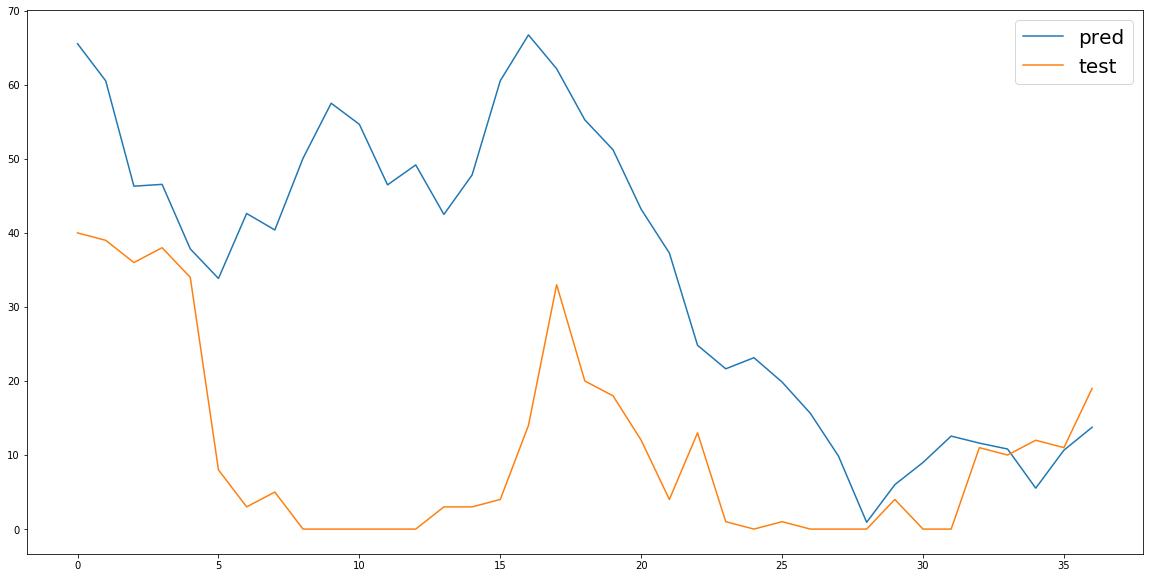

In [127]:
y_pred = model.predict(x_test)
x = range(len(y_pred))
plt.plot(x,y_pred,label = 'pred')
plt.plot(x,y_test, label = 'test')
plt.legend(fontsize=20)

In [128]:
mean_squared_error(y_pred,y_test)

949.3764036956628

In [121]:
y_pred = model.predict(x_test)

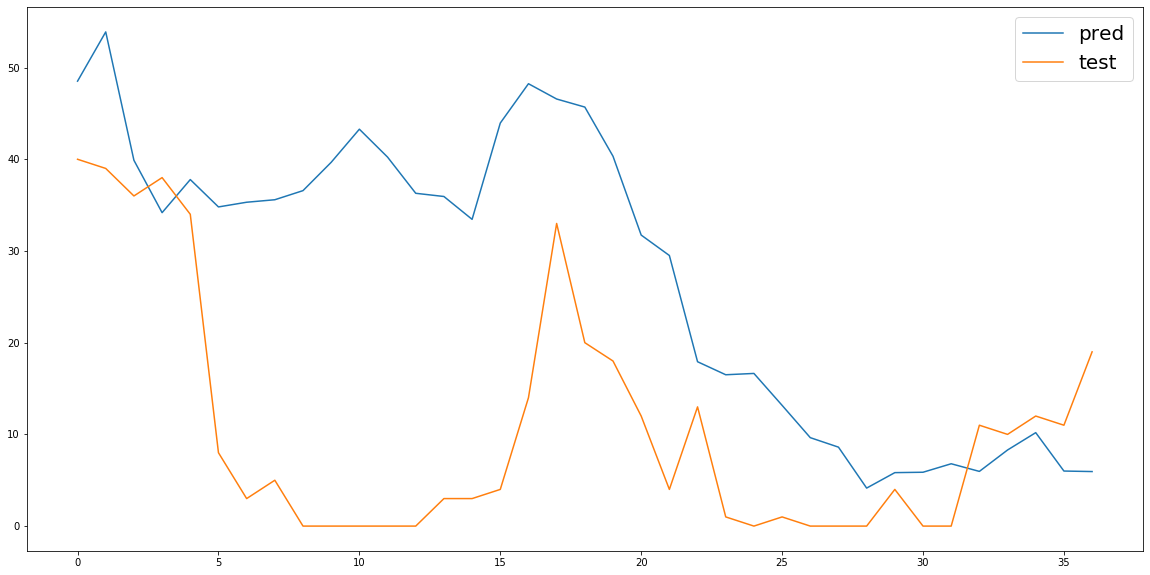

In [125]:
x = range(len(y_pred))
plt.plot(x,y_pred,label = 'pred')
plt.plot(x,y_test, label = 'test')
plt.legend(fontsize=20)

In [42]:
%tensorboard --logdir logs/scalars

Reusing TensorBoard on port 6006 (pid 9892), started 0:05:01 ago. (Use '!kill 9892' to kill it.)